In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

# Analysis
import time
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
import os 

import metpy.calc as mpc
from metpy.units import units
from metpy.plots import Hodograph, SkewT

import warnings
warnings.filterwarnings('ignore')



## Read in data

In [2]:
## Load data rather than re-create (it takes a long time to read it all in) 
saveDir = '/glade/work/mdfowler/CLASP/histData/processedData/ens_byLeadDay/'

hmg_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day2_30min_pert00.p" , "rb") )
hmg_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day3_30min_pert00.p" , "rb") )
hmg_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day4_30min_pert00.p" , "rb") )
hmg_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day5_30min_pert00.p" , "rb") )
hmg_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day6_30min_pert00.p" , "rb") )

htg_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day2_30min_pert00.p" , "rb") )
htg_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day3_30min_pert00.p" , "rb") )
htg_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day4_30min_pert00.p" , "rb") )
htg_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day5_30min_pert00.p" , "rb") )
htg_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day6_30min_pert00.p" , "rb") )

hmgCLM_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day2_30min_pert00.p" , "rb") )
hmgCLM_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day3_30min_pert00.p" , "rb") )
hmgCLM_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day4_30min_pert00.p" , "rb") )
hmgCLM_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day5_30min_pert00.p" , "rb") )
hmgCLM_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day6_30min_pert00.p" , "rb") )

htgCLM_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day2_30min_pert00.p" , "rb") )
htgCLM_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day3_30min_pert00.p" , "rb") )
htgCLM_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day4_30min_pert00.p" , "rb") )
htgCLM_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day5_30min_pert00.p" , "rb") )
htgCLM_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day6_30min_pert00.p" , "rb") )

print('Read in ens00, no multiplier data')


Read in ens00, no multiplier data


In [3]:
## For the HTG*10 case, files are split up by year and need to be merged 

yearStr = ['2015','2016','2017','2018']

for iYr in range(len(yearStr)): 
    
    htg_day2_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    htgCLM_day2_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    
    htg_day3_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    htgCLM_day3_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    
    htg_day4_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day4_30min_pert00.p" , "rb") )
    htgCLM_day4_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day4_30min_pert00.p" , "rb") )
    
    htg_day5_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day5_30min_pert00.p" , "rb") )
    htgCLM_day5_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day5_30min_pert00.p" , "rb") )
    
    htg_day6_upsample10_temp     = pickle.load( open( saveDir+"realSfc_HTGmult10_"   +yearStr[iYr]+"day6_30min_pert00.p" , "rb") )
    htgCLM_day6_upsample10_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult10_"+yearStr[iYr]+"day6_30min_pert00.p" , "rb") )
        
    if iYr==0:
        
        ## 2015 CLM: had saved all variables, not just some
        keepVars_CLM = ['SOILWATER_10CM','TSOI_10CM','RAIN','FSA','TG','TSA','USTAR','WSTAR','ZETA']

        htgCLM_day2_upsample10_temp = htgCLM_day2_upsample10_temp[keepVars_CLM]
        htgCLM_day3_upsample10_temp = htgCLM_day3_upsample10_temp[keepVars_CLM]
        htgCLM_day4_upsample10_temp = htgCLM_day4_upsample10_temp[keepVars_CLM]
        htgCLM_day5_upsample10_temp = htgCLM_day5_upsample10_temp[keepVars_CLM]
        htgCLM_day6_upsample10_temp = htgCLM_day6_upsample10_temp[keepVars_CLM]

        
        htg_day2_upsample10    = htg_day2_upsample10_temp
        htgCLM_day2_upsample10 = htgCLM_day2_upsample10_temp
        
        htg_day3_upsample10    = htg_day3_upsample10_temp
        htgCLM_day3_upsample10 = htgCLM_day3_upsample10_temp
        
        htg_day4_upsample10    = htg_day4_upsample10_temp
        htgCLM_day4_upsample10 = htgCLM_day4_upsample10_temp
        
        htg_day5_upsample10    = htg_day5_upsample10_temp
        htgCLM_day5_upsample10 = htgCLM_day5_upsample10_temp
        
        htg_day6_upsample10    = htg_day6_upsample10_temp
        htgCLM_day6_upsample10 = htgCLM_day6_upsample10_temp

        
    else: 
        htg_day2_upsample10 = xr.concat([htg_day2_upsample10,    htg_day2_upsample10_temp],  dim='time')
        htg_day3_upsample10 = xr.concat([htg_day3_upsample10,    htg_day3_upsample10_temp],  dim='time')
        htg_day4_upsample10 = xr.concat([htg_day4_upsample10,    htg_day4_upsample10_temp],  dim='time')
        htg_day5_upsample10 = xr.concat([htg_day5_upsample10,    htg_day5_upsample10_temp],  dim='time')
        htg_day6_upsample10 = xr.concat([htg_day6_upsample10,    htg_day6_upsample10_temp],  dim='time')
        
        htgCLM_day2_upsample10 = xr.concat([htgCLM_day2_upsample10,    htgCLM_day2_upsample10_temp],  dim='time')
        htgCLM_day3_upsample10 = xr.concat([htgCLM_day3_upsample10,    htgCLM_day3_upsample10_temp],  dim='time')
        htgCLM_day4_upsample10 = xr.concat([htgCLM_day4_upsample10,    htgCLM_day4_upsample10_temp],  dim='time')
        htgCLM_day5_upsample10 = xr.concat([htgCLM_day5_upsample10,    htgCLM_day5_upsample10_temp],  dim='time')
        htgCLM_day6_upsample10 = xr.concat([htgCLM_day6_upsample10,    htgCLM_day6_upsample10_temp],  dim='time')
    
    print('Done with year ', yearStr[iYr])


print('Read in ens00, HTG*10')

Done with year  2015
Done with year  2016
Done with year  2017
Done with year  2018
Read in ens00, HTG*10


In [4]:
## For the HTG*10 case, files are split up by year and need to be merged 

yearStr = ['2015','2016','2017','2018']

for iYr in range(len(yearStr)): 

   
    htg_day2_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    htgCLM_day2_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day2_30min_pert00.p" , "rb") )
    
    htg_day3_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    htgCLM_day3_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day3_30min_pert00.p" , "rb") )
    
    htg_day4_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day4_30min_pert00.p" , "rb") )
    htgCLM_day4_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day4_30min_pert00.p" , "rb") )
    
    htg_day5_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day5_30min_pert00.p" , "rb") )
    htgCLM_day5_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day5_30min_pert00.p" , "rb") )
    
    htg_day6_upsample5_temp     = pickle.load( open( saveDir+"realSfc_HTGmult5_"   +yearStr[iYr]+"day6_30min_pert00.p" , "rb") )
    htgCLM_day6_upsample5_temp  = pickle.load( open( saveDir+"realSfc_HTGclmMult5_"+yearStr[iYr]+"day6_30min_pert00.p" , "rb") )
        
    if iYr==0:
        
#         ## 2015 CLM: had saved all variables, not just some
#         keepVars_CLM = ['SOILWATER_10CM','TSOI_10CM','RAIN','FSA','TG','TSA','USTAR','WSTAR','ZETA']

#         htgCLM_day1_upsample5_temp = htgCLM_day1_upsample10_temp[keepVars_CLM]
#         htgCLM_day2_upsample5_temp = htgCLM_day2_upsample10_temp[keepVars_CLM]
#         htgCLM_day3_upsample5_temp = htgCLM_day3_upsample10_temp[keepVars_CLM]
#         htgCLM_day4_upsample5_temp = htgCLM_day4_upsample10_temp[keepVars_CLM]
#         htgCLM_day5_upsample5_temp = htgCLM_day5_upsample10_temp[keepVars_CLM]
#         htgCLM_day6_upsample5_temp = htgCLM_day6_upsample10_temp[keepVars_CLM]
        
        htg_day2_upsample05    = htg_day2_upsample5_temp
        htgCLM_day2_upsample05 = htgCLM_day2_upsample5_temp
        
        htg_day3_upsample05    = htg_day3_upsample5_temp
        htgCLM_day3_upsample05 = htgCLM_day3_upsample5_temp
        
        htg_day4_upsample05    = htg_day4_upsample5_temp
        htgCLM_day4_upsample05 = htgCLM_day4_upsample5_temp
        
        htg_day5_upsample05    = htg_day5_upsample5_temp
        htgCLM_day5_upsample05 = htgCLM_day5_upsample5_temp
        
        htg_day6_upsample05    = htg_day6_upsample5_temp
        htgCLM_day6_upsample05 = htgCLM_day6_upsample5_temp

        
    else: 
        htg_day2_upsample05 = xr.concat([htg_day2_upsample05,    htg_day2_upsample5_temp],  dim='time')
        htg_day3_upsample05 = xr.concat([htg_day3_upsample05,    htg_day3_upsample5_temp],  dim='time')
        htg_day4_upsample05 = xr.concat([htg_day4_upsample05,    htg_day4_upsample5_temp],  dim='time')
        htg_day5_upsample05 = xr.concat([htg_day5_upsample05,    htg_day5_upsample5_temp],  dim='time')
        htg_day6_upsample05 = xr.concat([htg_day6_upsample05,    htg_day6_upsample5_temp],  dim='time')
        
        htgCLM_day2_upsample05 = xr.concat([htgCLM_day2_upsample05,    htgCLM_day2_upsample5_temp],  dim='time')
        htgCLM_day3_upsample05 = xr.concat([htgCLM_day3_upsample05,    htgCLM_day3_upsample5_temp],  dim='time')
        htgCLM_day4_upsample05 = xr.concat([htgCLM_day4_upsample05,    htgCLM_day4_upsample5_temp],  dim='time')
        htgCLM_day5_upsample05 = xr.concat([htgCLM_day5_upsample05,    htgCLM_day5_upsample5_temp],  dim='time')
        htgCLM_day6_upsample05 = xr.concat([htgCLM_day6_upsample05,    htgCLM_day6_upsample5_temp],  dim='time')
    
    print('Done with year ', yearStr[iYr])


print('Read in ens00, HTG*05')

Done with year  2015
Done with year  2016
Done with year  2017
Done with year  2018
Read in ens00, HTG*05


In [5]:
## Combine things to make it all a bit easier to handle... 

hmg_day2_upsample01 = hmg_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day2_upsample01 = htg_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day2_upsample10 = htg_day2_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day2_upsample05 = htg_day2_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day2_upsample       = xr.concat([hmg_day2_upsample01, htg_day2_upsample01, htg_day2_upsample10, htg_day2_upsample05], "case")
hmgCLM_day2_upsample01 = hmgCLM_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day2_upsample01 = htgCLM_day2_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day2_upsample10 = htgCLM_day2_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day2_upsample05 = htgCLM_day2_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day2_upsampleCLM       = xr.concat([hmgCLM_day2_upsample01, htgCLM_day2_upsample01, htgCLM_day2_upsample10, htgCLM_day2_upsample05], "case")


hmg_day3_upsample01 = hmg_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day3_upsample01 = htg_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day3_upsample10 = htg_day3_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day3_upsample05 = htg_day3_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day3_upsample       = xr.concat([hmg_day3_upsample01, htg_day3_upsample01, htg_day3_upsample10, htg_day3_upsample05], "case")
hmgCLM_day3_upsample01 = hmgCLM_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day3_upsample01 = htgCLM_day3_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day3_upsample10 = htgCLM_day3_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day3_upsample05 = htgCLM_day3_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day3_upsampleCLM       = xr.concat([hmgCLM_day3_upsample01, htgCLM_day3_upsample01, htgCLM_day3_upsample10, htgCLM_day3_upsample05], "case")


hmg_day4_upsample01 = hmg_day4_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day4_upsample01 = htg_day4_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day4_upsample10 = htg_day4_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day4_upsample05 = htg_day4_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day4_upsample       = xr.concat([hmg_day4_upsample01, htg_day4_upsample01, htg_day4_upsample10, htg_day4_upsample05], "case")
hmgCLM_day4_upsample01 = hmgCLM_day4_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day4_upsample01 = htgCLM_day4_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day4_upsample10 = htgCLM_day4_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day4_upsample05 = htgCLM_day4_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day4_upsampleCLM       = xr.concat([hmgCLM_day4_upsample01, htgCLM_day4_upsample01, htgCLM_day4_upsample10, htgCLM_day4_upsample05], "case")


hmg_day5_upsample01 = hmg_day5_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day5_upsample01 = htg_day5_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day5_upsample10 = htg_day5_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day5_upsample05 = htg_day5_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day5_upsample       = xr.concat([hmg_day5_upsample01, htg_day5_upsample01, htg_day5_upsample10, htg_day5_upsample05], "case")
hmgCLM_day5_upsample01 = hmgCLM_day5_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day5_upsample01 = htgCLM_day5_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day5_upsample10 = htgCLM_day5_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day5_upsample05 = htgCLM_day5_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day5_upsampleCLM       = xr.concat([hmgCLM_day5_upsample01, htgCLM_day5_upsample01, htgCLM_day5_upsample10, htgCLM_day5_upsample05], "case")


hmg_day6_upsample01 = hmg_day6_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htg_day6_upsample01 = htg_day6_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htg_day6_upsample10 = htg_day6_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htg_day6_upsample05 = htg_day6_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day6_upsample       = xr.concat([hmg_day6_upsample01, htg_day6_upsample01, htg_day6_upsample10, htg_day6_upsample05], "case")
hmgCLM_day6_upsample01 = hmgCLM_day6_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HMG'})
htgCLM_day6_upsample01 = htgCLM_day6_upsample01.dropna(dim='time',how='all').assign_coords({"case": 'HTG*01'})
htgCLM_day6_upsample10 = htgCLM_day6_upsample10.dropna(dim='time',how='all').assign_coords({"case": 'HTG*10'})
htgCLM_day6_upsample05 = htgCLM_day6_upsample05.dropna(dim='time',how='all').assign_coords({"case": 'HTG*05'})
day6_upsampleCLM       = xr.concat([hmgCLM_day6_upsample01, htgCLM_day6_upsample01, htgCLM_day6_upsample10, htgCLM_day6_upsample05], "case")


print('*** All cases combined into single day-based datasets ***')


*** All cases combined into single day-based datasets ***


In [6]:
# Add month_day index to arrays

month_day_day2                     = pd.MultiIndex.from_arrays([day2_upsample['time.year'].values,
                                                                day2_upsample['time.month'].values, 
                                                                day2_upsample['time.day'].values])
day2_upsample.coords['year_month_day']     = ('time', month_day_day2)
day2_upsampleCLM.coords['year_month_day']  = ('time', month_day_day2)


month_day_day3                     = pd.MultiIndex.from_arrays([day3_upsample['time.year'].values,
                                                                day3_upsample['time.month'].values, 
                                                                day3_upsample['time.day'].values])
day3_upsample.coords['year_month_day']     = ('time', month_day_day3)
day3_upsampleCLM.coords['year_month_day']  = ('time', month_day_day3)


month_day_day4                     = pd.MultiIndex.from_arrays([day4_upsample['time.year'].values,
                                                                day4_upsample['time.month'].values, 
                                                                day4_upsample['time.day'].values])
day4_upsample.coords['year_month_day']     = ('time', month_day_day4)
day4_upsampleCLM.coords['year_month_day']  = ('time', month_day_day4)


month_day_day5                     = pd.MultiIndex.from_arrays([day5_upsample['time.year'].values,
                                                                day5_upsample['time.month'].values, 
                                                                day5_upsample['time.day'].values])
day5_upsample.coords['year_month_day']     = ('time', month_day_day5)
day5_upsampleCLM.coords['year_month_day']  = ('time', month_day_day5)


month_day_day6                     = pd.MultiIndex.from_arrays([day6_upsample['time.year'].values,
                                                                day6_upsample['time.month'].values, 
                                                                day6_upsample['time.day'].values])
day6_upsample.coords['year_month_day']     = ('time', month_day_day6)
day6_upsampleCLM.coords['year_month_day']  = ('time', month_day_day6)


## Analysis section

In [7]:
'''
Find all the times in the full array (20m dt) that line up with the day classifications above. 
'''
def getTimes_basedOnDates(fullDS, matchDatesDS):
    iTimes = []
    
    for iTime in range(len(matchDatesDS.year_month_day.values)):
        iKeepTimes = np.where((fullDS['time.year'] ==matchDatesDS.year_month_day_level_0.values[iTime]) &
                              (fullDS['time.month']==matchDatesDS.year_month_day_level_1.values[iTime]) & 
                              (fullDS['time.day']  ==matchDatesDS.year_month_day_level_2.values[iTime]))[0]    
        iTimes = np.append(iTimes, iKeepTimes).astype(int)
    
    # Now select only those times in the local time array
    DS_dayClass = fullDS.isel(time=iTimes)
    
    return(DS_dayClass)

In [8]:
def selSensitiveDays(dayDS, varSel, startHr, endHr,useMax=False): 
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## --- Get mean variable (varSel) over selected hours (inclusive from startHr to endHr): 
    if len(np.shape(dayDS[varSel]))==5:
        if np.shape(dayDS[varSel])[1]==65:
            real_varHMG   = dayDS[varSel].isel(ilev=-1).sel(case='HMG')
            real_varHTG   = dayDS[varSel].isel(ilev=-1).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(ilev=-1).sel(case='HTG*10')
            real_varHTG05 = dayDS[varSel].isel(ilev=-1).sel(case='HTG*05')
        elif np.shape(dayDS[varSel])[1]==64:
            real_varHMG   = dayDS[varSel].isel(lev=-1).sel(case='HMG') 
            real_varHTG   = dayDS[varSel].isel(lev=-1).sel(case='HTG*01')   
            real_varHTG10 = dayDS[varSel].isel(lev=-1).sel(case='HTG*10')  
            real_varHTG05 = dayDS[varSel].isel(lev=-1).sel(case='HTG*05')  
        elif np.shape(dayDS[varSel])[1]==78:
            real_varHMG   = dayDS[varSel].isel(levInterp=-1).sel(case='HMG')   
            real_varHTG   = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*01')
            real_varHTG10 = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*10')
            real_varHTG05 = dayDS[varSel].isel(levInterp=-1).sel(case='HTG*05')
    else:
        real_varHMG   = dayDS[varSel].sel(case='HMG')
        real_varHTG   = dayDS[varSel].sel(case='HTG*01')
        real_varHTG10 = dayDS[varSel].sel(case='HTG*10')
        real_varHTG05 = dayDS[varSel].sel(case='HTG*05')

    # Select those hours or select daily max 
    if useMax==False:
        print('Working on %s, averaged over hours %i - %i' % (varSel, startHr, endHr))
        iHours_real           = np.where( (real_varHMG['time.hour']>=startHr) & (real_varHMG['time.hour']<=endHr) )[0]
        real_varHMG_selTime   = real_varHMG.isel(time=iHours_real)
        real_varHTG_selTime   = real_varHTG.isel(time=iHours_real)
        real_varHTG10_selTime = real_varHTG10.isel(time=iHours_real)
        real_varHTG05_selTime = real_varHTG05.isel(time=iHours_real)


        # For each date, get the mean value over the selected time period 
        real_varHMG_dayMean    = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG_dayMean    = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG10_dayMean  = real_varHTG10_selTime.groupby('year_month_day').mean(dim='time')
        real_varHTG05_dayMean  = real_varHTG05_selTime.groupby('year_month_day').mean(dim='time')
    elif useMax==True:
        print('Working on daily maximum %s' % (varSel))
        real_varHMG_dayMean    = real_varHMG.groupby('year_month_day').max(dim='time')
        real_varHTG_dayMean    = real_varHTG.groupby('year_month_day').max(dim='time')
        real_varHTG10_dayMean  = real_varHTG10.groupby('year_month_day').max(dim='time')
        real_varHTG05_dayMean  = real_varHTG05.groupby('year_month_day').max(dim='time')
        
            
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Get list of dates in string form
    strDates = []
    for iDate in range(len(real_varHMG_dayMean.year_month_day.values)):
        yr_sel  = real_varHMG_dayMean.year_month_day_level_0[iDate]
        mon_sel = real_varHMG_dayMean.year_month_day_level_1[iDate]
        day_sel = real_varHMG_dayMean.year_month_day_level_2[iDate]

        strDates = np.append(strDates, datetime.date(yr_sel,mon_sel,day_sel))
        
    # Get year delineation 
    yrStart =[]
    for iDate in range(len(strDates)-1):
        if strDates[iDate].year==(strDates[iDate+1].year)-1:
            yrStart = np.append(yrStart, iDate+1)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Now get the dates falling within certain percentages 
    diff_realHTG   = np.squeeze(real_varHTG_dayMean.values)   - np.squeeze(real_varHMG_dayMean.values)
    diff_realHTG10 = np.squeeze(real_varHTG10_dayMean.values) - np.squeeze(real_varHMG_dayMean.values)
    diff_realHTG05 = np.squeeze(real_varHTG05_dayMean.values) - np.squeeze(real_varHMG_dayMean.values)

    highPct = 90
    lowPct  = 10

    print('Using HTG*01:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG, lowPct))
    print()
    iHigh_realHTG  = np.where(diff_realHTG   >= np.nanpercentile(diff_realHTG, highPct))[0]
    iLow_realHTG   = np.where(diff_realHTG   <= np.nanpercentile(diff_realHTG, lowPct))[0]
    
    print('Using HTG*05:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG05, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG05, lowPct))
    print()
    iHigh_realHTG05  = np.where(diff_realHTG05   >= np.nanpercentile(diff_realHTG05, highPct))[0]
    iLow_realHTG05   = np.where(diff_realHTG05   <= np.nanpercentile(diff_realHTG05, lowPct))[0]
    
    print('Using HTG*10:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG10, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG10, lowPct))
    print()
    iHigh_realHTG10  = np.where(diff_realHTG10   >= np.nanpercentile(diff_realHTG10, highPct))[0]
    iLow_realHTG10   = np.where(diff_realHTG10   <= np.nanpercentile(diff_realHTG10, lowPct))[0]

    
    ## Get indices of dates that are consistent...
    listHigh_real = list(set( iHigh_realHTG )  )
    listLow_real  = list(set( iLow_realHTG ) )
    
    listHigh_real10 = list(set( iHigh_realHTG10 )  )
    listLow_real10  = list(set( iLow_realHTG10 ) )
    
    listHigh_real05 = list(set( iHigh_realHTG05 )  )
    listLow_real05  = list(set( iLow_realHTG05 ) )

    print('Num days consistent for high percentile (real sfc): ', len(listHigh_real))
    print('Num days consistent for low  percentile (real sfc): ', len(listLow_real))

    
    return real_varHMG_dayMean,real_varHTG_dayMean,strDates,yrStart,listHigh_real,listLow_real,listHigh_real10,listLow_real10,listHigh_real05,listLow_real05

In [9]:
## Select vaiable that's of interest 
# varSel  = 'PBLH'
varSel  = 'PBLdepth'
# varSel  = 'PBLdepth_Q'


## This is the option I've been using for the AGU presentation and before that 
startHr = 12
endHr   = 18

print('\n-----------\nDay 2')
selvarHMG_day2,selvarHTG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2,listHigh10_day2,listLow10_day2,listHigh05_day2,listLow05_day2 = selSensitiveDays(day2_upsample,
                                                                                                       varSel, startHr, endHr, False)
print('\n-----------\nDay 3')
selvarHMG_day3,selvarHTG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3,listHigh10_day3,listLow10_day3,listHigh05_day3,listLow05_day3 = selSensitiveDays(day3_upsample,
                                                                                                       varSel, startHr, endHr, False)
print('\n-----------\nDay 4')
selvarHMG_day4,selvarHTG_day4,strDates_day4,yrStart_day4,listHigh_day4,listLow_day4,listHigh10_day4,listLow10_day4,listHigh05_day4,listLow05_day4 = selSensitiveDays(day4_upsample,  
                                                                                                       varSel, startHr, endHr, False)
print('\n-----------\nDay 5')
selvarHMG_day5,selvarHTG_day5,strDates_day5,yrStart_day5,listHigh_day5,listLow_day5,listHigh10_day5,listLow10_day5,listHigh05_day5,listLow05_day5 = selSensitiveDays(day5_upsample, 
                                                                                                       varSel, startHr, endHr, False)
print('\n-----------\nDay 6')
selvarHMG_day6,selvarHTG_day6,strDates_day6,yrStart_day6,listHigh_day6,listLow_day6,listHigh10_day6,listLow10_day6,listHigh05_day6,listLow05_day6 = selSensitiveDays(day6_upsample, 
                                                                                                       varSel, startHr, endHr, False)



-----------
Day 2
Working on PBLdepth, averaged over hours 12 - 18
Using HTG*01:
- - - - - - - - 
90 th percentile difference (HTG): 3.234e+01
10 th percentile difference (HTG):  -3.196e+01

Using HTG*05:
- - - - - - - - 
90 th percentile difference (HTG): 5.673e+01
10 th percentile difference (HTG):  -9.049e+01

Using HTG*10:
- - - - - - - - 
90 th percentile difference (HTG): 5.188e+01
10 th percentile difference (HTG):  -1.862e+02

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 3
Working on PBLdepth, averaged over hours 12 - 18
Using HTG*01:
- - - - - - - - 
90 th percentile difference (HTG): 5.112e+01
10 th percentile difference (HTG):  -9.609e+01

Using HTG*05:
- - - - - - - - 
90 th percentile difference (HTG): 7.628e+01
10 th percentile difference (HTG):  -2.046e+02

Using HTG*10:
- - - - - - - - 
90 th percentile difference (HTG): 6.360e+01
10 th percentile difference (HTG):  -2.984e+02

Num days

Text(0, 0.5, 'm')

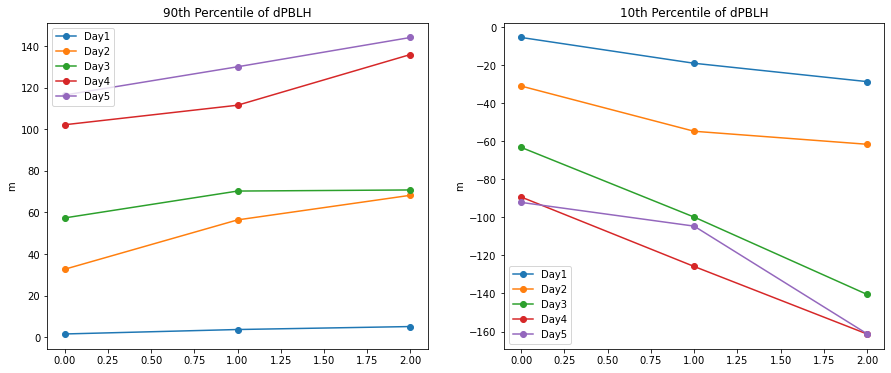

In [17]:
# ## Sensitive day levels defined based on PBLH (model defined)

# fig,axs = plt.subplots(1,2, figsize=(15,6))
# axs = axs.ravel()

# axs[0].plot(np.arange(3), [1.537e+00, 
#                            3.678e+00, 
#                            5.109e+00],'-o', label='Day1')

# axs[0].plot(np.arange(3), [3.267e+01, 
#                            5.642e+01, 
#                            6.827e+01],'-o', label='Day2')

# axs[0].plot(np.arange(3), [5.737e+01, 
#                            7.030e+01, 
#                            7.083e+01],'-o', label='Day3')

# axs[0].plot(np.arange(3), [1.022e+02, 
#                            1.116e+02, 
#                            1.360e+02],'-o', label='Day4')

# axs[0].plot(np.arange(3), [1.165e+02, 
#                            1.301e+02, 
#                            1.442e+02],'-o', label='Day5')

# # axs[0].plot(np.arange(3), [1.263e+02, 
# #                         1.448e+02, 
# #                         1.555e+02],'-o', label='Day6')


# axs[0].set_title('90th Percentile of d'+varSel)
# axs[0].legend()
# axs[0].set_ylabel('m')


# ## 10th percentile
# axs[1].plot(np.arange(3), [-5.423e+00, 
#                            -1.899e+01, 
#                            -2.863e+01],'-o', label='Day1')

# axs[1].plot(np.arange(3), [-3.097e+01, 
#                            -5.473e+01, 
#                            -6.157e+01],'-o', label='Day2')

# axs[1].plot(np.arange(3), [-6.321e+01, 
#                            -9.984e+01, 
#                            -1.405e+02],'-o', label='Day3')

# axs[1].plot(np.arange(3), [-8.930e+01, 
#                            -1.258e+02, 
#                            -1.613e+02],'-o', label='Day4')

# axs[1].plot(np.arange(3), [-9.213e+01, 
#                            -1.046e+02, 
#                            -1.612e+02],'-o', label='Day5')

# # axs[1].plot(np.arange(3), [-1.589e+02, 
# #                         -2.962e+02, 
# #                         -5.422e+02],'-o', label='Day6')


# axs[1].set_title('10th Percentile of d'+varSel)
# axs[1].legend()
# axs[1].set_ylabel('m')


Text(0, 0.5, 'm')

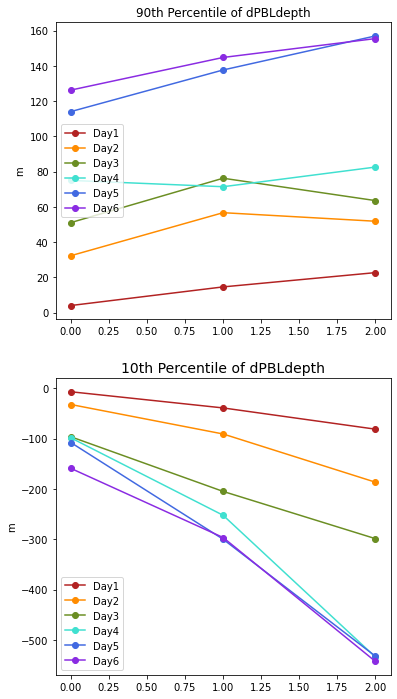

In [24]:
# ## Sensitive day levels defined based on PBLdepth (max gradient of theta) 

# fig,axs = plt.subplots(2,1, figsize=(6,12))
# axs = axs.ravel()

# colorsList = ['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']


# axs[0].plot(np.arange(3), [4.061e+00, 
#                         1.462e+01, 
#                         2.271e+01],'-o', color=colorsList[0], label='Day1')

# axs[0].plot(np.arange(3), [3.234e+01, 
#                         5.673e+01, 
#                         5.188e+01],'-o',  color=colorsList[1], label='Day2')

# axs[0].plot(np.arange(3), [5.112e+01, 
#                         7.628e+01, 
#                         6.360e+01],'-o',  color=colorsList[2], label='Day3')

# axs[0].plot(np.arange(3), [7.504e+01, 
#                         7.146e+01, 
#                         8.260e+01],'-o',  color=colorsList[3], label='Day4')

# axs[0].plot(np.arange(3), [1.141e+02, 
#                         1.377e+02, 
#                         1.570e+02],'-o',  color=colorsList[4], label='Day5')

# axs[0].plot(np.arange(3), [1.263e+02, 
#                         1.448e+02, 
#                         1.555e+02],'-o',  color=colorsList[5], label='Day6')


# axs[0].set_title('90th Percentile of dPBLdepth')
# axs[0].legend()
# axs[0].set_ylabel('m')


# ## 10th percentile
# axs[1].plot(np.arange(3), [-6.626e+00, 
#                         -3.873e+01, 
#                         -8.090e+01],'-o',  color=colorsList[0], label='Day1')

# axs[1].plot(np.arange(3), [-3.196e+01, 
#                         -9.049e+01, 
#                         -1.862e+02],'-o',  color=colorsList[1], label='Day2')

# axs[1].plot(np.arange(3), [-9.609e+01, 
#                         -2.046e+02, 
#                         -2.984e+02],'-o',  color=colorsList[2], label='Day3')

# axs[1].plot(np.arange(3), [-9.824e+01, 
#                         -2.520e+02, 
#                         -5.334e+02],'-o',  color=colorsList[3], label='Day4')

# axs[1].plot(np.arange(3), [-1.076e+02, 
#                         -2.996e+02, 
#                         -5.318e+02],'-o',  color=colorsList[4], label='Day5')

# axs[1].plot(np.arange(3), [-1.589e+02, 
#                         -2.962e+02, 
#                         -5.422e+02],'-o',  color=colorsList[5], label='Day6')


# axs[1].set_title('10th Percentile of dPBLdepth',fontsize=14)
# axs[1].legend()
# axs[1].set_ylabel('m')


In [9]:
# # print(np.sort(listHigh_day1))
# # print(np.sort(listHigh10_day1))

# print('Number of overlapping (high) sensitive days (day1): ', len(list(set(listHigh_day1) & set(listHigh10_day1) & set(listHigh05_day1))) )
# print('Number of overlapping (low) sensitive days (day1):  ', len(list(set(listLow_day1) & set(listLow10_day1) & set(listLow05_day1))) )
# # list(set(listHigh_day1) & set(listHigh10_day1))
# print('Number of overlapping (high) sensitive days (day2): ', len(list(set(listHigh_day2) & set(listHigh10_day2) & set(listHigh05_day2))) )
# print('Number of overlapping (low) sensitive days (day2):  ', len(list(set(listLow_day2) & set(listLow10_day2) & set(listLow05_day2))) )

# print('Number of overlapping (high) sensitive days (day3): ', len(list(set(listHigh_day3) & set(listHigh10_day3) & set(listHigh05_day3))) )
# print('Number of overlapping (low) sensitive days (day3):  ', len(list(set(listLow_day3) & set(listLow10_day3) & set(listLow05_day3))) )


# ## What if we want to use only days that are consistently in the high/low percentiles? 

# # listHigh_day2 = list(set(listHigh_day2) & set(listHigh10_day2) & set(listHigh05_day2))
# # listLow_day2  = list(set(listLow_day2) & set(listLow10_day2) & set(listLow05_day2))


# # listHigh_day3 = list(set(listHigh_day3) & set(listHigh10_day3) & set(listHigh05_day3))
# # listLow_day3  = list(set(listLow_day3) & set(listLow10_day3) & set(listLow05_day3))



In [10]:
def meanVars_overHours(dayDS, plotVar, startHr_plt, endHr_plt):
    
    # Select the variable of interest 
    real_varHMG         = dayDS[plotVar].sel(case='HMG')
    real_varHTG         = dayDS[plotVar].sel(case='HTG*01')
    real_varHTG10       = dayDS[plotVar].sel(case='HTG*10')
    real_varHTG05       = dayDS[plotVar].sel(case='HTG*05')
    
    # Select hours 
    iHours_real           = np.where( (real_varHMG['time.hour']>=startHr_plt) & (real_varHMG['time.hour']<=endHr_plt) )[0]
    real_varHMG_selTime   = real_varHMG.isel(time=iHours_real)
    real_varHTG_selTime   = real_varHTG.isel(time=iHours_real)
    real_varHTG10_selTime = real_varHTG10.isel(time=iHours_real)
    real_varHTG05_selTime = real_varHTG05.isel(time=iHours_real)
    
    # For each date, get the mean value over each day
    varHMG_dayMean    = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
    varHTG_dayMean    = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
    varHTG10_dayMean  = real_varHTG10_selTime.groupby('year_month_day').mean(dim='time')
    varHTG05_dayMean  = real_varHTG05_selTime.groupby('year_month_day').mean(dim='time')

    diffHTG_dayMean   = varHTG_dayMean - varHMG_dayMean
    diffHTG10_dayMean = varHTG10_dayMean - varHMG_dayMean
    diffHTG05_dayMean = varHTG05_dayMean - varHMG_dayMean

    return varHMG_dayMean, varHTG_dayMean, varHTG10_dayMean, varHTG05_dayMean, diffHTG_dayMean, diffHTG10_dayMean, diffHTG05_dayMean


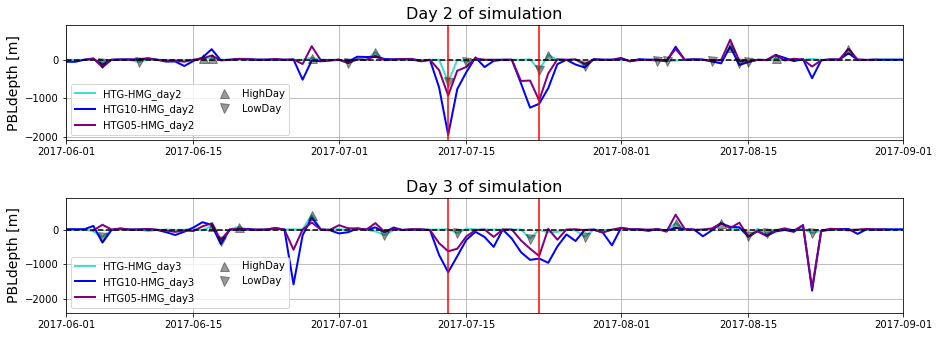

In [11]:
# Plot afternoon means of a selected variable 

# plotVar = 'PBLH'
# unitsStr = 'PBLH [m]
# plotVar = 'PBLdepth_Q'
# unitsStr = 'PBLdepth_Q [m]'
plotVar = 'PBLdepth'
unitsStr = 'PBLdepth [m]'

# plotVar = 'PRECT'
# unitsStr = 'PRECT [m/s]'

# plotVar = 'SHFLX'
# unitsStr = 'SHFLX [W/m2]'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day2,real_varHTG_day2, real_varHTG10_day2, real_varHTG05_day2, diffHTG_day2, diffHTG10_day2, diffHTG05_day2 = meanVars_overHours(day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3, real_varHTG10_day3, real_varHTG05_day3, diffHTG_day3, diffHTG10_day3, diffHTG05_day3 = meanVars_overHours(day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4, real_varHTG10_day4, real_varHTG05_day4, diffHTG_day4, diffHTG10_day4, diffHTG05_day4 = meanVars_overHours(day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5, real_varHTG10_day5, real_varHTG05_day5, diffHTG_day5, diffHTG10_day5, diffHTG05_day5 = meanVars_overHours(day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6, real_varHTG10_day6, real_varHTG05_day6, diffHTG_day6, diffHTG10_day6, diffHTG05_day6 = meanVars_overHours(day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Set up plotting options 
plotHMG  = False
plotHTG  = False
plotDiff = True

startDate = datetime.date(2017,6,1)
endDate   = datetime.date(2017,9,1)

fig,axs = plt.subplots(6,1, figsize=(15,18))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

if plotHMG==True:
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2), color='orangered',  label='HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3), color='orangered',  label='HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4), color='orangered',  label='HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5), color='orangered',  label='HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6), color='orangered',  label='HMG_day6')
    
    
if plotHTG==True:
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2),'-', color='turquoise',   alpha=0.7,label='HTG_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3),'-', color='turquoise',   alpha=0.7,label='HTG_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4),'-', color='turquoise',   alpha=0.7,label='HTG_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5),'-', color='turquoise',   alpha=0.7,label='HTG_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6),'-', color='turquoise',   alpha=0.7,label='HTG_day6')
    
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG10_day2),'--', color='blue', alpha=0.7, label='HTG10_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG10_day3),'--', color='blue', alpha=0.7, label='HTG10_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG10_day4),'--', color='blue', alpha=0.7, label='HTG10_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG10_day5),'--', color='blue', alpha=0.7, label='HTG10_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG10_day6),'--', color='blue', alpha=0.7, label='HTG10_day6')
    
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG05_day2),'--', color='purple', alpha=0.7, label='HTG05_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG05_day3),'--', color='purple', alpha=0.7, label='HTG05_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG05_day4),'--', color='purple', alpha=0.7, label='HTG05_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG05_day5),'--', color='purple', alpha=0.7, label='HTG05_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG05_day6),'--', color='purple', alpha=0.7, label='HTG05_day6')
    
      
if plotDiff==True:   
    axs[1].plot(strDates_day2,np.squeeze(diffHTG_day2), color='turquoise', linewidth=2,label='HTG-HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG_day3), color='turquoise', linewidth=2,label='HTG-HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG_day4), color='turquoise', linewidth=2,label='HTG-HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG_day5), color='turquoise', linewidth=2,label='HTG-HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG_day6), color='turquoise', linewidth=2,label='HTG-HMG_day6')
    
    axs[1].plot(strDates_day2,np.squeeze(diffHTG10_day2), color='blue', linewidth=2,label='HTG10-HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG10_day3), color='blue', linewidth=2,label='HTG10-HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG10_day4), color='blue', linewidth=2,label='HTG10-HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG10_day5), color='blue', linewidth=2,label='HTG10-HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG10_day6), color='blue', linewidth=2,label='HTG10-HMG_day6')
    
    
    axs[1].plot(strDates_day2,np.squeeze(diffHTG05_day2), color='purple', linewidth=2,label='HTG05-HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG05_day3), color='purple', linewidth=2,label='HTG05-HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG05_day4), color='purple', linewidth=2,label='HTG05-HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG05_day5), color='purple', linewidth=2,label='HTG05-HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG05_day6), color='purple', linewidth=2,label='HTG05-HMG_day6')
    
## Add indicators of positive/negative sensitivity day 
# if ( (plotHMG==True) | (plotHTG==True)): 
#     axs[0].plot(strDates_day1[listHigh_day1], np.squeeze(real_varHMG_day1)[listHigh_day1],'k^',markersize=9,alpha=0.4, label='HighDay')
if plotDiff==True: 
    axs[1].plot(strDates_day2[listHigh_day2], np.squeeze(diffHTG_day2)[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[2].plot(strDates_day3[listHigh_day3], np.squeeze(diffHTG_day3)[listHigh_day3],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[3].plot(strDates_day4[listHigh_day4], np.squeeze(diffHTG_day4)[listHigh_day4],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[4].plot(strDates_day5[listHigh_day5], np.squeeze(diffHTG_day5)[listHigh_day5],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[5].plot(strDates_day6[listHigh_day6], np.squeeze(diffHTG_day6)[listHigh_day6],'k^',markersize=9,alpha=0.4, label='HighDay')

    axs[1].plot(strDates_day2[listLow_day2], np.squeeze(diffHTG_day2)[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[2].plot(strDates_day3[listLow_day3], np.squeeze(diffHTG_day3)[listLow_day3],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[3].plot(strDates_day4[listLow_day4], np.squeeze(diffHTG_day4)[listLow_day4],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[4].plot(strDates_day5[listLow_day5], np.squeeze(diffHTG_day5)[listLow_day5],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[5].plot(strDates_day6[listLow_day6], np.squeeze(diffHTG_day6)[listLow_day6],'kv',markersize=9,alpha=0.4, label='LowDay')

## Control how plots display (ticks, labels, etc)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Add legends
axs[1].legend(ncol=2)
axs[2].legend(ncol=2)
axs[3].legend(ncol=2)
axs[4].legend(ncol=2)
axs[5].legend(ncol=2)

## Labels and Titles 
axs[1].set_title('Day 2 of simulation', fontsize=16)
axs[2].set_title('Day 3 of simulation', fontsize=16)
axs[3].set_title('Day 4 of simulation', fontsize=16)
axs[4].set_title('Day 5 of simulation', fontsize=16)
axs[5].set_title('Day 6 of simulation', fontsize=16)

axs[1].set_ylabel(unitsStr, fontsize=14)
axs[2].set_ylabel(unitsStr, fontsize=14)
axs[3].set_ylabel(unitsStr, fontsize=14)
axs[4].set_ylabel(unitsStr, fontsize=14)
axs[5].set_ylabel(unitsStr, fontsize=14)

## Limits on axes and tick labels 
axs[1].set_xlim([startDate, endDate])
axs[2].set_xlim([startDate, endDate])
axs[3].set_xlim([startDate, endDate])
axs[4].set_xlim([startDate, endDate])
axs[5].set_xlim([startDate, endDate])

if plotDiff==True:
    axs[1].axhline(0,color='k',linestyle='--')
    axs[2].axhline(0,color='k',linestyle='--')
    axs[3].axhline(0,color='k',linestyle='--')
    axs[4].axhline(0,color='k',linestyle='--')
    axs[5].axhline(0,color='k',linestyle='--')
    
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    
fig.delaxes(axs[0])
fig.delaxes(axs[3])
fig.delaxes(axs[4])
fig.delaxes(axs[5])

# axs[2].axvline(datetime.date(2015,8,9), color='r')
# axs[2].axvline(datetime.date(2015,8,5), color='r')
# axs[2].axvline(datetime.date(2015,6,30), color='r')
# axs[1].axvline(datetime.date(2015,6,30), color='r')

axs[1].axvline(datetime.date(2017, 7, 13), color='r')
axs[1].axvline(datetime.date(2017, 7, 23), color='r')
axs[2].axvline(datetime.date(2017, 7, 13), color='r')
axs[2].axvline(datetime.date(2017, 7, 23), color='r')

plt.show()


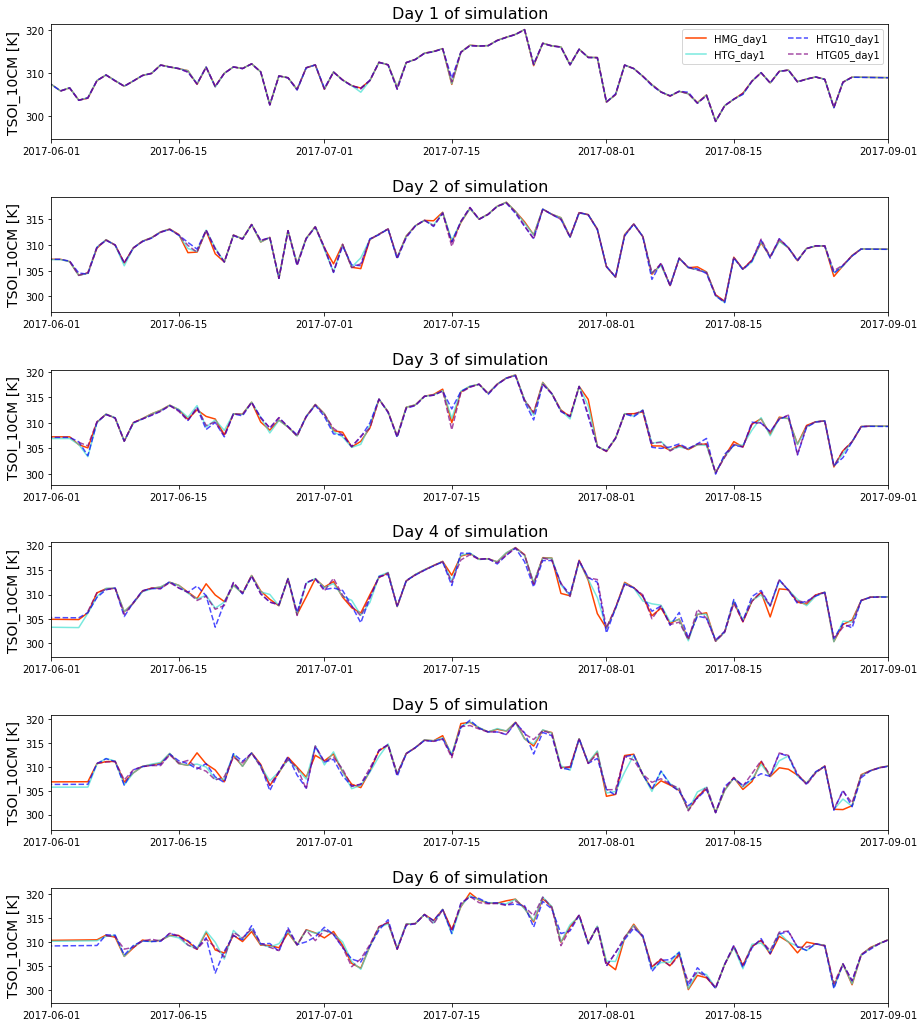

In [29]:
# Plot afternoon means of a selected variable 

# plotVar = 'SOILWATER_10CM'
# unitsStr = 'SOILWATER_10CM [kg/m2]'

plotVar = 'TSOI_10CM'
unitsStr = 'TSOI_10CM [K]'


startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1, real_varHTG10_day1, real_varHTG05_day1, diffHTG_day1, diffHTG10_day1, diffHTG05_day1 = meanVars_overHours(day1_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2, real_varHTG10_day2, real_varHTG05_day2, diffHTG_day2, diffHTG10_day2, diffHTG05_day2 = meanVars_overHours(day2_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3, real_varHTG10_day3, real_varHTG05_day3, diffHTG_day3, diffHTG10_day3, diffHTG05_day3 = meanVars_overHours(day3_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4, real_varHTG10_day4, real_varHTG05_day4, diffHTG_day4, diffHTG10_day4, diffHTG05_day4 = meanVars_overHours(day4_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5, real_varHTG10_day5, real_varHTG05_day5, diffHTG_day5, diffHTG10_day5, diffHTG05_day5 = meanVars_overHours(day5_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6, real_varHTG10_day6, real_varHTG05_day6, diffHTG_day6, diffHTG10_day6, diffHTG05_day6 = meanVars_overHours(day6_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Set up plotting options 
plotHMG  = True
plotHTG  = True
plotDiff = False

startDate = datetime.date(2017,6,1)
endDate   = datetime.date(2017,9,1)

fig,axs = plt.subplots(6,1, figsize=(15,18))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

if plotHMG==True:
    axs[0].plot(strDates_day1,np.squeeze(real_varHMG_day1), color='orangered',  label='HMG_day1')
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2), color='orangered',  label='HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3), color='orangered',  label='HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4), color='orangered',  label='HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5), color='orangered',  label='HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6), color='orangered',  label='HMG_day6')
    
    
if plotHTG==True:
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG_day1),'-', color='turquoise',   alpha=0.7,label='HTG_day1')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2),'-', color='turquoise',   alpha=0.7,label='HTG_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3),'-', color='turquoise',   alpha=0.7,label='HTG_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4),'-', color='turquoise',   alpha=0.7,label='HTG_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5),'-', color='turquoise',   alpha=0.7,label='HTG_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6),'-', color='turquoise',   alpha=0.7,label='HTG_day6')
    
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG10_day1),'--', color='blue', alpha=0.7, label='HTG10_day1')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG10_day2),'--', color='blue', alpha=0.7, label='HTG10_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG10_day3),'--', color='blue', alpha=0.7, label='HTG10_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG10_day4),'--', color='blue', alpha=0.7, label='HTG10_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG10_day5),'--', color='blue', alpha=0.7, label='HTG10_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG10_day6),'--', color='blue', alpha=0.7, label='HTG10_day6')
    
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG05_day1),'--', color='purple', alpha=0.7, label='HTG05_day1')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG05_day2),'--', color='purple', alpha=0.7, label='HTG05_day2')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG05_day3),'--', color='purple', alpha=0.7, label='HTG05_day3')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG05_day4),'--', color='purple', alpha=0.7, label='HTG05_day4')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG05_day5),'--', color='purple', alpha=0.7, label='HTG05_day5')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG05_day6),'--', color='purple', alpha=0.7, label='HTG05_day6')
    
      
if plotDiff==True:   
    axs[0].plot(strDates_day1,np.squeeze(diffHTG_day1), color='turquoise', linewidth=2,label='HTG-HMG_day1')
    axs[1].plot(strDates_day2,np.squeeze(diffHTG_day2), color='turquoise', linewidth=2,label='HTG-HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG_day3), color='turquoise', linewidth=2,label='HTG-HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG_day4), color='turquoise', linewidth=2,label='HTG-HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG_day5), color='turquoise', linewidth=2,label='HTG-HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG_day6), color='turquoise', linewidth=2,label='HTG-HMG_day6')
    
    axs[0].plot(strDates_day1,np.squeeze(diffHTG10_day1), color='blue', linewidth=2,label='HTG10-HMG_day1')
    axs[1].plot(strDates_day2,np.squeeze(diffHTG10_day2), color='blue', linewidth=2,label='HTG10-HMG_day2')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG10_day3), color='blue', linewidth=2,label='HTG10-HMG_day3')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG10_day4), color='blue', linewidth=2,label='HTG10-HMG_day4')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG10_day5), color='blue', linewidth=2,label='HTG10-HMG_day5')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG10_day6), color='blue', linewidth=2,label='HTG10-HMG_day6')
    

## Add indicators of positive/negative sensitivity day 
# if ( (plotHMG==True) | (plotHTG==True)): 
#     axs[0].plot(strDates_day1[listHigh_day1], np.squeeze(real_varHMG_day1)[listHigh_day1],'k^',markersize=9,alpha=0.4, label='HighDay')
if plotDiff==True: 
    axs[0].plot(strDates_day1[listHigh_day1], np.squeeze(diffHTG_day1)[listHigh_day1],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[1].plot(strDates_day2[listHigh_day2], np.squeeze(diffHTG_day2)[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[2].plot(strDates_day3[listHigh_day3], np.squeeze(diffHTG_day3)[listHigh_day3],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[3].plot(strDates_day4[listHigh_day4], np.squeeze(diffHTG_day4)[listHigh_day4],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[4].plot(strDates_day5[listHigh_day5], np.squeeze(diffHTG_day5)[listHigh_day5],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[5].plot(strDates_day6[listHigh_day6], np.squeeze(diffHTG_day6)[listHigh_day6],'k^',markersize=9,alpha=0.4, label='HighDay')

    axs[0].plot(strDates_day1[listLow_day1], np.squeeze(diffHTG_day1)[listLow_day1],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[1].plot(strDates_day2[listLow_day2], np.squeeze(diffHTG_day2)[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[2].plot(strDates_day3[listLow_day3], np.squeeze(diffHTG_day3)[listLow_day3],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[3].plot(strDates_day4[listLow_day4], np.squeeze(diffHTG_day4)[listLow_day4],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[4].plot(strDates_day5[listLow_day5], np.squeeze(diffHTG_day5)[listLow_day5],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[5].plot(strDates_day6[listLow_day6], np.squeeze(diffHTG_day6)[listLow_day6],'kv',markersize=9,alpha=0.4, label='LowDay')

## Control how plots display (ticks, labels, etc)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Add legends
axs[0].legend(ncol=2)
# axs[1].legend(ncol=2)
# axs[2].legend(ncol=2)
# axs[3].legend(ncol=2)
# axs[4].legend(ncol=2)
# axs[5].legend(ncol=2)

## Labels and Titles 
axs[0].set_title('Day 1 of simulation', fontsize=16)
axs[1].set_title('Day 2 of simulation', fontsize=16)
axs[2].set_title('Day 3 of simulation', fontsize=16)
axs[3].set_title('Day 4 of simulation', fontsize=16)
axs[4].set_title('Day 5 of simulation', fontsize=16)
axs[5].set_title('Day 6 of simulation', fontsize=16)

axs[0].set_ylabel(unitsStr, fontsize=14)
axs[1].set_ylabel(unitsStr, fontsize=14)
axs[2].set_ylabel(unitsStr, fontsize=14)
axs[3].set_ylabel(unitsStr, fontsize=14)
axs[4].set_ylabel(unitsStr, fontsize=14)
axs[5].set_ylabel(unitsStr, fontsize=14)

## Limits on axes and tick labels 
axs[0].set_xlim([startDate, endDate])
axs[1].set_xlim([startDate, endDate])
axs[2].set_xlim([startDate, endDate])
axs[3].set_xlim([startDate, endDate])
axs[4].set_xlim([startDate, endDate])
axs[5].set_xlim([startDate, endDate])

if plotDiff==True:
    axs[0].axhline(0,color='k',linestyle='--')
    axs[1].axhline(0,color='k',linestyle='--')
    axs[2].axhline(0,color='k',linestyle='--')
    axs[3].axhline(0,color='k',linestyle='--')
    axs[4].axhline(0,color='k',linestyle='--')
    axs[5].axhline(0,color='k',linestyle='--')
    
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()

        
plt.show()




In [12]:
def plotPDFS_distVar(DS, distVar, startHr, endHr, logScaleBinary):
    # Grab requested variable 
    real_var = DS[distVar]

    # Select those hours
    iHours_real = np.where( (real_var['time.hour']>=startHr) & (real_var['time.hour']<=endHr) )[0]
    real_var_selTime = real_var.isel(time=iHours_real)

    # For each date, get the mean value over the selected time period 
    real_var_dayMean = real_var_selTime.groupby('year_month_day').mean(dim='time')

    # Define dataframe
    dfReal = pd.concat(axis=0, ignore_index=True, objs=[
         pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HMG').values),    'case': 'HMG'}),
         pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HTG*01').values), 'case': 'HTG'}),
         pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HTG*05').values), 'case': 'HTG*05'}),
         pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HTG*10').values), 'case': 'HTG*10'}),
    ])

    # Make plot 
    g = sns.displot(dfReal, x=distVar, hue='case', kind='kde', height=8, cut=0, 
                    palette=['orangered','turquoise','forestgreen','blueviolet'])


    g.ax.set_title("Afternoon Mean "+distVar+" (hr"+str(startHr)+"-hr"+str(endHr)+")", fontsize=16 ) 
    g.ax.set_xlabel(distVar,fontsize=14)
    g.ax.set_ylabel('Density',fontsize=14)
    g.ax.tick_params(axis='both', labelsize= 12)
    plt.setp(g._legend.get_title(), fontsize=12)
    plt.setp(g._legend.get_texts(), fontsize=12)
    
    if logScaleBinary==1:
        g.ax.set_xscale('log')
    
    return plt
    

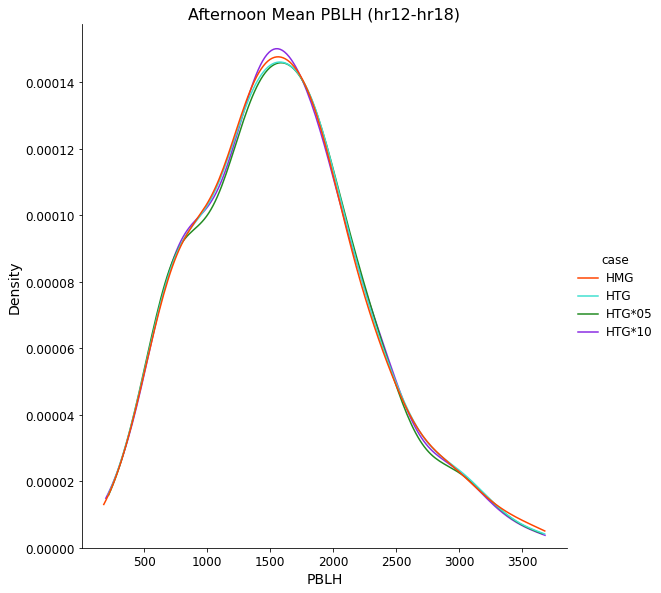

In [13]:
startHr = 12
endHr   = 18

distVar    = 'PBLH'
pltDistVar = plotPDFS_distVar(day2_upsample, distVar, startHr, endHr, 0)


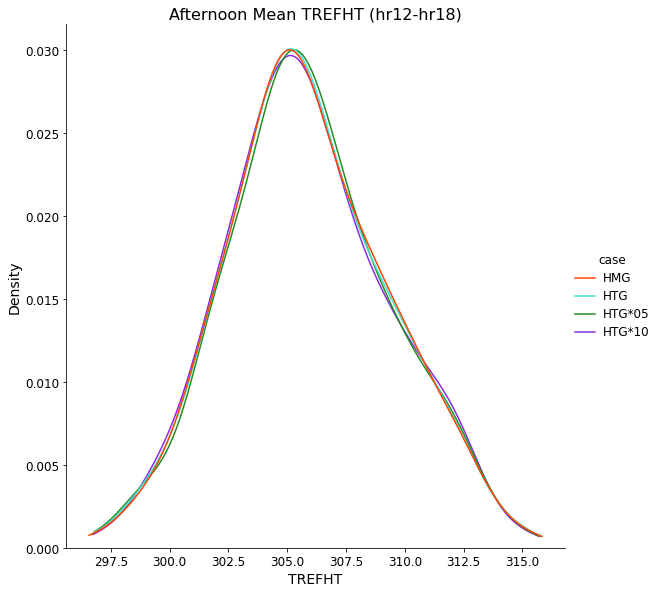

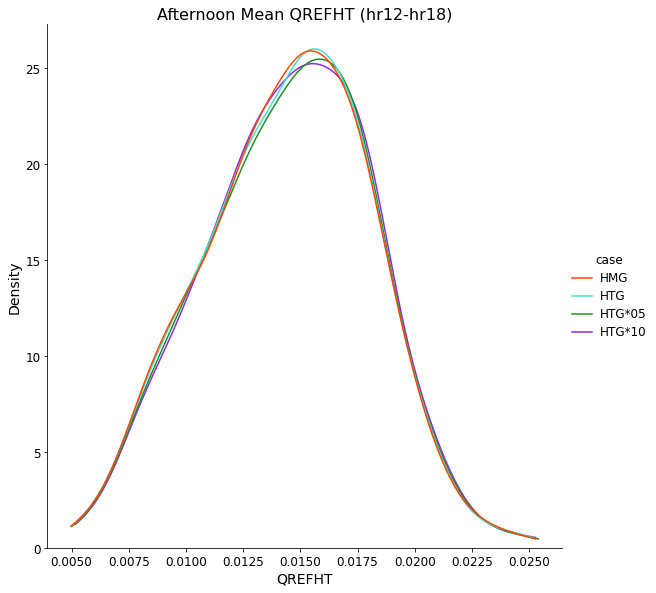

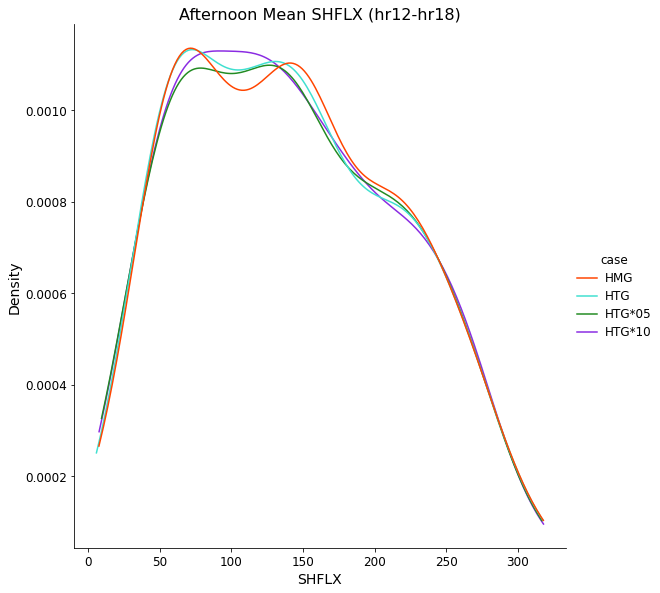

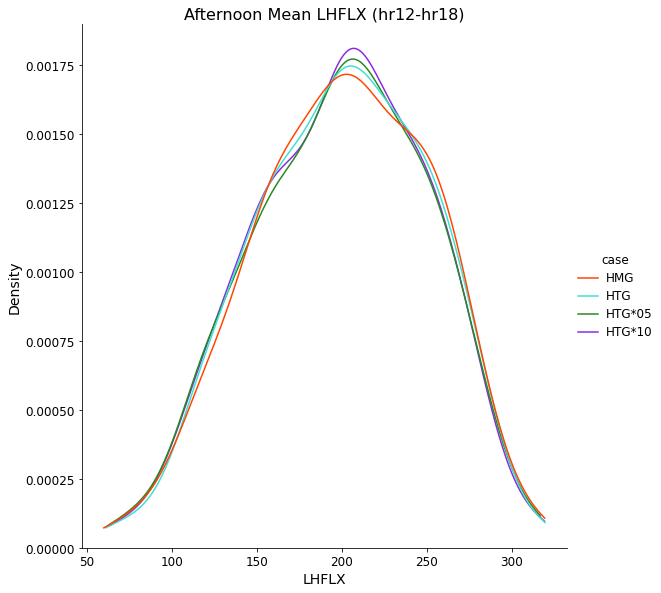

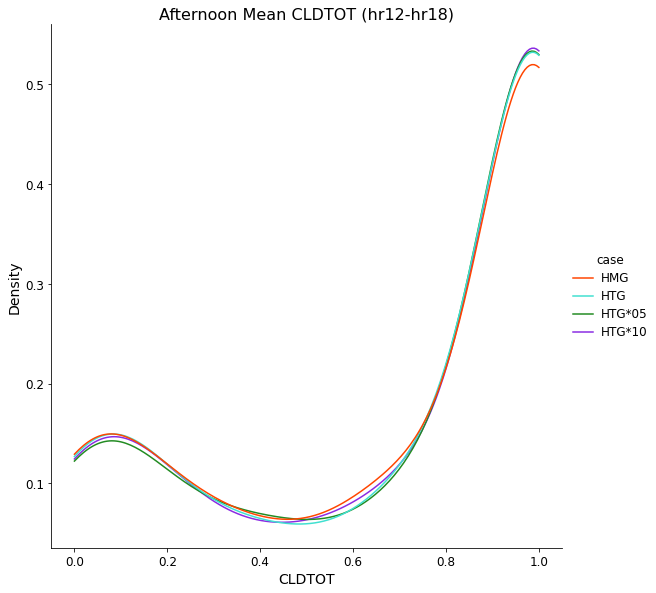

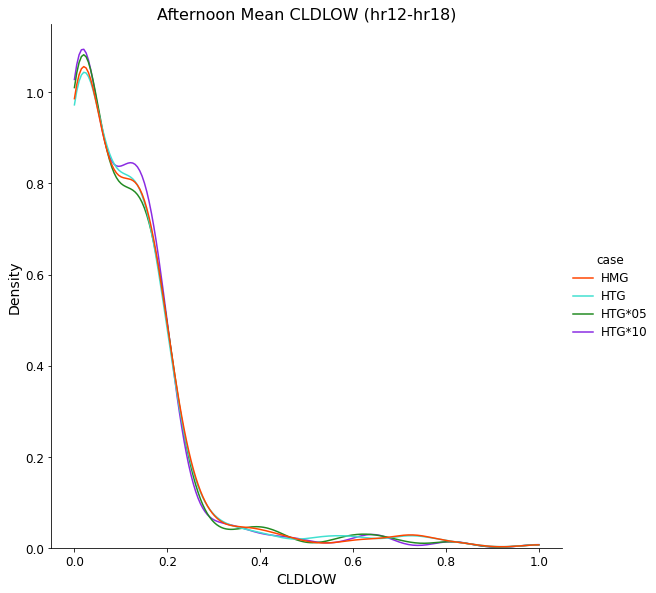

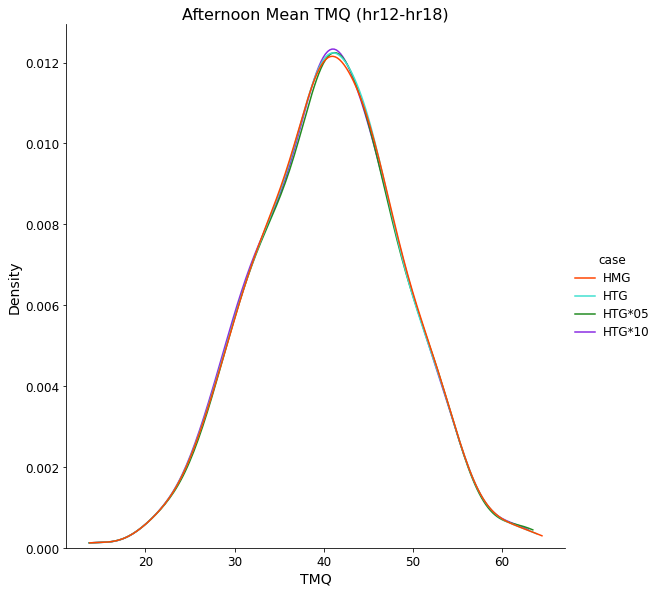

In [26]:
pltDistVar = plotPDFS_distVar(day3_upsample, 'TREFHT', startHr, endHr, 0)
pltDistVar = plotPDFS_distVar(day3_upsample, 'QREFHT', startHr, endHr, 0)

pltDistVar = plotPDFS_distVar(day3_upsample, 'SHFLX', startHr, endHr, 0)
pltDistVar = plotPDFS_distVar(day3_upsample, 'LHFLX', startHr, endHr, 0)

pltDistVar = plotPDFS_distVar(day3_upsample, 'CLDTOT', startHr, endHr, 0)
pltDistVar = plotPDFS_distVar(day3_upsample, 'CLDLOW', startHr, endHr, 0)
pltDistVar = plotPDFS_distVar(day3_upsample, 'TMQ', startHr, endHr, 0)



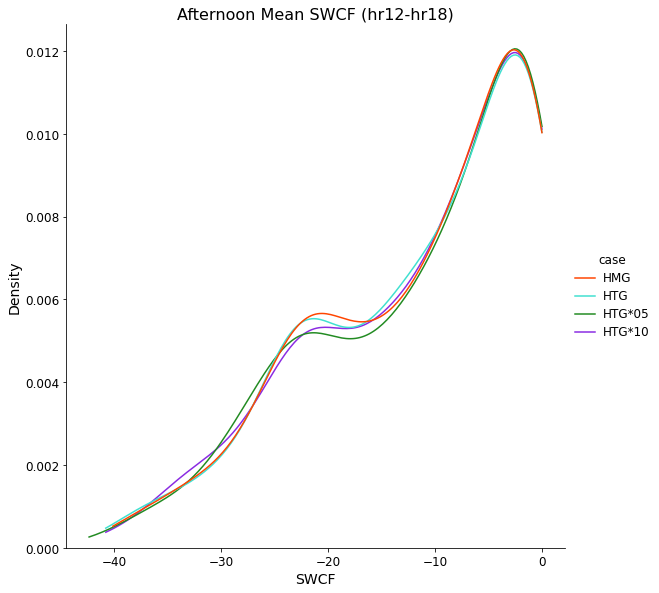

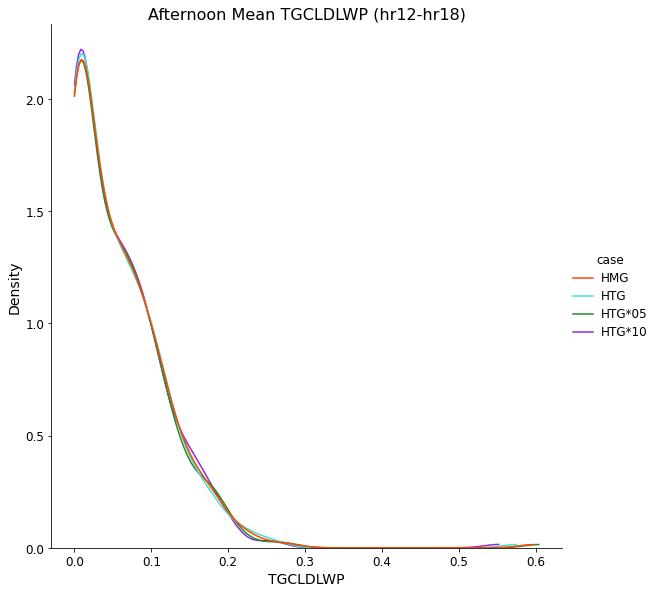

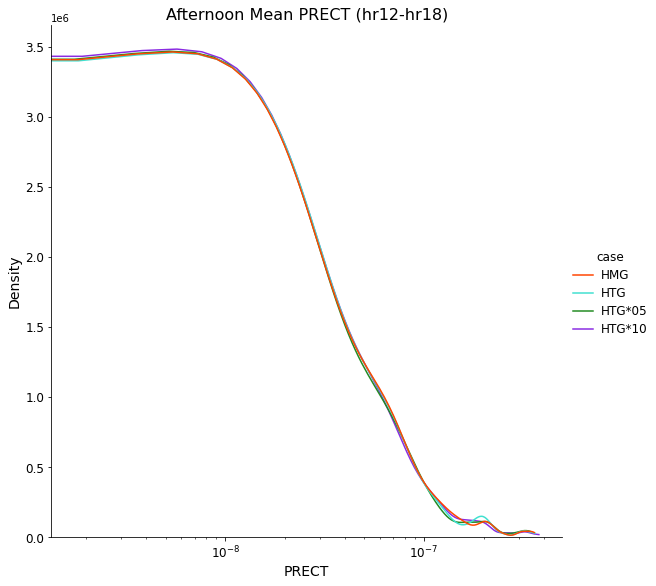

In [17]:
pltDistVar = plotPDFS_distVar(day2_upsample, 'SWCF', startHr, endHr, 0)
pltDistVar = plotPDFS_distVar(day2_upsample, 'TGCLDLWP', startHr, endHr, 0)
pltDistVar = plotPDFS_distVar(day2_upsample, 'PRECT', startHr, endHr, 1)



## Select sensitive days

In [14]:
def getFullDS_sensDays(DS_allDays, 
                       DS_dayMean,
                       strDates, listHigh, listLow): 
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get full arrays that match low/high percentiles

    allIndicies        = np.arange(0,len(strDates))
    restOfIndices_real = list(set(allIndicies) - set(listHigh) - set(listLow))
                              
    # HMG case
    highPct    = getTimes_basedOnDates(DS_allDays,     
                                           DS_dayMean.isel(year_month_day=listHigh))
    lowPct     = getTimes_basedOnDates(DS_allDays,     
                                           DS_dayMean.isel(year_month_day=listLow))
    restOfDays = getTimes_basedOnDates(DS_allDays,     
                                           DS_dayMean.isel(year_month_day=restOfIndices_real))

    
    print('Done isolating high/low/rest DS')
    return highPct,lowPct,restOfDays

In [15]:
## Get full DS for high/low/rest of days -- using HTG-HMG defined sensitive days

highPct_day2,lowPct_day2,restOfDays_day2 = getFullDS_sensDays(day2_upsample, selvarHMG_day2,
                                                              strDates_day2, listHigh_day2, listLow_day2)

highPct_day3,lowPct_day3,restOfDays_day3 = getFullDS_sensDays(day3_upsample, selvarHMG_day3,
                                                              strDates_day3, listHigh_day3, listLow_day3)

highPct_day4,lowPct_day4,restOfDays_day4 = getFullDS_sensDays(day4_upsample, selvarHMG_day4,
                                                              strDates_day4, listHigh_day4, listLow_day4)

highPct_day5,lowPct_day5,restOfDays_day5 = getFullDS_sensDays(day5_upsample, selvarHMG_day5,
                                                              strDates_day5, listHigh_day5, listLow_day5)

highPct_day6,lowPct_day6,restOfDays_day6 = getFullDS_sensDays(day6_upsample, selvarHMG_day6,
                                                              strDates_day6, listHigh_day6, listLow_day6)

# CLM file stoo
highPctCLM_day2,lowPctCLM_day2,restOfDaysCLM_day2 = getFullDS_sensDays(day2_upsampleCLM, selvarHMG_day2,
                                                              strDates_day2, listHigh_day2, listLow_day2)

highPctCLM_day3,lowPctCLM_day3,restOfDaysCLM_day3 = getFullDS_sensDays(day3_upsampleCLM, selvarHMG_day3,
                                                              strDates_day3, listHigh_day3, listLow_day3)

highPctCLM_day4,lowPctCLM_day4,restOfDaysCLM_day4 = getFullDS_sensDays(day4_upsampleCLM, selvarHMG_day4,
                                                              strDates_day4, listHigh_day4, listLow_day4)

highPctCLM_day5,lowPctCLM_day5,restOfDaysCLM_day5 = getFullDS_sensDays(day5_upsampleCLM, selvarHMG_day5,
                                                              strDates_day5, listHigh_day5, listLow_day5)

highPctCLM_day6,lowPctCLM_day6,restOfDaysCLM_day6 = getFullDS_sensDays(day6_upsampleCLM, selvarHMG_day6,
                                                              strDates_day6, listHigh_day6, listLow_day6)




# ## Get full DS for high/low/rest of days -- using HTG*10-HMG defined sensitive days
# highPct_day1,lowPct_day1,restOfDays_day1 = getFullDS_sensDays(day1_upsample, selvarHMG_day1,
#                                                               strDates_day1, listHigh10_day1, listLow10_day1)

# highPct_day2,lowPct_day2,restOfDays_day2 = getFullDS_sensDays(day2_upsample, selvarHMG_day2,
#                                                               strDates_day2, listHigh10_day2, listLow10_day2)

# highPct_day3,lowPct_day3,restOfDays_day3 = getFullDS_sensDays(day3_upsample, selvarHMG_day3,
#                                                               strDates_day3, listHigh10_day3, listLow10_day3)

# highPct_day4,lowPct_day4,restOfDays_day4 = getFullDS_sensDays(day4_upsample, selvarHMG_day4,
#                                                               strDates_day4, listHigh10_day4, listLow10_day4)

# highPct_day5,lowPct_day5,restOfDays_day5 = getFullDS_sensDays(day5_upsample, selvarHMG_day5,
#                                                               strDates_day5, listHigh10_day5, listLow10_day5)

# highPct_day6,lowPct_day6,restOfDays_day6 = getFullDS_sensDays(day6_upsample, selvarHMG_day6,
#                                                               strDates_day6, listHigh10_day6, listLow10_day6)

# # CLM files too
# highPctCLM_day1,lowPctCLM_day1,restOfDaysCLM_day1 = getFullDS_sensDays(day1_upsampleCLM, selvarHMG_day1,
#                                                               strDates_day1, listHigh10_day1, listLow10_day1)

# highPctCLM_day2,lowPctCLM_day2,restOfDaysCLM_day2 = getFullDS_sensDays(day2_upsampleCLM, selvarHMG_day2,
#                                                               strDates_day2, listHigh10_day2, listLow10_day2)

# highPctCLM_day3,lowPctCLM_day3,restOfDaysCLM_day3 = getFullDS_sensDays(day3_upsampleCLM, selvarHMG_day3,
#                                                               strDates_day3, listHigh10_day3, listLow10_day3)

# highPctCLM_day4,lowPctCLM_day4,restOfDaysCLM_day4 = getFullDS_sensDays(day4_upsampleCLM, selvarHMG_day4,
#                                                               strDates_day4, listHigh10_day4, listLow10_day4)

# highPctCLM_day5,lowPctCLM_day5,restOfDaysCLM_day5 = getFullDS_sensDays(day5_upsampleCLM, selvarHMG_day5,
#                                                               strDates_day5, listHigh10_day5, listLow10_day5)

# highPctCLM_day6,lowPctCLM_day6,restOfDaysCLM_day6 = getFullDS_sensDays(day6_upsampleCLM, selvarHMG_day6,
#                                                               strDates_day6, listHigh10_day6, listLow10_day6)


Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS


In [16]:
def getHourlyMeans_sensDays(highPct,lowPct,restOfDays):
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get hourly means/std in each category 

    hourlyMean_highPct    = highPct.groupby("time.hour").mean(dim="time")
    hourlyMean_lowPct     = lowPct.groupby("time.hour").mean(dim="time")
    hourlyMean_restOfDays = restOfDays.groupby("time.hour").mean(dim="time")    
    print('Computed hourly means')
    
    hourlyStd_highPct    = highPct.groupby("time.hour").std(dim="time")
    hourlyStd_lowPct     = lowPct.groupby("time.hour").std(dim="time")
    hourlyStd_restOfDays = restOfDays.groupby("time.hour").std(dim="time")
    print('Computed hourly std') 
    
    # Get number of obs going into those hourly means (for error bars)
    nTimes_highPct_HMG     = np.full([24], np.nan)
    nTimes_lowPct_HMG      = np.full([24], np.nan)
    nTimes_restOfDays_HMG  = np.full([24], np.nan)

    for iHr in range(24): 
        nTimes_highPct_HMG[iHr]    = len(np.where(highPct["time.hour"]==iHr)[0])
        nTimes_lowPct_HMG[iHr]     = len(np.where(lowPct["time.hour"]==iHr)[0])
        nTimes_restOfDays_HMG[iHr] = len(np.where(restOfDays["time.hour"]==iHr)[0])

    hourlyMean_highPct['SampleCount']       = (('hour'), nTimes_highPct_HMG)
    hourlyMean_lowPct['SampleCount']        = (('hour'), nTimes_lowPct_HMG)
    hourlyMean_restOfDays['SampleCount']    = (('hour'), nTimes_restOfDays_HMG)

    return hourlyMean_highPct,hourlyStd_highPct, hourlyMean_lowPct,hourlyStd_lowPct, hourlyMean_restOfDays,hourlyStd_restOfDays


In [17]:
## Get diurnal cycle information -- using HTG-HMG defined sensitive days 
hrMean_high_day2,hrStd_high_day2, hrMean_low_day2,hrStd_low_day2, hrMean_rest_day2,hrStd_rest_day2=getHourlyMeans_sensDays(highPct_day2, lowPct_day2, restOfDays_day2)
hrMean_high_day3,hrStd_high_day3, hrMean_low_day3,hrStd_low_day3, hrMean_rest_day3,hrStd_rest_day3=getHourlyMeans_sensDays(highPct_day3, lowPct_day3, restOfDays_day3)
hrMean_high_day4,hrStd_high_day4, hrMean_low_day4,hrStd_low_day4, hrMean_rest_day4,hrStd_rest_day4=getHourlyMeans_sensDays(highPct_day4, lowPct_day4, restOfDays_day4)
hrMean_high_day5,hrStd_high_day5, hrMean_low_day5,hrStd_low_day5, hrMean_rest_day5,hrStd_rest_day5=getHourlyMeans_sensDays(highPct_day5, lowPct_day5, restOfDays_day5)
hrMean_high_day6,hrStd_high_day6, hrMean_low_day6,hrStd_low_day6, hrMean_rest_day6,hrStd_rest_day6=getHourlyMeans_sensDays(highPct_day6, lowPct_day6, restOfDays_day6)

# CLM too?
hrMean_highCLM_day2,hrStd_highCLM_day2, hrMean_lowCLM_day2,hrStd_lowCLM_day2, hrMean_restCLM_day2,hrStd_restCLM_day2=getHourlyMeans_sensDays(highPctCLM_day2, lowPctCLM_day2, restOfDaysCLM_day2)
hrMean_highCLM_day3,hrStd_highCLM_day3, hrMean_lowCLM_day3,hrStd_lowCLM_day3, hrMean_restCLM_day3,hrStd_restCLM_day3=getHourlyMeans_sensDays(highPctCLM_day3, lowPctCLM_day3, restOfDaysCLM_day3)
hrMean_highCLM_day4,hrStd_highCLM_day4, hrMean_lowCLM_day4,hrStd_lowCLM_day4, hrMean_restCLM_day4,hrStd_restCLM_day4=getHourlyMeans_sensDays(highPctCLM_day4, lowPctCLM_day4, restOfDaysCLM_day4)
hrMean_highCLM_day5,hrStd_highCLM_day5, hrMean_lowCLM_day5,hrStd_lowCLM_day5, hrMean_restCLM_day5,hrStd_restCLM_day5=getHourlyMeans_sensDays(highPctCLM_day5, lowPctCLM_day5, restOfDaysCLM_day5)
hrMean_highCLM_day6,hrStd_highCLM_day6, hrMean_lowCLM_day6,hrStd_lowCLM_day6, hrMean_restCLM_day6,hrStd_restCLM_day6=getHourlyMeans_sensDays(highPctCLM_day6, lowPctCLM_day6, restOfDaysCLM_day6)



Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std
Computed hourly means
Computed hourly std


In [18]:
def plotDiurnalCycles(varSelPlot, levSel, yMax, yMin): 
    fig,axs = plt.subplots(6,3, figsize=(18,24))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.5)
    
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    colorList = ['orangered','turquoise','blueviolet','forestgreen']
    
    # - - - - - - - - - - - - - - - - - - - - - - - - 
    for iCase in range(len(day3_upsample.case.values)): 
        caseName = day3_upsample.case.values[iCase]
        
        ## Plot High pct day
        axs[3].errorbar(np.arange(24),
                       np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),
                       yerr =CIlevel*np.squeeze(hrStd_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[6].errorbar(np.arange(24),
                       np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),
                       yerr =CIlevel*np.squeeze(hrStd_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[9].errorbar(np.arange(24),
        #                np.squeeze(hrMean_high_day4.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_high_day4.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day4['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[12].errorbar(np.arange(24),
        #                np.squeeze(hrMean_high_day5.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_high_day5.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day5['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[15].errorbar(np.arange(24),
        #                np.squeeze(hrMean_high_day6.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_high_day6.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day6['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
        
        ## Plot Low pct days 
        axs[4].errorbar(np.arange(24),
                       np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),
                       yerr =CIlevel*np.squeeze(hrStd_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[7].errorbar(np.arange(24),
                       np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),
                       yerr =CIlevel*np.squeeze(hrStd_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[10].errorbar(np.arange(24),
        #                np.squeeze(hrMean_low_day4.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_low_day4.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day4['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[13].errorbar(np.arange(24),
        #                np.squeeze(hrMean_low_day5.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_low_day5.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day5['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[16].errorbar(np.arange(24),
        #                np.squeeze(hrMean_low_day6.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_low_day6.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day6['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
        
        ## Plot rest of days 
        axs[5].errorbar(np.arange(24),
                       np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),
                       yerr =CIlevel*np.squeeze(hrStd_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[8].errorbar(np.arange(24),
                       np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),
                       yerr =CIlevel*np.squeeze(hrStd_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[11].errorbar(np.arange(24),
        #                np.squeeze(hrMean_rest_day4.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_rest_day4.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day4['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[14].errorbar(np.arange(24),
        #                np.squeeze(hrMean_rest_day5.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_rest_day5.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day5['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[17].errorbar(np.arange(24),
        #                np.squeeze(hrMean_rest_day6.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_rest_day6.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day6['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
                
    axs[3].legend(fontsize=12)    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -    
    ## Set titles/labels/etc
    # Also label day 2
    axs[3].set_title(varSelPlot+': Days with large +d'+varSel+'\nDay2', fontsize=14)
    axs[4].set_title('Days with large -d'+varSel, fontsize=14)
    axs[5].set_title('Rest of days', fontsize=14)
    # axs[3].set_title('Day2', fontsize=14)
    axs[6].set_title('Day3', fontsize=14)
    axs[9].set_title('Day4', fontsize=14)
    axs[12].set_title('Day5', fontsize=14)
    axs[15].set_title('Day6', fontsize=14) 
    
    axs[3].set_xlabel('Local Hour', fontsize=12)
    axs[4].set_xlabel('Local Hour', fontsize=12)
    axs[5].set_xlabel('Local Hour', fontsize=12)
    
    # Set axis ranges if desired
    axs[3].set_ylim([yMin, yMax])
    axs[4].set_ylim([yMin, yMax])
    axs[5].set_ylim([yMin, yMax])
    axs[6].set_ylim([yMin, yMax])
    axs[7].set_ylim([yMin, yMax])
    axs[8].set_ylim([yMin, yMax])
    axs[9].set_ylim([yMin, yMax])
    axs[10].set_ylim([yMin, yMax])
    axs[11].set_ylim([yMin, yMax])
    axs[12].set_ylim([yMin, yMax])
    axs[13].set_ylim([yMin, yMax])
    axs[14].set_ylim([yMin, yMax])
    axs[15].set_ylim([yMin, yMax])
    axs[16].set_ylim([yMin, yMax])
    axs[17].set_ylim([yMin, yMax])
 
    # # Set axis ranges if desired
    # axs[3].set_xlim([6, 22])
    # axs[4].set_xlim([6, 22])
    # axs[5].set_xlim([6, 22])
    # axs[6].set_xlim([6, 22])
    # axs[7].set_xlim([6, 22])
    # axs[8].set_xlim([6, 22])
    # axs[9].set_xlim([6, 22])
    # axs[10].set_xlim([6, 22])
    # axs[11].set_xlim([6, 22])
    # axs[12].set_xlim([6, 22])
    # axs[13].set_xlim([6, 22])
    # axs[14].set_xlim([6, 22])
    # axs[15].set_xlim([6, 22])
    # axs[16].set_xlim([6, 22])
    # axs[17].set_xlim([6, 22])
    
    # Set axis ranges if desired
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    axs[6].grid()
    axs[7].grid()
    axs[8].grid()
    axs[9].grid()
    axs[10].grid()
    axs[11].grid()
    axs[12].grid()
    axs[13].grid()
    axs[14].grid()
    axs[15].grid()
    axs[16].grid()
    axs[17].grid()
    
    fig.delaxes(axs[0])
    fig.delaxes(axs[1])
    fig.delaxes(axs[2])
    
    fig.delaxes(axs[9])
    fig.delaxes(axs[10])
    fig.delaxes(axs[11])
    fig.delaxes(axs[12])
    fig.delaxes(axs[13])
    fig.delaxes(axs[14])
    fig.delaxes(axs[15])
    fig.delaxes(axs[16])
    fig.delaxes(axs[17])
    
    return 

In [19]:
def plotDiurnalCycles_shade(varSelPlot, levSel, yMax, yMin): 
    fig,axs = plt.subplots(6,3, figsize=(18,24))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.5)
    
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    colorList = ['orangered','dodgerblue','blueviolet','limegreen']


    
    # - - - - - - - - - - - - - - - - - - - - - - - - 
    for iCase in range(len(day3_upsample.case.values)): 
        caseName = day3_upsample.case.values[iCase]
        
        ## Plot High pct day
        axs[3].plot(np.arange(24), np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
        axs[3].fill_between(np.arange(24), 
                            np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day2['SampleCount'].values),
                            np.squeeze(hrMean_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_high_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day2['SampleCount'].values),
                            alpha = 0.2, facecolor=colorList[iCase])
        
        axs[6].plot(np.arange(24), np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
        axs[6].fill_between(np.arange(24), 
                            np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day3['SampleCount'].values),
                            np.squeeze(hrMean_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_high_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_high_day3['SampleCount'].values),
                            alpha = 0.2, facecolor=colorList[iCase])
        
        
        ## Plot Low pct days 
        axs[4].plot(np.arange(24), np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
        axs[4].fill_between(np.arange(24), 
                            np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day2['SampleCount'].values),
                            np.squeeze(hrMean_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_low_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day2['SampleCount'].values),
                            alpha = 0.2, facecolor=colorList[iCase])
        
        axs[7].plot(np.arange(24), np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
        axs[7].fill_between(np.arange(24), 
                            np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day3['SampleCount'].values),
                            np.squeeze(hrMean_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_low_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_low_day3['SampleCount'].values),
                            alpha = 0.2, facecolor=colorList[iCase])        
        
        ## Plot rest of days 
        # axs[5].errorbar(np.arange(24),
        #                np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day2['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        # axs[8].errorbar(np.arange(24),
        #                np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),
        #                yerr =CIlevel*np.squeeze(hrStd_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day3['SampleCount'].values),
        #                fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
        axs[5].plot(np.arange(24), np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
        axs[5].fill_between(np.arange(24), 
                            np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day2['SampleCount'].values),
                            np.squeeze(hrMean_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_rest_day2.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day2['SampleCount'].values),
                            alpha = 0.2, facecolor=colorList[iCase])
        
        axs[8].plot(np.arange(24), np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel]),color=colorList[iCase],label=caseName)
        axs[8].fill_between(np.arange(24), 
                            np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])-CIlevel*np.squeeze(hrStd_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day3['SampleCount'].values),
                            np.squeeze(hrMean_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])+CIlevel*np.squeeze(hrStd_rest_day3.isel(case=iCase)[varSelPlot].values[:,levSel])/np.sqrt(hrMean_rest_day3['SampleCount'].values),
                            alpha = 0.2, facecolor=colorList[iCase]) 
        
                
    axs[3].legend(fontsize=12)    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -    
    ## Set titles/labels/etc
    # Also label day 2
    axs[3].set_title(varSelPlot+': Days with large +d'+varSel+'\nDay2', fontsize=14)
    axs[4].set_title('Days with large -d'+varSel, fontsize=14)
    axs[5].set_title('Rest of days', fontsize=14)
    # axs[3].set_title('Day2', fontsize=14)
    axs[6].set_title('Day3', fontsize=14)
    axs[9].set_title('Day4', fontsize=14)
    axs[12].set_title('Day5', fontsize=14)
    axs[15].set_title('Day6', fontsize=14) 
    
    axs[3].set_xlabel('Local Hour', fontsize=12)
    axs[4].set_xlabel('Local Hour', fontsize=12)
    axs[5].set_xlabel('Local Hour', fontsize=12)
    
    # Set axis ranges if desired
    axs[3].set_ylim([yMin, yMax])
    axs[4].set_ylim([yMin, yMax])
    axs[5].set_ylim([yMin, yMax])
    axs[6].set_ylim([yMin, yMax])
    axs[7].set_ylim([yMin, yMax])
    axs[8].set_ylim([yMin, yMax])
    axs[9].set_ylim([yMin, yMax])
    axs[10].set_ylim([yMin, yMax])
    axs[11].set_ylim([yMin, yMax])
    axs[12].set_ylim([yMin, yMax])
    axs[13].set_ylim([yMin, yMax])
    axs[14].set_ylim([yMin, yMax])
    axs[15].set_ylim([yMin, yMax])
    axs[16].set_ylim([yMin, yMax])
    axs[17].set_ylim([yMin, yMax])
 
    # # Set axis ranges if desired
    # axs[3].set_xlim([6, 22])
    # axs[4].set_xlim([6, 22])
    # axs[5].set_xlim([6, 22])
    # axs[6].set_xlim([6, 22])
    # axs[7].set_xlim([6, 22])
    # axs[8].set_xlim([6, 22])
    # axs[9].set_xlim([6, 22])
    # axs[10].set_xlim([6, 22])
    # axs[11].set_xlim([6, 22])
    # axs[12].set_xlim([6, 22])
    # axs[13].set_xlim([6, 22])
    # axs[14].set_xlim([6, 22])
    # axs[15].set_xlim([6, 22])
    # axs[16].set_xlim([6, 22])
    # axs[17].set_xlim([6, 22])
    
    # Set axis ranges if desired
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    axs[6].grid()
    axs[7].grid()
    axs[8].grid()
    axs[9].grid()
    axs[10].grid()
    axs[11].grid()
    axs[12].grid()
    axs[13].grid()
    axs[14].grid()
    axs[15].grid()
    axs[16].grid()
    axs[17].grid()
    
    fig.delaxes(axs[0])
    fig.delaxes(axs[1])
    fig.delaxes(axs[2])
    
    fig.delaxes(axs[9])
    fig.delaxes(axs[10])
    fig.delaxes(axs[11])
    fig.delaxes(axs[12])
    fig.delaxes(axs[13])
    fig.delaxes(axs[14])
    fig.delaxes(axs[15])
    fig.delaxes(axs[16])
    fig.delaxes(axs[17])
    
    return 

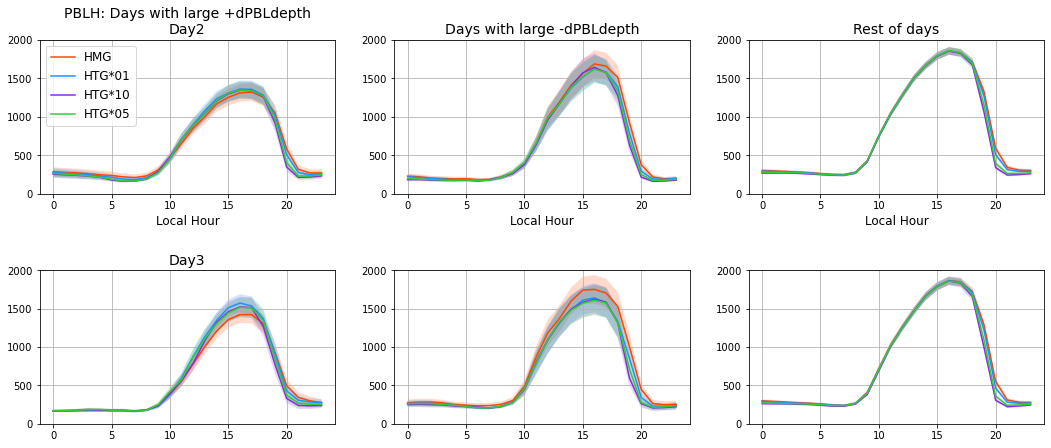

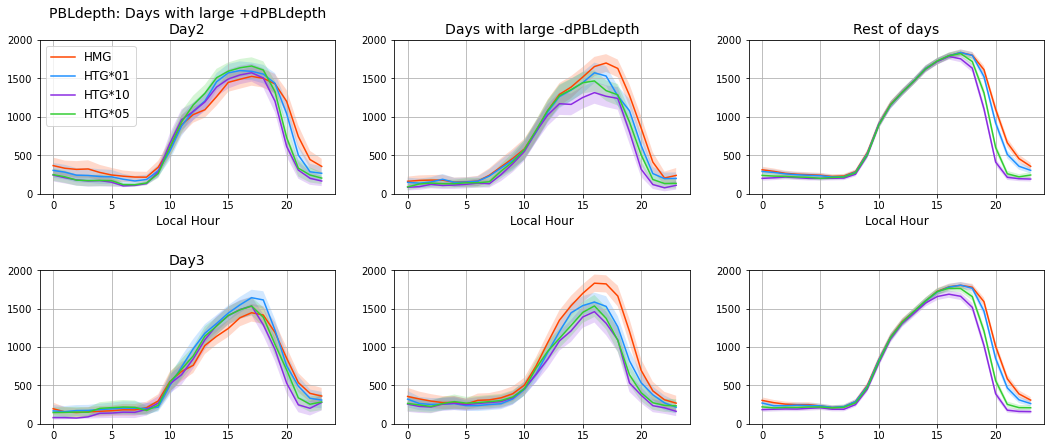

In [20]:
plotDiurnalCycles_shade('PBLH', None, 2000, 0)
# plotDiurnalCycles('PBLdepth_Q', None, 2000, 0)
plotDiurnalCycles_shade('PBLdepth', None, 2000, 0)


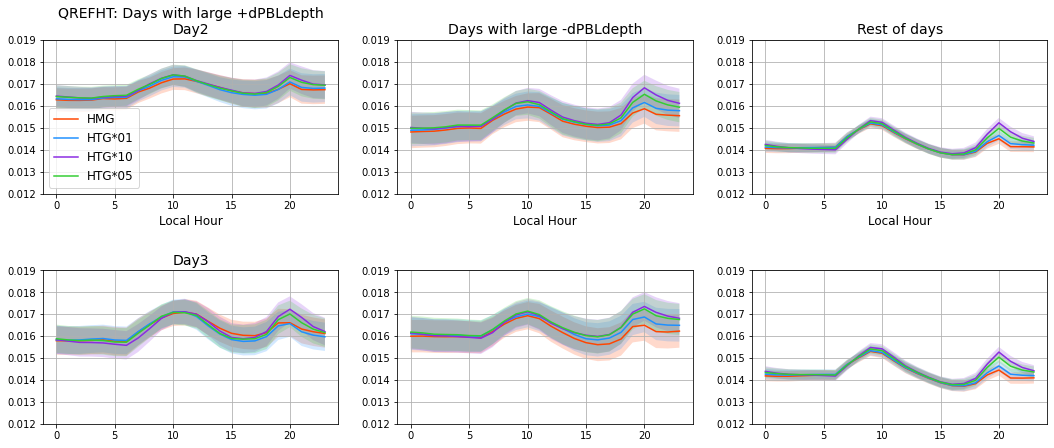

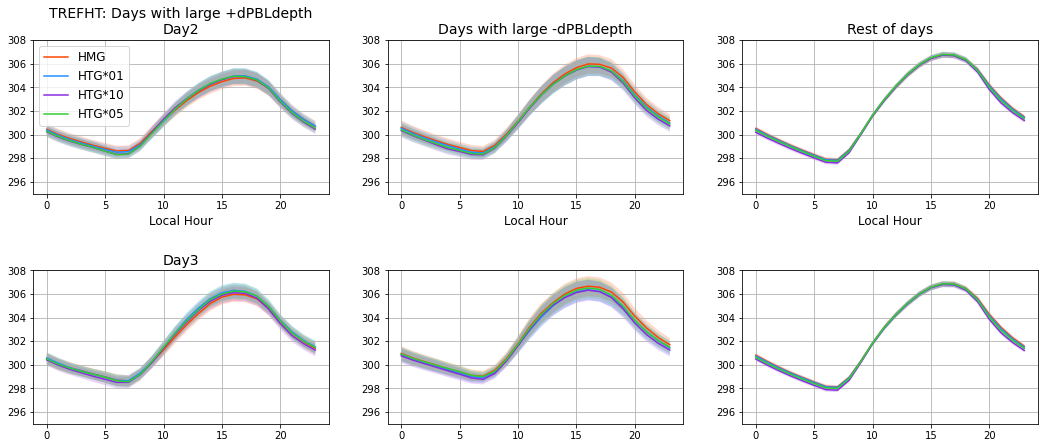

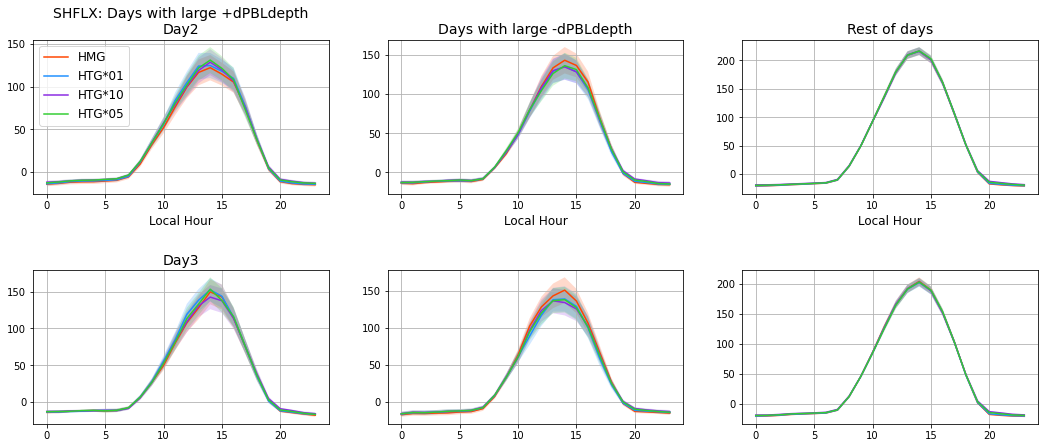

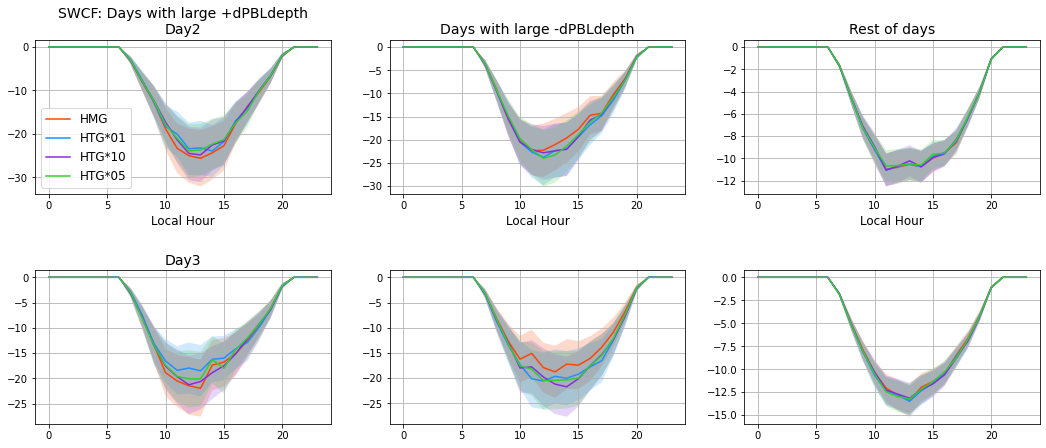

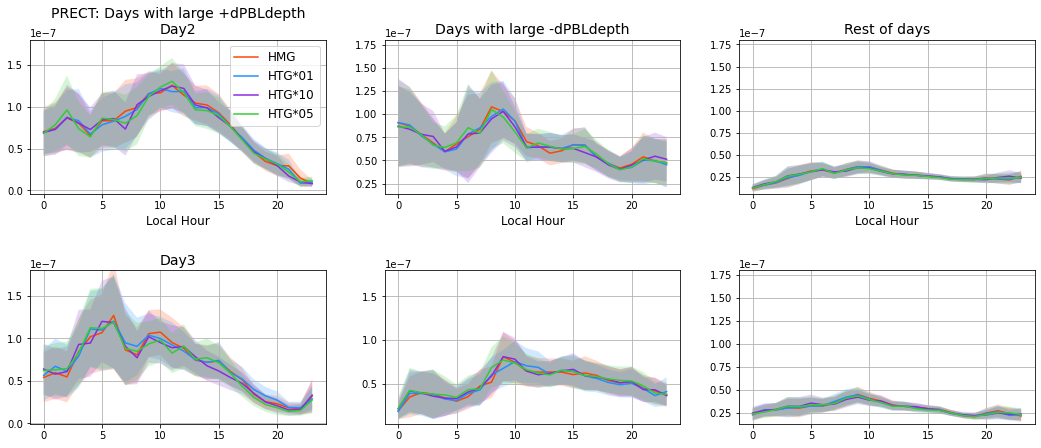

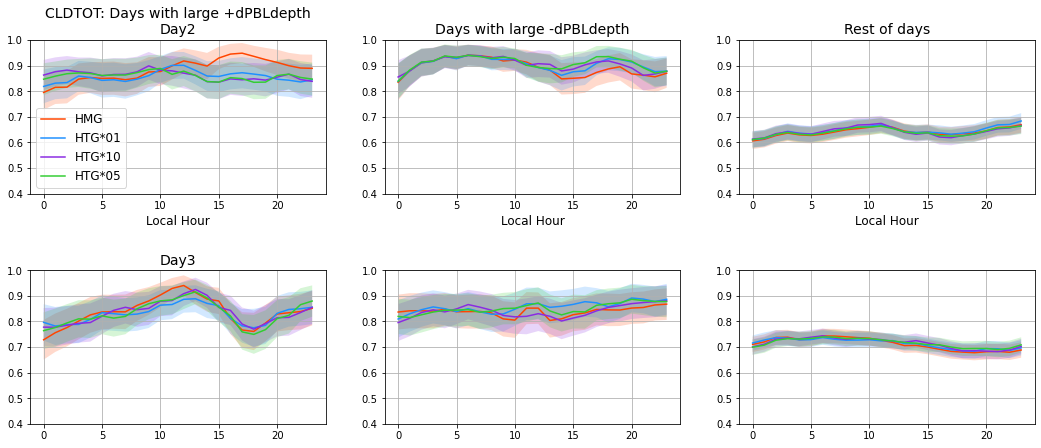

In [95]:
plotDiurnalCycles_shade('QREFHT', None, 0.019, 0.012)
plotDiurnalCycles_shade('TREFHT', None, 308,295)
plotDiurnalCycles_shade('SHFLX', None, None, None)
# plotDiurnalCycles_shade('PS', None, None, None)
plotDiurnalCycles_shade('SWCF', None, None, None)
plotDiurnalCycles_shade('PRECT', None, 1.8e-7, None)
plotDiurnalCycles_shade('CLDTOT', None, 1.0, 0.4)



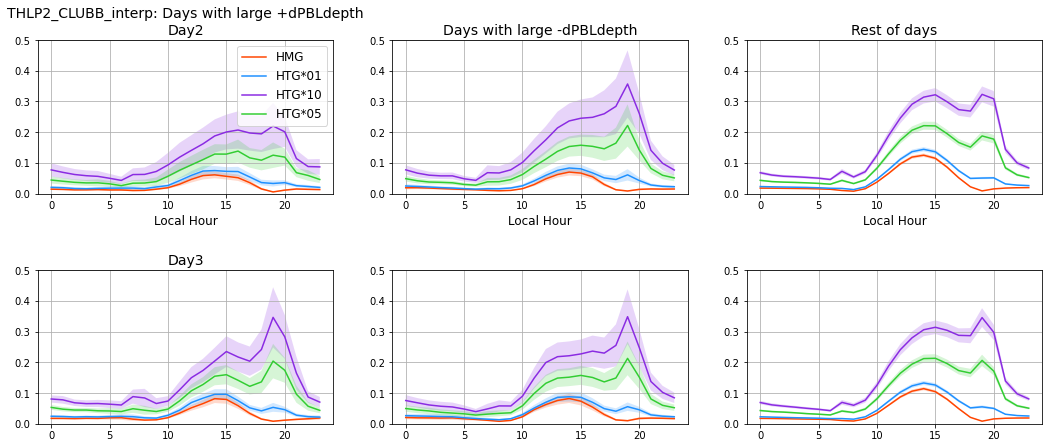

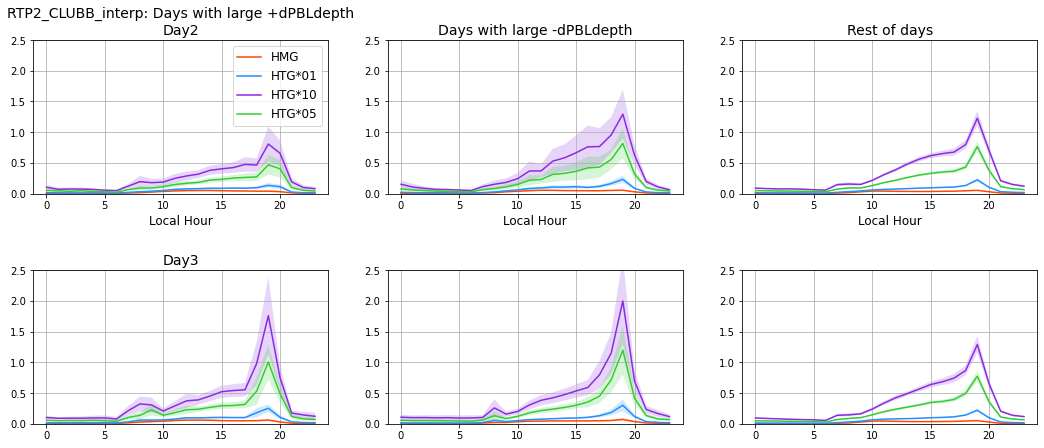

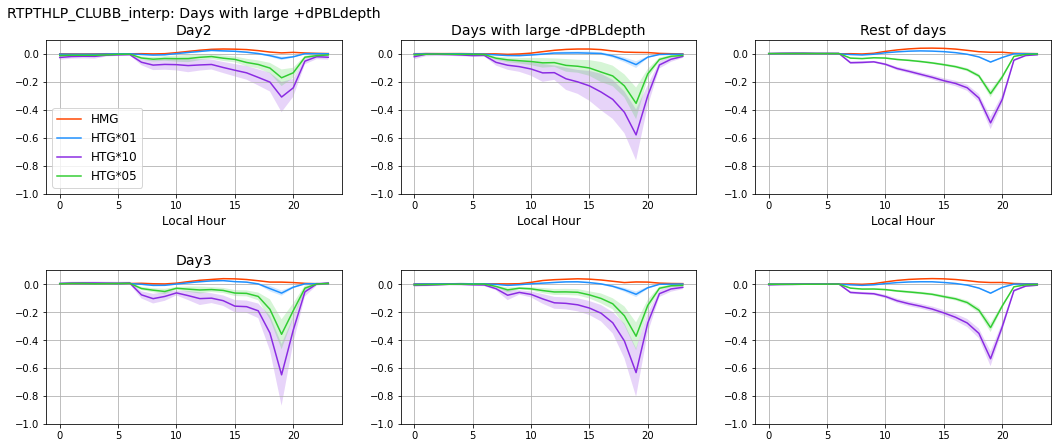

In [21]:
# plotDiurnalCycles_shade('WPTHLP_CLUBB_interp', -1, 260, -20)
plotDiurnalCycles_shade('THLP2_CLUBB_interp',   -1, 0.5, 0)
plotDiurnalCycles_shade('RTP2_CLUBB_interp',    -1, 2.5, 0)
plotDiurnalCycles_shade('RTPTHLP_CLUBB_interp', -1, 0.1, -1)


In [69]:
plotDiurnalCycles?

Signature: plotDiurnalCycles(varSelPlot, levSel, yMax, yMin)
Docstring: <no docstring>
File:      /glade/scratch/mdfowler/ipykernel_255543/3655195787.py
Type:      function


In [23]:
def plotDiurnalCycles_CLM(varSelPlot, yMax, yMin): 
    fig,axs = plt.subplots(6,3, figsize=(18,24))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.5)
    
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    colorList = ['orangered','turquoise','blueviolet','forestgreen']
    
    # - - - - - - - - - - - - - - - - - - - - - - - - 
    for iCase in range(len(day1_upsample.case.values)): 
        caseName = day1_upsample.case.values[iCase]
        
        ## Plot High pct days
        axs[0].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day1.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day1.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day1['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[3].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day2.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day2.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[6].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day3.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day3.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[9].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day4.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day4.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day4['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[12].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day5.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day5.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day5['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[15].errorbar(np.arange(24),
                       np.squeeze(hrMean_highCLM_day6.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_highCLM_day6.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_highCLM_day6['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
        
        ## Plot Low pct days 
        axs[1].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day1.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day1.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day1['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[4].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day2.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day2.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[7].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day3.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day3.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[10].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day4.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day4.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day4['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[13].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day5.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day5.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day5['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[16].errorbar(np.arange(24),
                       np.squeeze(hrMean_lowCLM_day6.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_lowCLM_day6.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_lowCLM_day6['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
        
        ## Plot rest of days 
        axs[2].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day1.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day1.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day1['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[5].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day2.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day2.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day2['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[8].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day3.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day3.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day3['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[11].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day4.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day4.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day4['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[14].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day5.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day5.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day5['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        axs[17].errorbar(np.arange(24),
                       np.squeeze(hrMean_restCLM_day6.isel(case=iCase)[varSelPlot].values),
                       yerr =CIlevel*np.squeeze(hrStd_restCLM_day6.isel(case=iCase)[varSelPlot].values)/np.sqrt(hrMean_restCLM_day6['SampleCount'].values),
                       fmt='-',color=colorList[iCase],capsize=3,label=caseName)
        
                
    axs[0].legend(fontsize=12)    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -    
    ## Set titles/labels/etc
    axs[0].set_title(varSelPlot+': Days with large +d'+varSel+'\nDay1', fontsize=14)
    axs[1].set_title('Days with large -d'+varSel, fontsize=14)
    axs[2].set_title('Rest of days', fontsize=14)
    axs[3].set_title('Day2', fontsize=14)
    axs[6].set_title('Day3', fontsize=14)
    axs[9].set_title('Day4', fontsize=14)
    axs[12].set_title('Day5', fontsize=14)
    axs[15].set_title('Day6', fontsize=14) 
    
    axs[15].set_xlabel('Local Hour', fontsize=12)
    axs[16].set_xlabel('Local Hour', fontsize=12)
    axs[17].set_xlabel('Local Hour', fontsize=12)
    
    # Set axis ranges if desired
    axs[0].set_ylim([yMin, yMax])
    axs[1].set_ylim([yMin, yMax])
    axs[2].set_ylim([yMin, yMax])
    axs[3].set_ylim([yMin, yMax])
    axs[4].set_ylim([yMin, yMax])
    axs[5].set_ylim([yMin, yMax])
    axs[6].set_ylim([yMin, yMax])
    axs[7].set_ylim([yMin, yMax])
    axs[8].set_ylim([yMin, yMax])
    axs[9].set_ylim([yMin, yMax])
    axs[10].set_ylim([yMin, yMax])
    axs[11].set_ylim([yMin, yMax])
    axs[12].set_ylim([yMin, yMax])
    axs[13].set_ylim([yMin, yMax])
    axs[14].set_ylim([yMin, yMax])
    axs[15].set_ylim([yMin, yMax])
    axs[16].set_ylim([yMin, yMax])
    axs[17].set_ylim([yMin, yMax])
 
    # # Set axis ranges if desired
    # axs[0].set_xlim([6, 22])
    # axs[1].set_xlim([6, 22])
    # axs[2].set_xlim([6, 22])
    # axs[3].set_xlim([6, 22])
    # axs[4].set_xlim([6, 22])
    # axs[5].set_xlim([6, 22])
    # axs[6].set_xlim([6, 22])
    # axs[7].set_xlim([6, 22])
    # axs[8].set_xlim([6, 22])
    # axs[9].set_xlim([6, 22])
    # axs[10].set_xlim([6, 22])
    # axs[11].set_xlim([6, 22])
    # axs[12].set_xlim([6, 22])
    # axs[13].set_xlim([6, 22])
    # axs[14].set_xlim([6, 22])
    # axs[15].set_xlim([6, 22])
    # axs[16].set_xlim([6, 22])
    # axs[17].set_xlim([6, 22])
    
    # Set axis ranges if desired
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    axs[6].grid()
    axs[7].grid()
    axs[8].grid()
    axs[9].grid()
    axs[10].grid()
    axs[11].grid()
    axs[12].grid()
    axs[13].grid()
    axs[14].grid()
    axs[15].grid()
    axs[16].grid()
    axs[17].grid()
    
    
    
    return 

In [47]:
# plotDiurnalCycles_CLM('TSOI_10CM', 317, 298)
# plotDiurnalCycles_CLM('SOILWATER_10CM', 28.5, 16.5)

## Figure out vertical profiles

In [21]:
'''
Give this plotting routine the hourly mean DS' of high/low percentile filtering
'''
## Read in one file that has units on it (once you upsample, they disappear)

saveDir    = '/glade/work/mdfowler/CLASP/histData/processedData/'
realSfcHMG = pickle.load( open( saveDir+"realSfc_HMG_relaxTlongTau_freeSfcT.p" , "rb") )

def plotProfiles_meanOverHours(highPctDS, 
                               lowPctDS,
                               restOfDaysDS,
                               varSelPlot,
                               startHr,endHr,
                               xMin, xMax, maxLev):
    
    caseNames = highPctDS['case'].values
    # colorList = ['orangered','turquoise','blueviolet','forestgreen']
    colorList = ['orangered','dodgerblue','blueviolet','limegreen']
    
    ## Select which levels array to use
    if np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.ilev.values):
        levSel = 'ilev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.lev.values):
        levSel = 'lev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.levInterp.values):
        levSel = 'levInterp'
        
                            
    ## First, get means (& std) over the selected hours and ens cases
    iTimeSel_high = np.where((highPctDS["time.hour"].values>=startHr) & 
                             (highPctDS["time.hour"].values<=endHr))[0]
    iTimeSel_low  = np.where((lowPctDS["time.hour"].values>=startHr) & 
                             (lowPctDS["time.hour"].values<=endHr))[0]
    iTimeSel_rest = np.where((restOfDaysDS["time.hour"].values>=startHr) & 
                             (restOfDaysDS["time.hour"].values<=endHr))[0]
    
    
    hourlyMean_highTimeSel   = highPctDS.isel(time=iTimeSel_high).mean(dim=["time"])
    hourlyMean_lowTimeSel    = lowPctDS.isel(time=iTimeSel_low).mean(dim=["time"])
    hourlyMean_restTimeSel   = restOfDaysDS.isel(time=iTimeSel_rest).mean(dim=["time"])
    
    hourlyStd_highTimeSel   = highPctDS.isel(time=iTimeSel_high).std(dim=["time"])
    hourlyStd_lowTimeSel    = lowPctDS.isel(time=iTimeSel_low).std(dim=["time"])
    hourlyStd_restTimeSel   = restOfDaysDS.isel(time=iTimeSel_rest).std(dim=["time"])
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    ## Set up figure
    fig,axs = plt.subplots(1,3, figsize=(15,5))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace=0.2)

    atmLevs = highPctDS[levSel].values

    ## Define confidence level to rely on
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    for iCase in range(len(caseNames)):
        varHigh = np.squeeze(hourlyMean_highTimeSel[varSelPlot].isel(case=iCase).values)
        varLow  = np.squeeze(hourlyMean_lowTimeSel[varSelPlot].isel(case=iCase).values)
        varRest = np.squeeze(hourlyMean_restTimeSel[varSelPlot].isel(case=iCase).values)
        
        varHighStd = np.squeeze(hourlyStd_highTimeSel[varSelPlot].isel(case=iCase).values)
        varLowStd  = np.squeeze(hourlyStd_lowTimeSel[varSelPlot].isel(case=iCase).values)
        varRestStd = np.squeeze(hourlyStd_restTimeSel[varSelPlot].isel(case=iCase).values)
        
        ## Look at just HMG and one other case... 
        if ( (caseNames[iCase]=='HMG') | (caseNames[iCase]=='HTG*01') ):
            axs[0].plot(varHigh, atmLevs,color=colorList[iCase],label=caseNames[iCase])
            axs[0].fill_betweenx(atmLevs, 
                                varHigh-CIlevel*(varHighStd/np.sqrt(len(iTimeSel_high))),
                                varHigh+CIlevel*(varHighStd/np.sqrt(len(iTimeSel_high))),
                                alpha = 0.2, facecolor=colorList[iCase])

            axs[1].plot(varLow, atmLevs,color=colorList[iCase],label=caseNames[iCase])
            axs[1].fill_betweenx(atmLevs, 
                                varLow-CIlevel*(varLowStd/np.sqrt(len(iTimeSel_low))),
                                varLow+CIlevel*(varLowStd/np.sqrt(len(iTimeSel_low))),
                                alpha = 0.2, facecolor=colorList[iCase])

            axs[2].plot(varRest, atmLevs,color=colorList[iCase],label=caseNames[iCase])
            axs[2].fill_betweenx(atmLevs, 
                                varRest-CIlevel*(varRestStd/np.sqrt(len(iTimeSel_rest))),
                                varRest+CIlevel*(varRestStd/np.sqrt(len(iTimeSel_rest))),
                                alpha = 0.2, facecolor=colorList[iCase])

    axs[0].legend(fontsize=12)    

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()

    axs[0].set_ylim([980, maxLev])
    axs[1].set_ylim([980, maxLev])
    axs[2].set_ylim([980, maxLev])
    
    axs[0].set_xlim([xMin, xMax])
    axs[1].set_xlim([xMin, xMax])
    axs[2].set_xlim([xMin, xMax])
    
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])   

    axs[0].set_title(varSelPlot+'\n Large increases in '+varSel, fontsize=16)       
    axs[1].set_title('Large decreases in '+varSel, fontsize=16)
    axs[2].set_title('Remaining days', fontsize=16)

    axs[0].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    axs[1].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    axs[2].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    
    if varSelPlot.endswith('_interp'):
        axs[0].set_ylabel('hPa', fontsize=12)
    else:
        axs[0].set_ylabel('hPa (model hybrid coord)', fontsize=12)

    axs[0].tick_params(axis='both', labelsize= 12)
    axs[1].tick_params(axis='both', labelsize= 12)
    axs[2].tick_params(axis='both', labelsize= 12)

    return

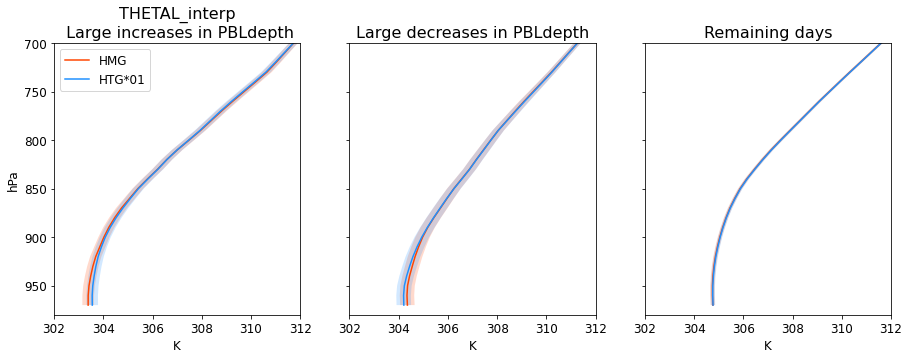

In [88]:
## Which variable do we want to plot?

# varSelPlot = 'THLP2_CLUBB_interp'
# xminPlot   = 0 
# xmaxPlot   = 0.07
# # xmaxPlot   = 0.08

# varSelPlot = 'RTP2_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 0.15

# varSelPlot = 'RTPTHLP_CLUBB_interp'
# xminPlot   = -0.04
# xmaxPlot   = 0.04

# varSelPlot = 'WP2_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 1.1

# varSelPlot = 'WPRTP_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 210

# varSelPlot = 'WPTHLP_CLUBB_interp'
# xminPlot   = -10
# xmaxPlot   = 90

# varSelPlot = 'WP3_CLUBB'
# xminPlot   = -0.1
# xmaxPlot   = 0.1

# varSelPlot = 'TKE_interp'
# xminPlot   = 0.0
# xmaxPlot   = 1.4

varSelPlot = 'THETAL_interp'
xminPlot   = 302
xmaxPlot   = 312

# varSelPlot = 'theta'
# xminPlot   = 304
# xmaxPlot   = 312

# varSelPlot = 'T_interp'
# xminPlot   = 280
# xmaxPlot   = 315

# varSelPlot = 'Q_interp'
# xminPlot   = 0.005
# xmaxPlot   = 0.016


## Plot day2
plotProfiles_meanOverHours(highPct_day2, 
                           lowPct_day2,
                           restOfDays_day2,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 


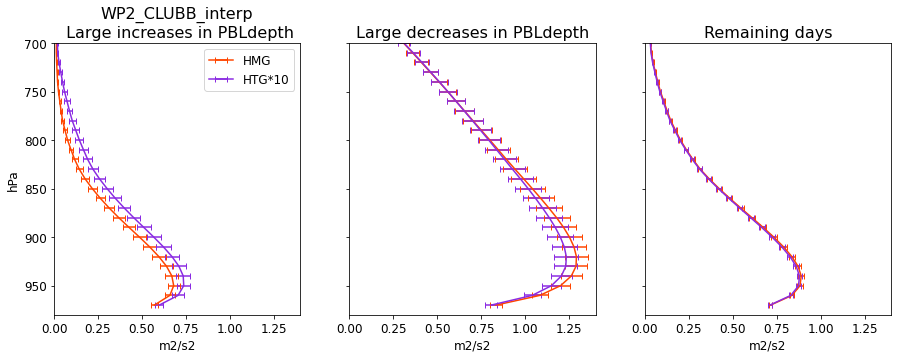

In [147]:
varSelPlot = 'WP2_CLUBB_interp'
xminPlot   = 0.0
xmaxPlot   = 1.4

## Plot day2
plotProfiles_meanOverHours(highPct_day3, 
                           lowPct_day3,
                           restOfDays_day3,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 


## Time height plots 

In [49]:
'''
Plot diurnal cycle of a selected  variable (varSelPlot), from the sfc to some height in the atm (maxLev). 
Plotted for the average highPct, lowPct, and restOfDays datasets. 
'''

def plotTimeHeight_meanDiuranlCycle(highPctDS, lowPctDS, restDS, 
                                    highPctStdDS, lowPctStdDS, restStdDS,
                                    varSelPlot, maxLev, cmapRaw='jet'):
    
    ## Select which levels array to use
    if np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.ilev.values):
        levSel = 'ilev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.lev.values):
        levSel = 'lev'
    elif np.shape(highPctDS[varSelPlot].values)[2]==len(highPctDS.levInterp.values):
        levSel = 'levInterp'
        
    ## Select variables in requested level range 
    varHigh = highPctDS[varSelPlot].isel(levInterp=np.where(highPctDS.levInterp>=maxLev)[0])
    varLow  = lowPctDS[varSelPlot].isel(levInterp=np.where(lowPctDS.levInterp>=maxLev)[0])
    varRest = restDS[varSelPlot].isel(levInterp=np.where(restDS.levInterp>=maxLev)[0])
    
    ## Compute differences between HTG cases and HMG case 
    diffHTG_high   = np.squeeze(varHigh.sel(case='HTG*01')-varHigh.sel(case='HMG'))
    diffHTG05_high = np.squeeze(varHigh.sel(case='HTG*05')-varHigh.sel(case='HMG'))
    diffHTG10_high = np.squeeze(varHigh.sel(case='HTG*10')-varHigh.sel(case='HMG')) 
    
    diffHTG_low    = np.squeeze(varLow.sel(case='HTG*01')-varLow.sel(case='HMG')) 
    diffHTG05_low  = np.squeeze(varLow.sel(case='HTG*05')-varLow.sel(case='HMG')) 
    diffHTG10_low  = np.squeeze(varLow.sel(case='HTG*10')-varLow.sel(case='HMG')) 
    
    diffHTG_rest   = np.squeeze(varRest.sel(case='HTG*01')-varRest.sel(case='HMG')) 
    diffHTG05_rest = np.squeeze(varRest.sel(case='HTG*05')-varRest.sel(case='HMG'))
    diffHTG10_rest = np.squeeze(varRest.sel(case='HTG*10')-varRest.sel(case='HMG')) 
    
    ## Define contour levels as between some percentiles... 
    maxPlotRange = 95
    minPlotRange = 5
    
    cMax  = np.nanmax([np.nanpercentile(varHigh.sel(case='HMG'), maxPlotRange), 
                       np.nanpercentile(varLow.sel(case='HMG'),  maxPlotRange), 
                       np.nanpercentile(varRest.sel(case='HMG'), maxPlotRange)])
    cMin  = np.nanmin([np.nanpercentile(varHigh.sel(case='HMG'), minPlotRange),
                       np.nanpercentile(varLow.sel(case='HMG'),  minPlotRange), 
                       np.nanpercentile(varRest.sel(case='HMG'), minPlotRange)])
    cStep = (cMax - cMin)/100.0
    
    
    diffHigh_cMax  = np.nanmax([np.nanpercentile(diffHTG_high,   maxPlotRange),
                                np.nanpercentile(diffHTG05_high, maxPlotRange),
                                np.nanpercentile(diffHTG10_high, maxPlotRange)])
    diffHigh_cMin  = np.nanmax([np.nanpercentile(diffHTG_high,   minPlotRange),
                                np.nanpercentile(diffHTG05_high, minPlotRange),
                                np.nanpercentile(diffHTG10_high, minPlotRange)])
    # diffHigh_cStep = (diffHigh_cMax - diffHigh_cMin)/100.0
    boundsHigh     = np.nanmax([np.abs(diffHigh_cMin), np.abs(diffHigh_cMax)])
    diffHigh_cStep = (2*boundsHigh)/100.0
    levsHigh       = np.arange(-boundsHigh, boundsHigh+diffHigh_cStep, diffHigh_cStep)
    
    
    diffLow_cMax  = np.nanmax([np.nanpercentile(diffHTG_low,   maxPlotRange),
                               np.nanpercentile(diffHTG05_low, maxPlotRange),
                               np.nanpercentile(diffHTG10_low, maxPlotRange)])
    diffLow_cMin  = np.nanmax([np.nanpercentile(diffHTG_low,   minPlotRange),
                               np.nanpercentile(diffHTG05_low, minPlotRange),
                               np.nanpercentile(diffHTG10_low, minPlotRange)])
    # diffLow_cStep = (diffLow_cMax - diffLow_cMin)/100.0
    boundsLow     = np.nanmax([np.abs(diffLow_cMin), np.abs(diffLow_cMax)])
    diffLow_cStep = (2*boundsLow)/100.0
    levsLow       = np.arange(-boundsLow, boundsLow+diffLow_cStep, diffLow_cStep)    
    
    diffRest_cMax  = np.nanmax([np.nanpercentile(diffHTG_rest,   maxPlotRange),
                               np.nanpercentile(diffHTG05_rest, maxPlotRange),
                               np.nanpercentile(diffHTG10_rest, maxPlotRange)])
    diffRest_cMin  = np.nanmax([np.nanpercentile(diffHTG_rest,   minPlotRange),
                               np.nanpercentile(diffHTG05_rest, minPlotRange),
                               np.nanpercentile(diffHTG10_rest, minPlotRange)])
    # diffRest_cStep = (diffRest_cMax - diffRest_cMin)/100.0
    boundsRest     = np.nanmax([np.abs(diffRest_cMin), np.abs(diffRest_cMax)])
    diffRest_cStep = (2*boundsRest)/100.0
    levsRest       = np.arange(-boundsRest, boundsRest+diffRest_cStep, diffRest_cStep)
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    ## Set up figure
    fig,axs = plt.subplots(3,4, figsize=(18,14))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace=0.4)

    hours   = highPctDS.hour.values
    atmLevs = highPctDS[levSel].isel(levInterp=np.where(restDS[levSel]>=maxLev)[0]).values
    
    # Plot raw HMG values: 
    
    contour_plot = axs[0].contourf(hours, atmLevs,
                                 np.squeeze(varHigh.sel(case='HMG')).transpose(),
                                 levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapRaw ,extend='both')
    contour_plot = axs[4].contourf(hours, atmLevs,
                                 np.squeeze(varLow.sel(case='HMG')).transpose(),
                                 levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapRaw,extend='both')
    contour_plot = axs[8].contourf(hours, atmLevs,
                                 np.squeeze(varRest.sel(case='HMG')).transpose(),
                                 levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapRaw,extend='both')
    
    # Add colorbar
    ax_position = axs[8].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.025, ax_position.y0-0.08, ax_position.width+0.05, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    cbar.ax.tick_params(labelsize=12)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences (high pct)
    # boundsHigh = np.nanmax([np.abs(diffHigh_cMin), np.abs(diffHigh_cMax)])
    # levsHigh = np.arange(-boundsHigh, boundsHigh+diffHigh_cStep, diffHigh_cStep)
    contour_plot = axs[1].contourf(hours, atmLevs, diffHTG_high.transpose(),
                                   levels=levsHigh, cmap='bwr',extend='both')
    contour_plot = axs[2].contourf(hours, atmLevs, diffHTG05_high.transpose(),
                                   levels=levsHigh, cmap='bwr',extend='both')
    contour_plot = axs[3].contourf(hours, atmLevs, diffHTG10_high.transpose(),
                                   levels=levsHigh, cmap='bwr',extend='both')
    # Add colorbar
    ax_position = axs[2].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.03, ax_position.width+0.29, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
    cbar.ax.tick_params(labelsize=12)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences (low pct)
    # boundsLow = np.nanmax([np.abs(diffLow_cMin), np.abs(diffLow_cMax)])
    # levsLow = np.arange(-boundsLow, boundsLow+diffLow_cStep, diffLow_cStep)    
    contour_plot = axs[5].contourf(hours, atmLevs, diffHTG_low.transpose(),
                                   levels=levsLow, cmap='bwr',extend='both')
    contour_plot = axs[6].contourf(hours, atmLevs, diffHTG05_low.transpose(),
                                   levels=levsLow, cmap='bwr',extend='both')
    contour_plot = axs[7].contourf(hours, atmLevs, diffHTG10_low.transpose(),
                                   levels=levsLow, cmap='bwr',extend='both')
    # Add colorbar
    ax_position = axs[6].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.03, ax_position.width+0.29, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
    cbar.ax.tick_params(labelsize=12)    

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences (rest)
    # boundsRest = np.nanmax([np.abs(diffRest_cMin), np.abs(diffRest_cMax)])
    # levsRest   = np.arange(-boundsRest, boundsRest+diffRest_cStep, diffRest_cStep)
    contour_plot = axs[9].contourf(hours, atmLevs, diffHTG_rest.transpose(),
                                   levels=levsRest, cmap='bwr',extend='both')
    contour_plot = axs[10].contourf(hours, atmLevs, diffHTG05_rest.transpose(),
                                   levels=levsRest, cmap='bwr',extend='both')
    contour_plot = axs[11].contourf(hours, atmLevs, diffHTG10_rest.transpose(),
                                   levels=levsRest, cmap='bwr',extend='both')
    # Add colorbar
    ax_position = axs[10].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.07, ax_position.width+0.29, 0.02])
    if ( (varSelPlot=='Q') | (varSelPlot=='Q_interp')):
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
    else:
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax,format='%.1e')
    cbar.ax.tick_params(labelsize=12)    
    
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()
    axs[3].invert_yaxis()
    axs[4].invert_yaxis()
    axs[5].invert_yaxis()
    axs[6].invert_yaxis()
    axs[7].invert_yaxis()
    axs[8].invert_yaxis()
    axs[9].invert_yaxis()
    axs[10].invert_yaxis()
    axs[11].invert_yaxis()


    axs[0].axes.xaxis.set_ticklabels([])
    axs[1].axes.xaxis.set_ticklabels([])
    axs[2].axes.xaxis.set_ticklabels([])
    axs[3].axes.xaxis.set_ticklabels([])
    axs[4].axes.xaxis.set_ticklabels([])
    axs[5].axes.xaxis.set_ticklabels([])
    axs[6].axes.xaxis.set_ticklabels([])
    axs[7].axes.xaxis.set_ticklabels([])
    
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])
    axs[3].axes.yaxis.set_ticklabels([])
    axs[5].axes.yaxis.set_ticklabels([])
    axs[6].axes.yaxis.set_ticklabels([])
    axs[7].axes.yaxis.set_ticklabels([])
    axs[9].axes.yaxis.set_ticklabels([])
    axs[10].axes.yaxis.set_ticklabels([])
    axs[11].axes.yaxis.set_ticklabels([])
   

    axs[0].set_title(varSelPlot+' (HMG)\n Large increases in '+varSel, fontsize=16)
    axs[1].set_title('HTG-HMG', fontsize=16)
    axs[2].set_title('HTG5-HMG', fontsize=16)
    axs[3].set_title('HTG10-HMG', fontsize=16)
        
    axs[4].set_title('Large decreases in '+varSel, fontsize=16)
    axs[8].set_title('Remaining days', fontsize=16)

    axs[8].set_xlabel('Local Hour', fontsize=12)
    axs[9].set_xlabel('Local Hour', fontsize=12)
    axs[10].set_xlabel('Local Hour', fontsize=12)
    axs[11].set_xlabel('Local Hour', fontsize=12)

    axs[0].set_ylabel('hPa', fontsize=12)
    axs[4].set_ylabel('hPa', fontsize=12)
    axs[8].set_ylabel('hPa', fontsize=12)


    axs[0].tick_params(axis='both', labelsize= 12)
    axs[1].tick_params(axis='both', labelsize= 12)
    axs[2].tick_params(axis='both', labelsize= 12)
    axs[3].tick_params(axis='both', labelsize= 12)
    axs[4].tick_params(axis='both', labelsize= 12)
    axs[5].tick_params(axis='both', labelsize= 12)
    axs[6].tick_params(axis='both', labelsize= 12)
    axs[7].tick_params(axis='both', labelsize= 12)
    axs[8].tick_params(axis='both', labelsize= 12)
    axs[9].tick_params(axis='both', labelsize= 12)
    axs[10].tick_params(axis='both', labelsize= 12)
    axs[11].tick_params(axis='both', labelsize= 12)
        

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Add markers of significance:
        
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
        
    
    # Select var and select same levels for std DS:
    stdHigh = highPctStdDS[varSelPlot].isel(levInterp=np.where(highPctStdDS.levInterp>=maxLev)[0])
    stdLow  = lowPctStdDS[varSelPlot].isel(levInterp=np.where(lowPctStdDS.levInterp>=maxLev)[0])
    stdRest = restStdDS[varSelPlot].isel(levInterp=np.where(restStdDS.levInterp>=maxLev)[0])
    
    for il in range(len(atmLevs)): 
        stdErr_high = np.squeeze(stdHigh.isel(levInterp=il))/np.sqrt(np.expand_dims(highPctDS['SampleCount'].values, 1))
        stdErr_low  = np.squeeze(stdLow.isel(levInterp=il))/np.sqrt(np.expand_dims(lowPctDS['SampleCount'].values,1 ))
        stdErr_rest = np.squeeze(stdLow.isel(levInterp=il))/np.sqrt(np.expand_dims(restDS['SampleCount'].values,1))
        
        ## High pct
        xmax1_highPct = np.squeeze(varHigh).sel(case='HMG').values[:,il] + (CIlevel*stdErr_high.sel(case='HMG'))
        xmin1_highPct = np.squeeze(varHigh).sel(case='HMG').values[:,il] - (CIlevel*stdErr_high.sel(case='HMG'))
        xmax2_highPct = np.squeeze(varHigh).sel(case='HTG*01').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*01'))
        xmin2_highPct = np.squeeze(varHigh).sel(case='HTG*01').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*01'))
        
        xmax2_highPct10 = np.squeeze(varHigh).sel(case='HTG*10').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*10'))
        xmin2_highPct10 = np.squeeze(varHigh).sel(case='HTG*10').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*10'))
        
        xmax2_highPct05 = np.squeeze(varHigh).sel(case='HTG*05').values[:,il] + (CIlevel*stdErr_high.sel(case='HTG*05'))
        xmin2_highPct05 = np.squeeze(varHigh).sel(case='HTG*05').values[:,il] - (CIlevel*stdErr_high.sel(case='HTG*05'))
    
        ## Low pct
        xmax1_lowPct = np.squeeze(varLow).sel(case='HMG')[:,il] + (CIlevel*stdErr_low.sel(case='HMG'))
        xmin1_lowPct = np.squeeze(varLow).sel(case='HMG')[:,il] - (CIlevel*stdErr_low.sel(case='HMG'))
        xmax2_lowPct = np.squeeze(varLow).sel(case='HTG*01')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*01'))
        xmin2_lowPct = np.squeeze(varLow).sel(case='HTG*01')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*01'))
        
        xmax2_lowPct10 = np.squeeze(varLow).sel(case='HTG*10')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*10'))
        xmin2_lowPct10 = np.squeeze(varLow).sel(case='HTG*10')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*10'))
        
        xmax2_lowPct05 = np.squeeze(varLow).sel(case='HTG*05')[:,il] + (CIlevel*stdErr_low.sel(case='HTG*05'))
        xmin2_lowPct05 = np.squeeze(varLow).sel(case='HTG*05')[:,il] - (CIlevel*stdErr_low.sel(case='HTG*05'))
        
        ## Rest of daty 
        xmax1_rest = np.squeeze(varRest).sel(case='HMG')[:,il] + (CIlevel*stdErr_rest.sel(case='HMG'))
        xmin1_rest = np.squeeze(varRest).sel(case='HMG')[:,il] - (CIlevel*stdErr_rest.sel(case='HMG'))
        xmax2_rest = np.squeeze(varRest).sel(case='HTG*01')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*01'))
        xmin2_rest = np.squeeze(varRest).sel(case='HTG*01')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*01'))
        
        xmax2_rest10 = np.squeeze(varRest).sel(case='HTG*10')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*10'))
        xmin2_rest10 = np.squeeze(varRest).sel(case='HTG*10')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*10'))
        
        xmax2_rest05 = np.squeeze(varRest).sel(case='HTG*05')[:,il] + (CIlevel*stdErr_rest.sel(case='HTG*05'))
        xmin2_rest05 = np.squeeze(varRest).sel(case='HTG*05')[:,il] - (CIlevel*stdErr_rest.sel(case='HTG*05'))
        
        
        # Check significance and plot 
        levSig_highPct   = np.ones([24])
        levSig_highPct10 = np.ones([24])
        levSig_highPct05 = np.ones([24])
        
        levSig_lowPct   = np.ones([24])
        levSig_lowPct10 = np.ones([24])
        levSig_lowPct05 = np.ones([24])
        
        levSig_rest   = np.ones([24])
        levSig_rest10 = np.ones([24])
        levSig_rest05 = np.ones([24])
        
        for iHr in range(len(hours)):
            ## ---- High Pct ----
            # HTG
            if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct[iHr]))):
                levSig_highPct[iHr] = 0
            elif ((abs(xmin2_highPct[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct[iHr])<=abs(xmax1_highPct[iHr]))):
                levSig_highPct[iHr] = 0
            if levSig_highPct[iHr]==1:
                axs[1].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                
            # HTG10
            if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct10[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct10[iHr]))):
                levSig_highPct10[iHr] = 0
            elif ((abs(xmin2_highPct10[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct10[iHr])<=abs(xmax1_highPct[iHr]))):
                levSig_highPct10[iHr] = 0
            if levSig_highPct10[iHr]==1:
                 axs[3].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # HTG05
            if ((abs(xmin1_highPct[iHr])>=abs(xmin2_highPct05[iHr])) & (abs(xmin1_highPct[iHr])<=abs(xmax2_highPct05[iHr]))):
                levSig_highPct05[iHr] = 0
            elif ((abs(xmin2_highPct05[iHr])>=abs(xmin1_highPct[iHr])) & (abs(xmin2_highPct05[iHr])<=abs(xmax1_highPct[iHr]))):
                levSig_highPct05[iHr] = 0
            if levSig_highPct05[iHr]==1:
                 axs[2].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
                    
            ## ---- Low Pct ----
            # HTG
            if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct[iHr]))):
                levSig_lowPct[iHr] = 0
            elif ((abs(xmin2_lowPct[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct[iHr])<=abs(xmax1_lowPct[iHr]))):
                levSig_lowPct[iHr] = 0
            if levSig_lowPct[iHr]==1:
                axs[5].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                
            # HTG10
            if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct10[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct10[iHr]))):
                levSig_lowPct10[iHr] = 0
            elif ((abs(xmin2_lowPct10[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct10[iHr])<=abs(xmax1_lowPct[iHr]))):
                levSig_lowPct10[iHr] = 0
            if levSig_lowPct10[iHr]==1:
                 axs[7].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # HTG05
            if ((abs(xmin1_lowPct[iHr])>=abs(xmin2_lowPct05[iHr])) & (abs(xmin1_lowPct[iHr])<=abs(xmax2_lowPct05[iHr]))):
                levSig_lowPct05[iHr] = 0
            elif ((abs(xmin2_lowPct05[iHr])>=abs(xmin1_lowPct[iHr])) & (abs(xmin2_lowPct05[iHr])<=abs(xmax1_lowPct[iHr]))):
                levSig_lowPct05[iHr] = 0
            if levSig_lowPct05[iHr]==1:
                 axs[6].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
            
                
                    
            ## ---- Rest of days ----
            # HTG
            if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest[iHr]))):
                levSig_rest[iHr] = 0
            elif ((abs(xmin2_rest[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest[iHr])<=abs(xmax1_rest[iHr]))):
                levSig_rest[iHr] = 0
            if levSig_rest[iHr]==1:
                axs[9].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                
            # HTG10
            if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest10[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest10[iHr]))):
                levSig_rest10[iHr] = 0
            elif ((abs(xmin2_rest10[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest10[iHr])<=abs(xmax1_rest[iHr]))):
                levSig_rest10[iHr] = 0
            if levSig_rest10[iHr]==1:
                 axs[11].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)
                    
            # HTG05
            if ((abs(xmin1_rest[iHr])>=abs(xmin2_rest05[iHr])) & (abs(xmin1_rest[iHr])<=abs(xmax2_rest05[iHr]))):
                levSig_rest05[iHr] = 0
            elif ((abs(xmin2_rest05[iHr])>=abs(xmin1_rest[iHr])) & (abs(xmin2_rest05[iHr])<=abs(xmax1_rest[iHr]))):
                levSig_rest05[iHr] = 0
            if levSig_rest05[iHr]==1:
                 axs[10].plot(hours[iHr],atmLevs[il],'ko',alpha=0.3,markersize=1)

    
    return 

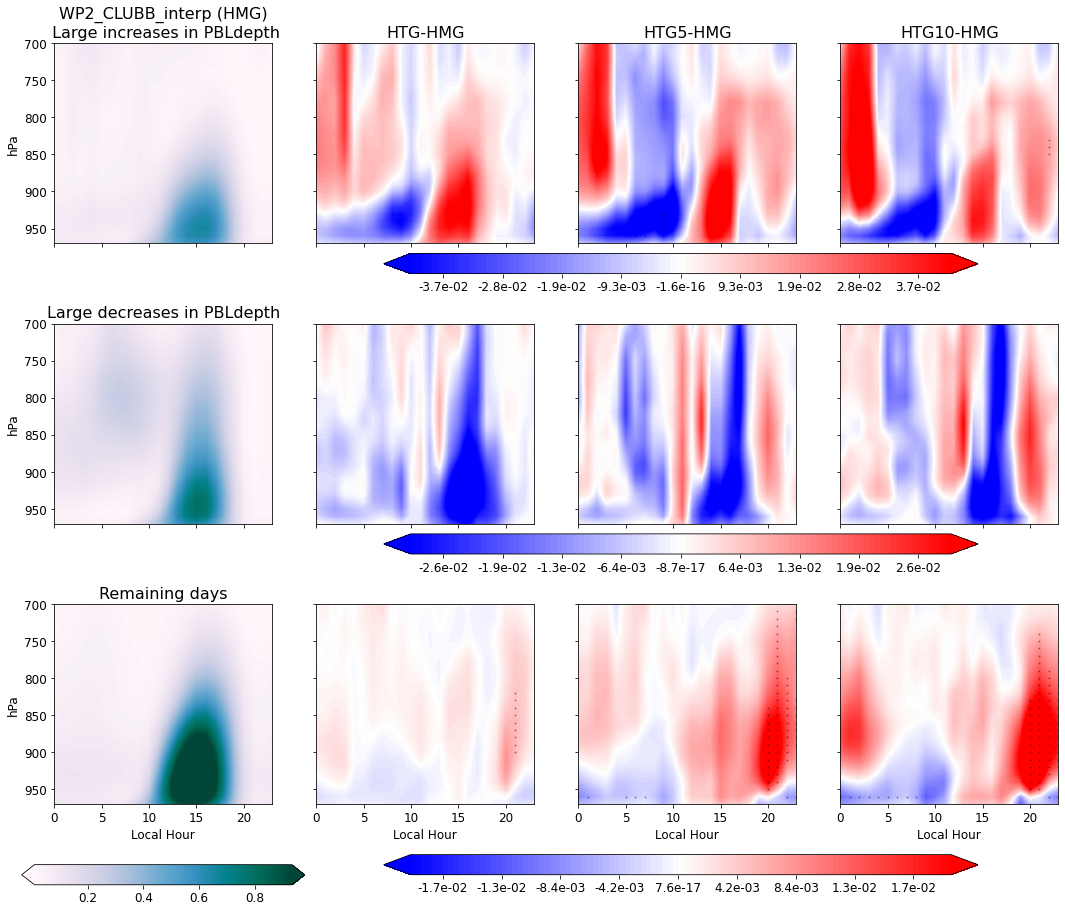

In [61]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                # 'WPRTP_CLUBB_interp', 700,'YlGnBu')
                                # 'WPTHLP_CLUBB_interp', 700,'YlOrRd')
                                'WP2_CLUBB_interp', 700,'PuBuGn')
                                # 'RTPTHLP_CLUBB_interp', 700,'Greens')
                                # 'THLP2_CLUBB_interp', 700,'Oranges')
                                # 'RTP2_CLUBB_interp', 700,'Blues') 

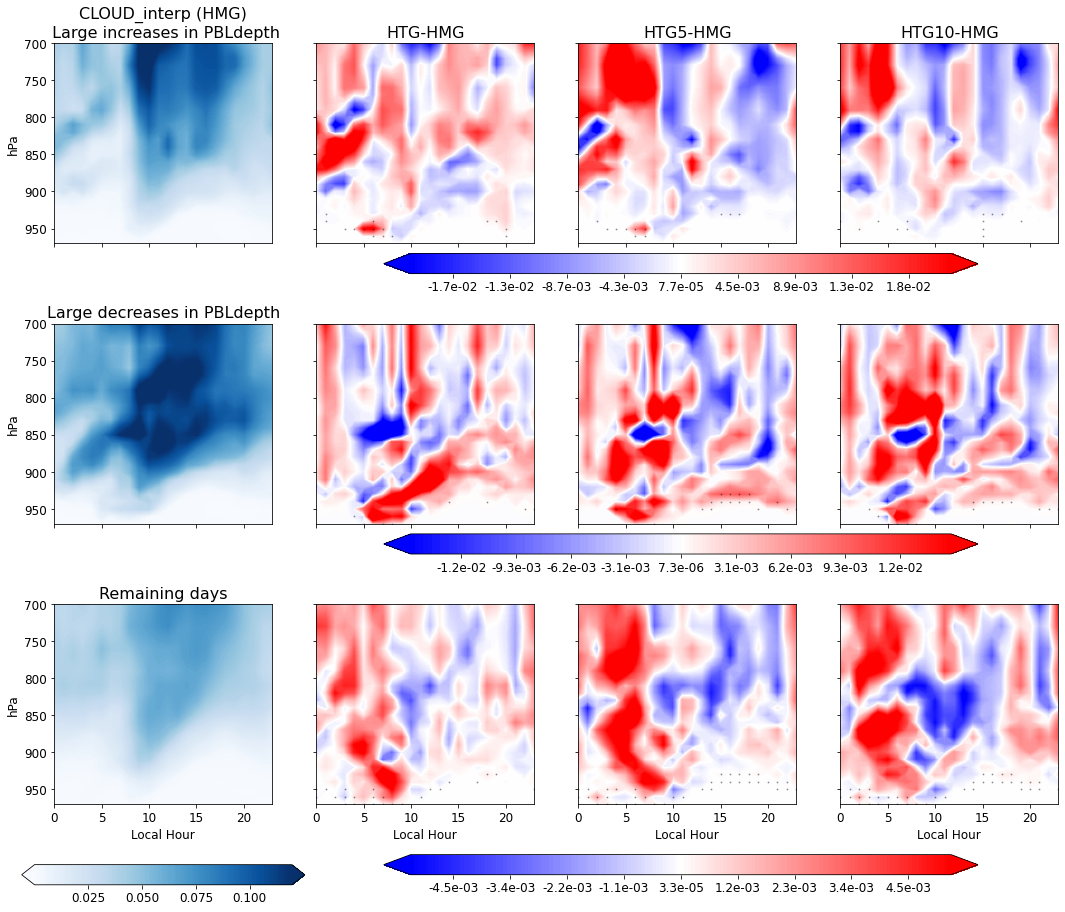

In [45]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                'CLOUD_interp', 700,'Blues')
                                # 'Qs_interp', 500,'Blues')
                                # 'T_interp', 700,'Reds')


**Day 2?**

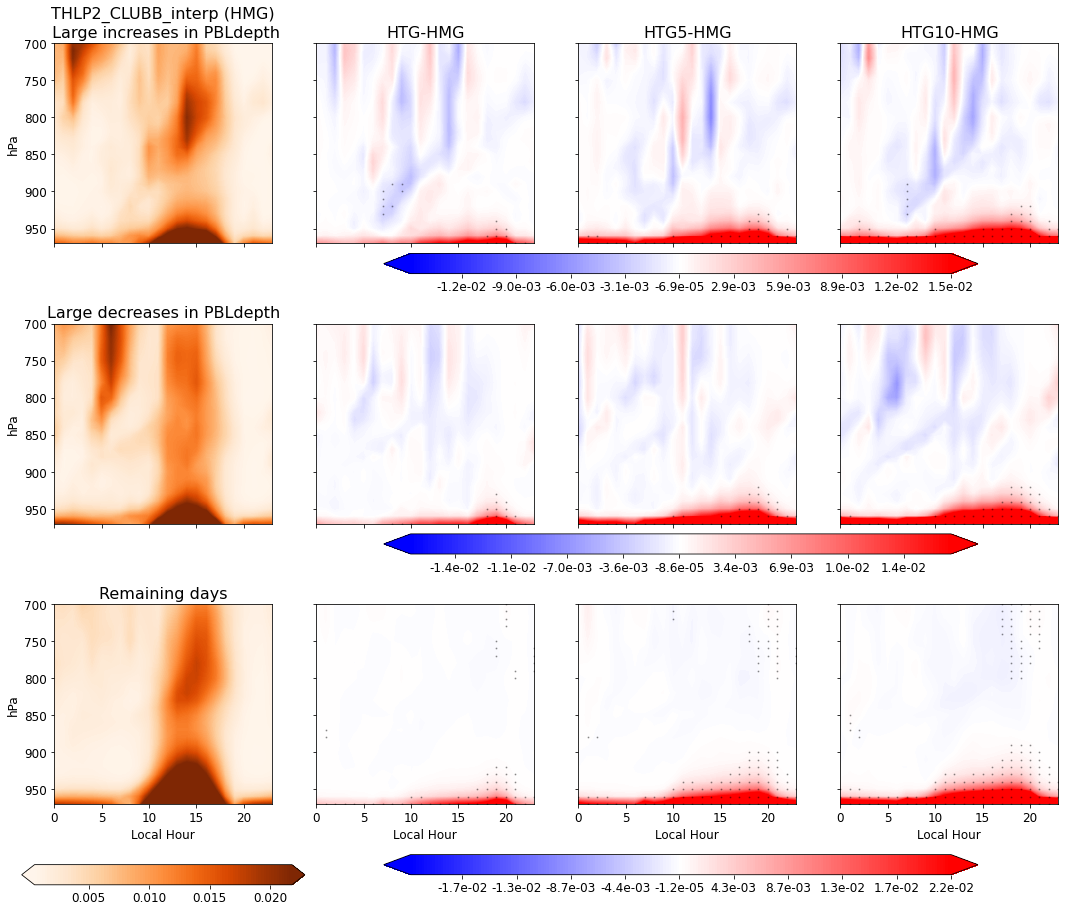

In [48]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                # 'RVMTEND_CLUBB_interp', 700,'YlGnBu')
                                # 'WP2_CLUBB_interp', 700,'YlOrRd')
                                # 'RTPTHLP_CLUBB_interp', 700,'Greens')
                                'THLP2_CLUBB_interp', 700,'Oranges')
                                # 'RTP2_CLUBB_interp', 700,'Blues')

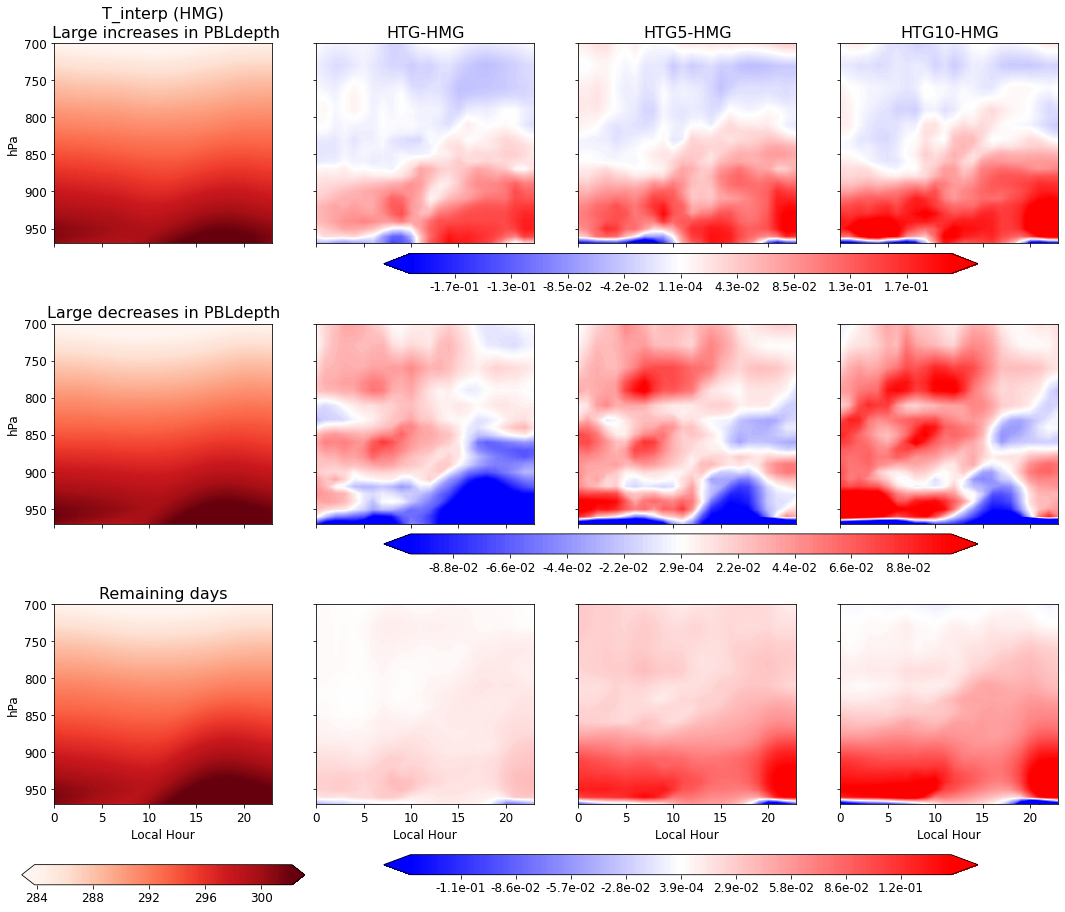

In [49]:
plotTimeHeight_meanDiuranlCycle(hrMean_high_day2, hrMean_low_day2, hrMean_rest_day2, 
                                hrStd_high_day2, hrStd_low_day2, hrStd_rest_day2,
                                # 'CLOUD_interp', 700,'Blues')
                                # 'Q_interp', 500,'Blues')
                                'T_interp', 700,'Reds')


## Look at distributions by level?

In [24]:
# Plot afternoon means of a selected variable 

plotVar = 'RTP2_CLUBB_interp'
# plotVar = 'WP2_CLUBB_interp' 

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day2,real_varHTG_day2, real_varHTG10_day2, real_varHTG05_day2, diffHTG_day2, diffHTG10_day2, diffHTG05_day2 = meanVars_overHours(day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3, real_varHTG10_day3, real_varHTG05_day3, diffHTG_day3, diffHTG10_day3, diffHTG05_day3 = meanVars_overHours(day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4, real_varHTG10_day4, real_varHTG05_day4, diffHTG_day4, diffHTG10_day4, diffHTG05_day4 = meanVars_overHours(day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5, real_varHTG10_day5, real_varHTG05_day5, diffHTG_day5, diffHTG10_day5, diffHTG05_day5 = meanVars_overHours(day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6, real_varHTG10_day6, real_varHTG05_day6, diffHTG_day6, diffHTG10_day6, diffHTG05_day6 = meanVars_overHours(day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)





In [33]:
def plotPDFS_distVar(DS, distVar, startHr, endHr):
    # Grab requested variable 
    real_var = DS[distVar]

    # Select those hours
    iHours_real = np.where( (real_var['time.hour']>=startHr) & (real_var['time.hour']<=endHr) )[0]
    real_var_selTime = real_var.isel(time=iHours_real)

    # For each date, get the mean value over the selected time period 
    real_var_dayMean = real_var_selTime.groupby('year_month_day').mean(dim='time')
    
    # Plot each level on its own 
    nLevPlot = 8
    totlLevs = len(real_var_dayMean.levInterp.values)
    
    fig,axs = plt.subplots(nLevPlot,1, figsize=(14,25) )
    axs     = axs.ravel()
    fig.subplots_adjust(hspace=0.75)

    for iLevSel in range(nLevPlot): 
        # Define dataframe
        dfReal = pd.concat(axis=0, ignore_index=True, objs=[
             pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HMG').values)[:,-nLevPlot+iLevSel],    'case': 'HMG'}),
             pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HTG*01').values)[:,-nLevPlot+iLevSel], 'case': 'HTG'}),
             pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HTG*05').values)[:,-nLevPlot+iLevSel], 'case': 'HTG*05'}),
             pd.DataFrame.from_dict({distVar: np.squeeze(real_var_dayMean.sel(case='HTG*10').values)[:,-nLevPlot+iLevSel], 'case': 'HTG*10'}),
        ])

        # Make plot         
        sns.kdeplot(data=dfReal, x=distVar, hue="case", ax=axs[iLevSel], cut=0, log_scale=False,
                palette=['orangered','turquoise','forestgreen','blueviolet'])

        axs[iLevSel].set_title('Afternoon Mean '+distVar+'\n'+str(DS.levInterp.values[-nLevPlot+iLevSel])+' hPa',fontsize=14)
        # axs[iLevSel].set_xlabel(distVar,fontsize=14)

        axs[iLevSel].tick_params(axis='both', labelsize= 12)
    
    
    return plt
    

<module 'matplotlib.pyplot' from '/glade/work/mdfowler/conda-envs/lensMet-py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

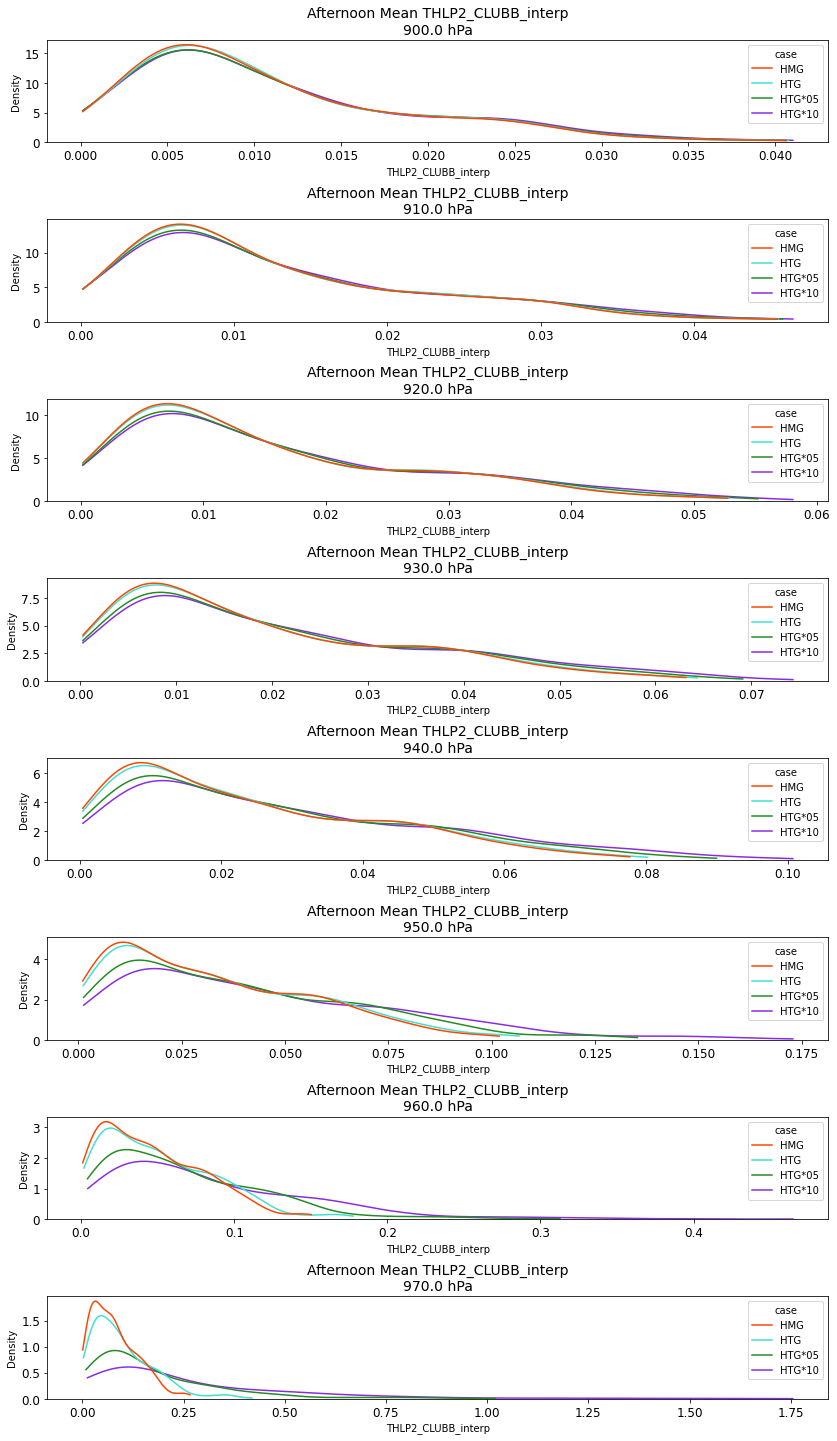

In [34]:
plotPDFS_distVar(day2_upsample, 'THLP2_CLUBB_interp', 12, 18)

In [ ]:
nLevPlot = 8
totlLevs = len(diffHTG_day2.levInterp.values)

fig,axs = plt.subplots(nLevPlot,1, figsize=(14,25) )
axs     = axs.ravel()

axs[0].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)

for iLevSel in range(nLevPlot):
    df = pd.concat(axis=0, ignore_index=True, objs=[
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values)[:,-nLevPlot+iLevSel],   'simDay': 1}), 
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values)[:,-nLevPlot+iLevSel],   'simDay': 2}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values)[:,-nLevPlot+iLevSel],   'simDay': 3}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values)[:,-nLevPlot+iLevSel],   'simDay': 4}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values)[:,-nLevPlot+iLevSel],   'simDay': 5}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values)[:,-nLevPlot+iLevSel],   'simDay': 6}), 
        ])

    ## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
    sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[iLevSel], cut=0, log_scale=False,
                palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

    axs[iLevSel].set_ylabel(str(diffHTG_day1.levInterp.values[-nLevPlot+iLevSel])+' hPa',fontsize=14)

    # axs[iLevSel].set_xlim([1e-6, 2])
    axs[iLevSel].set_xlim([-0.5, 0.5])


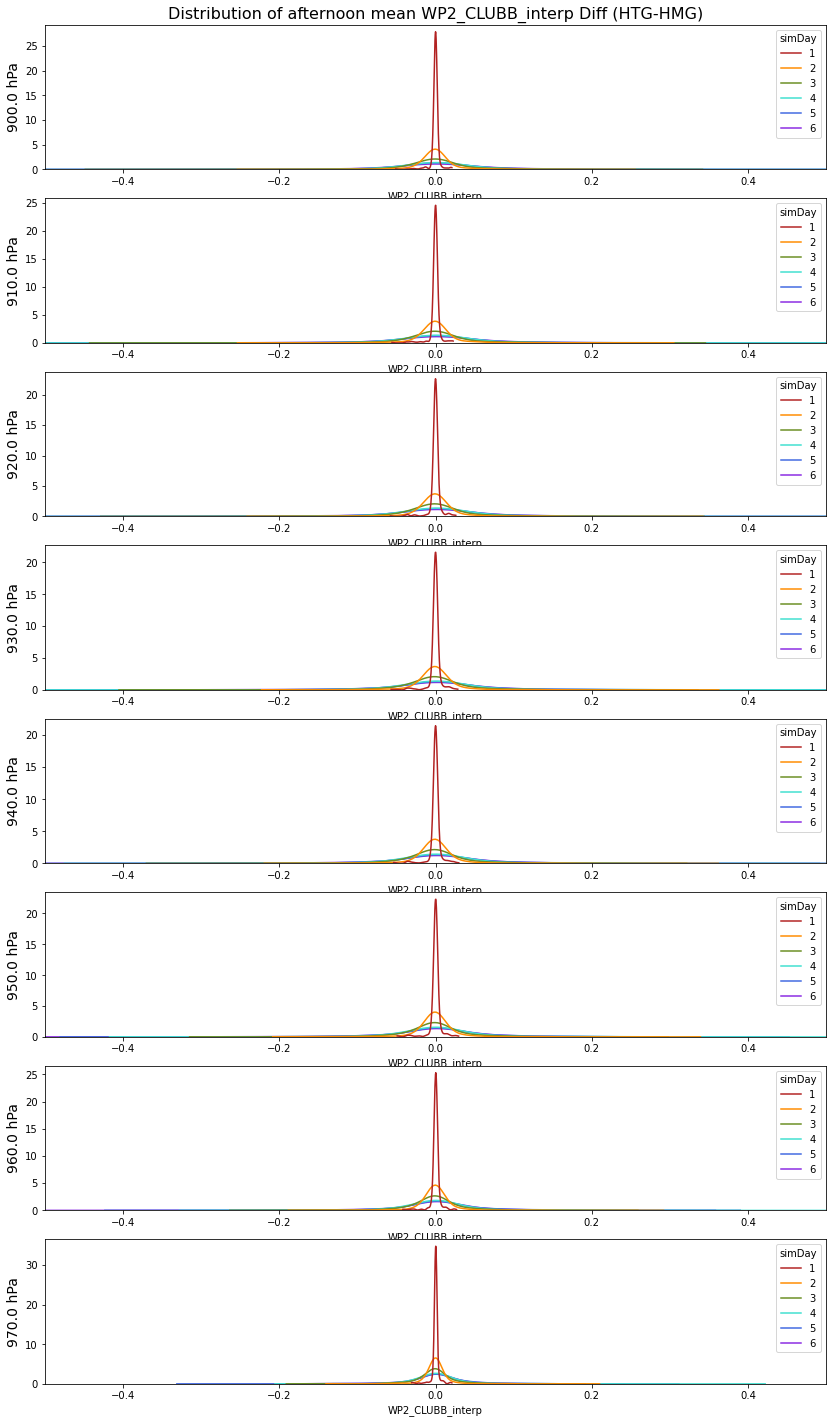

In [40]:
nLevPlot = 8
totlLevs = len(diffHTG_day1.levInterp.values)

fig,axs = plt.subplots(nLevPlot,1, figsize=(14,25) )
axs     = axs.ravel()

axs[0].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)

for iLevSel in range(nLevPlot):
    df = pd.concat(axis=0, ignore_index=True, objs=[
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values)[:,-nLevPlot+iLevSel],   'simDay': 1}), 
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values)[:,-nLevPlot+iLevSel],   'simDay': 2}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values)[:,-nLevPlot+iLevSel],   'simDay': 3}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values)[:,-nLevPlot+iLevSel],   'simDay': 4}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values)[:,-nLevPlot+iLevSel],   'simDay': 5}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values)[:,-nLevPlot+iLevSel],   'simDay': 6}), 
        ])

    ## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
    sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[iLevSel], cut=0, log_scale=False,
                palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

    axs[iLevSel].set_ylabel(str(diffHTG_day1.levInterp.values[-nLevPlot+iLevSel])+' hPa',fontsize=14)

    # axs[iLevSel].set_xlim([1e-6, 2])
    axs[iLevSel].set_xlim([-0.5, 0.5])


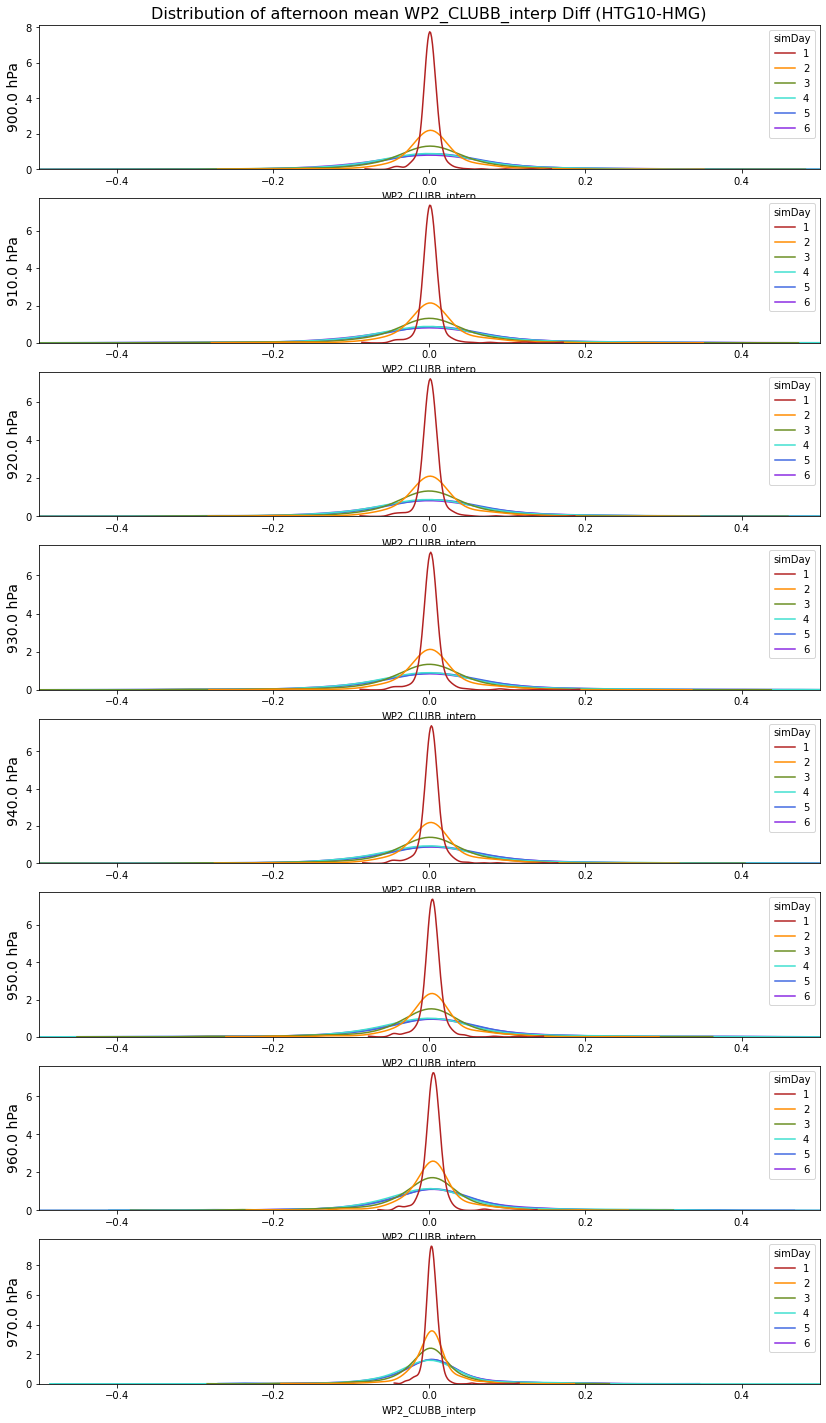

In [39]:
nLevPlot = 8
totlLevs = len(diffHTG_day1.levInterp.values)

fig,axs = plt.subplots(nLevPlot,1, figsize=(14,25) )
axs     = axs.ravel()

axs[0].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG10-HMG)',fontsize=16)

for iLevSel in range(nLevPlot):
    df = pd.concat(axis=0, ignore_index=True, objs=[
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day1.values)[:,-nLevPlot+iLevSel],   'simDay': 1}), 
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day2.values)[:,-nLevPlot+iLevSel],   'simDay': 2}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day3.values)[:,-nLevPlot+iLevSel],   'simDay': 3}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day4.values)[:,-nLevPlot+iLevSel],   'simDay': 4}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day5.values)[:,-nLevPlot+iLevSel],   'simDay': 5}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day6.values)[:,-nLevPlot+iLevSel],   'simDay': 6}), 
        ])

    ## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
    sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[iLevSel], cut=0, log_scale=False,
                palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

    axs[iLevSel].set_ylabel(str(diffHTG10_day1.levInterp.values[-nLevPlot+iLevSel])+' hPa',fontsize=14)

    # axs[iLevSel].set_xlim([1e-6, 2])
    axs[iLevSel].set_xlim([-0.5, 0.5])


Mean values (avg over hr 12 - 18) of PBLH
          HMG       HTG        HTG10
Day1:  1437.1975 1435.5938 1428.6776
Day2:  1589.7830 1588.7842 1583.1687
Day3:  1603.9730 1600.7328 1589.2117
Day4:  1595.5408 1598.4276 1586.5204
Day5:  1586.1770 1594.4259 1581.8979
Day6:  1581.5690 1578.5092 1577.5304


<AxesSubplot:title={'center':'Distribution of afternoon mean PBLH Diff (HTG10-HMG)'}, xlabel='PBLH', ylabel='Density'>

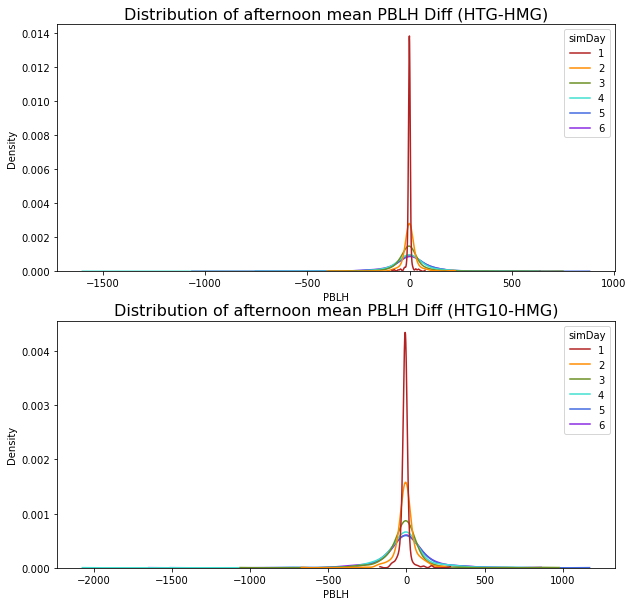

In [60]:
## Sfc land variable?
# Plot afternoon means of a selected variable 


# plotVar = 'TSOI_10CM'
plotVar = 'PBLH'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


real_varHMG_day1,real_varHTG_day1, real_varHTG10_day1, real_varHTG05_day1, diffHTG_day1, diffHTG10_day1, diffHTG05_day1 = meanVars_overHours(day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2, real_varHTG10_day2, real_varHTG05_day2, diffHTG_day2, diffHTG10_day2, diffHTG05_day2 = meanVars_overHours(day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3, real_varHTG10_day3, real_varHTG05_day3, diffHTG_day3, diffHTG10_day3, diffHTG05_day3 = meanVars_overHours(day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4, real_varHTG10_day4, real_varHTG05_day4, diffHTG_day4, diffHTG10_day4, diffHTG05_day4 = meanVars_overHours(day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5, real_varHTG10_day5, real_varHTG05_day5, diffHTG_day5, diffHTG10_day5, diffHTG05_day5 = meanVars_overHours(day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6, real_varHTG10_day6, real_varHTG05_day6, diffHTG_day6, diffHTG10_day6, diffHTG05_day6 = meanVars_overHours(day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

print('Mean values (avg over hr %i - %i) of %s' % (startHr_plt, endHr_plt, plotVar))
print('          HMG       HTG        HTG10')
print('Day1:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day1), np.nanmean(real_varHTG_day1), np.nanmean(real_varHTG10_day1) ) )
print('Day2:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day2), np.nanmean(real_varHTG_day2), np.nanmean(real_varHTG10_day2) ) )
print('Day3:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day3), np.nanmean(real_varHTG_day3), np.nanmean(real_varHTG10_day3) ) )
print('Day4:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day4), np.nanmean(real_varHTG_day4), np.nanmean(real_varHTG10_day4) ) )
print('Day5:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day5), np.nanmean(real_varHTG_day5), np.nanmean(real_varHTG10_day5) ) )
print('Day6:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day6), np.nanmean(real_varHTG_day6), np.nanmean(real_varHTG10_day6) ) )



## Make the plot 

fig,axs = plt.subplots(2,1, figsize=(10,10) )
axs = axs.ravel()

axs[0].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)
axs[1].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG10-HMG)',fontsize=16)

df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values),   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values),   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values),   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values),   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values),   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values),   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[0], cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day1.values),   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day2.values),   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day3.values),   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day4.values),   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day5.values),   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day6.values),   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[1], cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])



Mean values (avg over hr 12 - 18) of SOILWATER_10CM
          HMG       HTG        HTG10
Day1:   23.7275   23.7293   23.7347
Day2:   23.7403   23.7382   23.7510
Day3:   23.7582   23.7652   23.7851
Day4:   23.7869   23.7915   23.8345
Day5:   23.8397   23.8318   23.8525
Day6:   23.8762   23.8733   23.9209


(-2.0, 2.0)

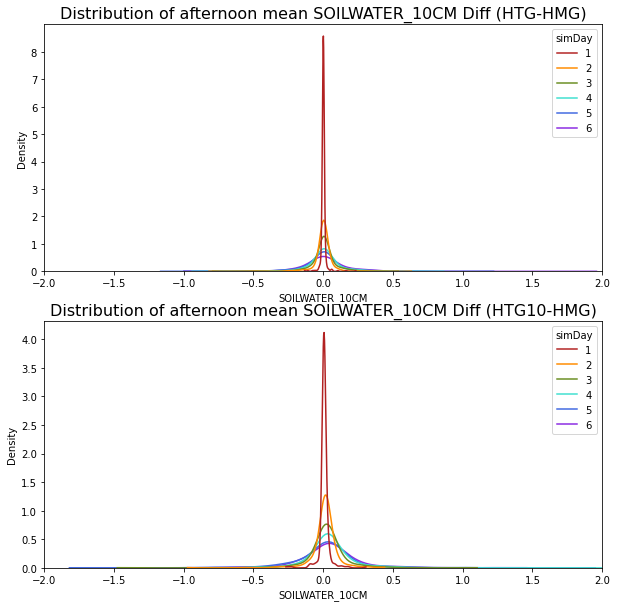

In [48]:
## Sfc land variable?
# Plot afternoon means of a selected variable 


# plotVar = 'TSOI_10CM'
plotVar = 'SOILWATER_10CM'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


real_varHMG_day1,real_varHTG_day1, real_varHTG10_day1, real_varHTG05_day1, diffHTG_day1, diffHTG10_day1, diffHTG05_day1 = meanVars_overHours(day1_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2, real_varHTG10_day2, real_varHTG05_day2, diffHTG_day2, diffHTG10_day2, diffHTG05_day2 = meanVars_overHours(day2_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3, real_varHTG10_day3, real_varHTG05_day3, diffHTG_day3, diffHTG10_day3, diffHTG05_day3 = meanVars_overHours(day3_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4, real_varHTG10_day4, real_varHTG05_day4, diffHTG_day4, diffHTG10_day4, diffHTG05_day4 = meanVars_overHours(day4_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5, real_varHTG10_day5, real_varHTG05_day5, diffHTG_day5, diffHTG10_day5, diffHTG05_day5 = meanVars_overHours(day5_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6, real_varHTG10_day6, real_varHTG05_day6, diffHTG_day6, diffHTG10_day6, diffHTG05_day6 = meanVars_overHours(day6_upsampleCLM, 
                                                                    plotVar, startHr_plt, endHr_plt)

print('Mean values (avg over hr %i - %i) of %s' % (startHr_plt, endHr_plt, plotVar))
print('          HMG       HTG        HTG10')
print('Day1:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day1), np.nanmean(real_varHTG_day1), np.nanmean(real_varHTG10_day1) ) )
print('Day2:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day2), np.nanmean(real_varHTG_day2), np.nanmean(real_varHTG10_day2) ) )
print('Day3:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day3), np.nanmean(real_varHTG_day3), np.nanmean(real_varHTG10_day3) ) )
print('Day4:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day4), np.nanmean(real_varHTG_day4), np.nanmean(real_varHTG10_day4) ) )
print('Day5:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day5), np.nanmean(real_varHTG_day5), np.nanmean(real_varHTG10_day5) ) )
print('Day6:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day6), np.nanmean(real_varHTG_day6), np.nanmean(real_varHTG10_day6) ) )



## Make the plot 

fig,axs = plt.subplots(2,1, figsize=(10,10) )
axs = axs.ravel()

axs[0].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)
axs[1].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG10-HMG)',fontsize=16)

df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values),   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values),   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values),   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values),   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values),   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values),   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[0], cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day1.values),   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day2.values),   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day3.values),   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day4.values),   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day5.values),   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG10_day6.values),   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[1], cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

axs[0].set_xlim([-2, 2])
axs[1].set_xlim([-2, 2])


## Maybe we just want to look at a single day to get a handle on what's going on?

In [ ]:
# axs[2].axvline(datetime.date(2015,8,9), color='r')
# axs[2].axvline(datetime.date(2015,8,5), color='r')
# axs[2].axvline(datetime.date(2015,6,30), color='r')
# axs[1].axvline(datetime.date(2015,6,30), color='r')


# axs[1].axvline(datetime.date(2017, 7, 13), color='r')
# axs[1].axvline(datetime.date(2017, 7, 23), color='r')

In [9]:
## Select date of interest

selYear  = 2017
selMonth = 7
selDay   = 16

iDay_day2 = np.where( (day2_upsample['time.year']==selYear) & (day2_upsample['time.month']==selMonth) & (day2_upsample['time.day']==selDay) )[0]
iDay_day3 = np.where( (day3_upsample['time.year']==selYear) & (day3_upsample['time.month']==selMonth) & (day3_upsample['time.day']==selDay) )[0]

day2_selDay = day2_upsample.isel(time=iDay_day2)
day3_selDay = day3_upsample.isel(time=iDay_day3)

day2clm_selDay = day2_upsampleCLM.isel(time=iDay_day2)
day3clm_selDay = day3_upsampleCLM.isel(time=iDay_day3)


In [10]:
## Select which day to plot (2 or 3?)
plotDay = 2


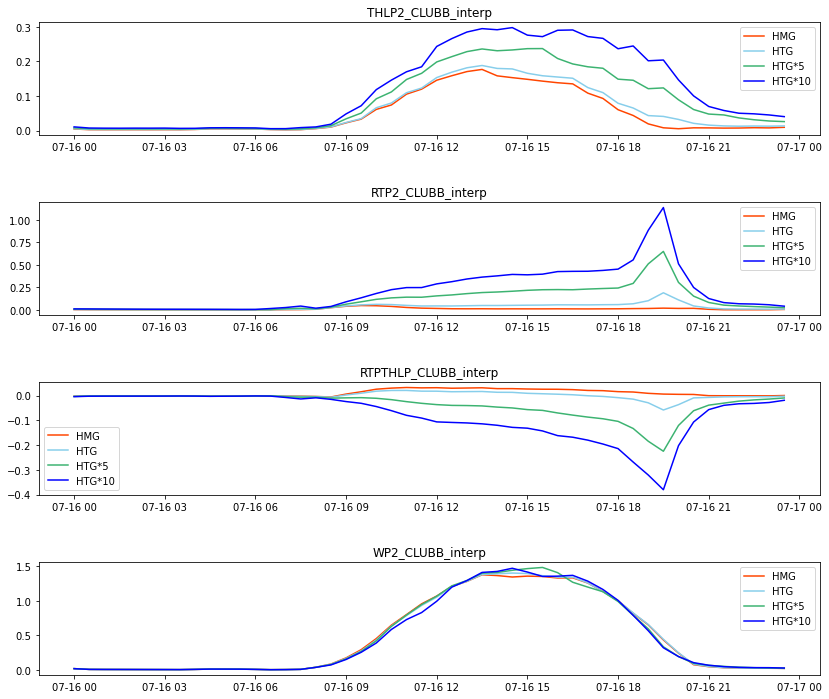

In [11]:
## Which variables to plot timeseries of? 

plotVars = ['THLP2_CLUBB_interp','RTP2_CLUBB_interp','RTPTHLP_CLUBB_interp','WP2_CLUBB_interp']
levSel   = [  -1,                 -1,                  -1,                    -1]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='skyblue', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='skyblue', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='skyblue', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='skyblue', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
 
            
        
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


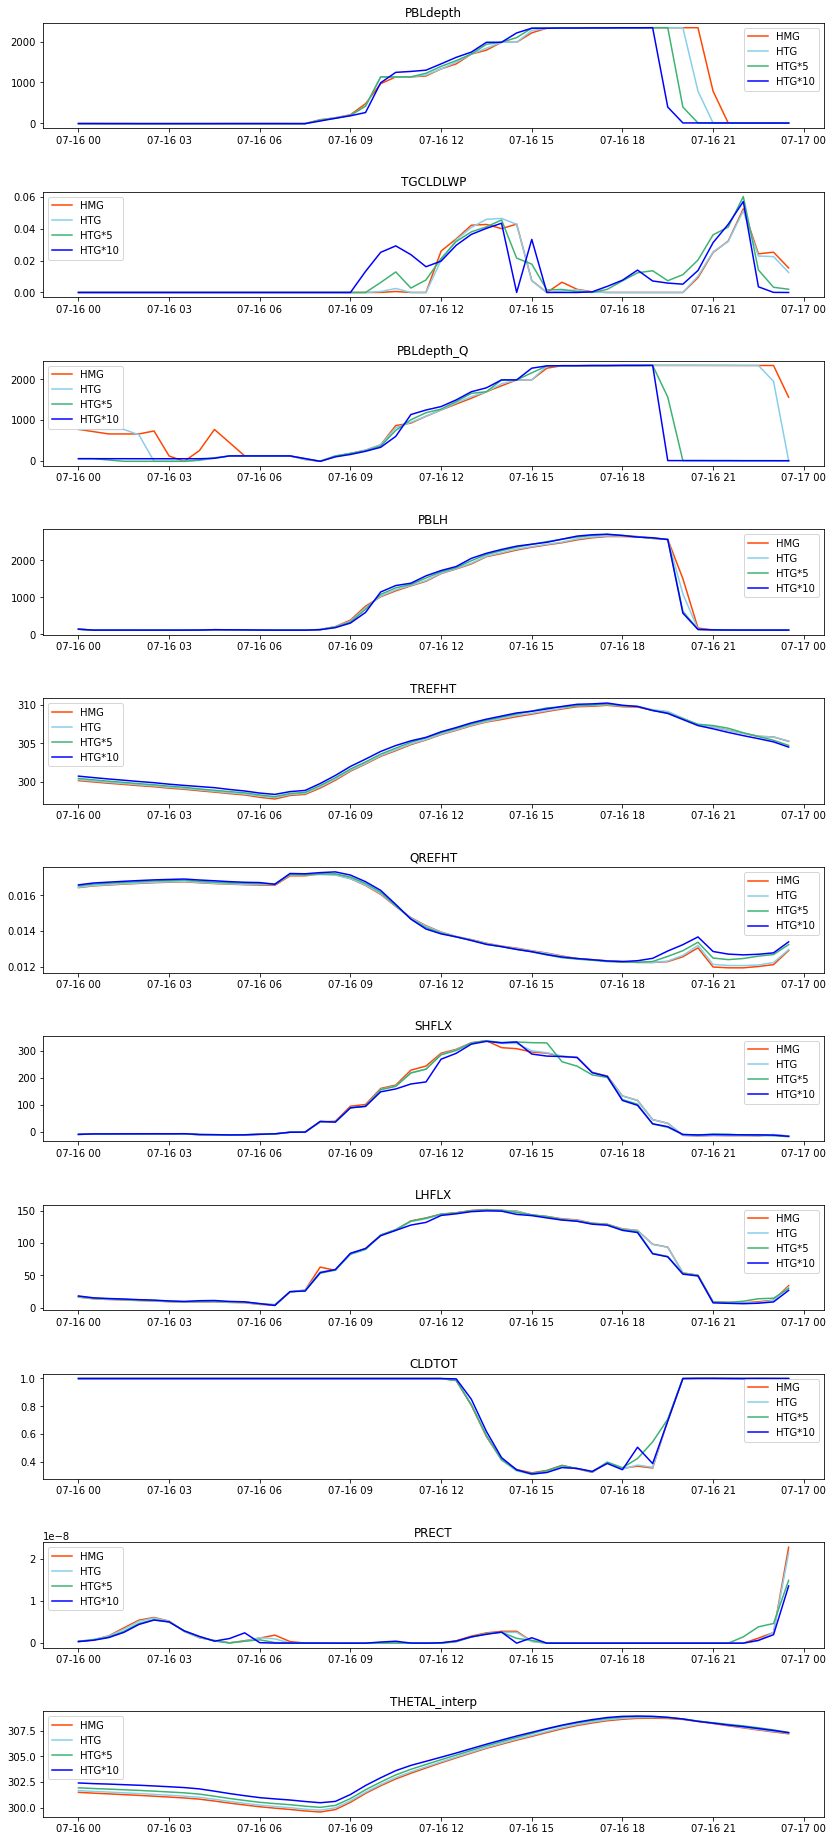

In [12]:
## Which variables to plot timeseries of? 

plotVars = ['PBLdepth','TGCLDLWP','PBLdepth_Q','PBLH','TREFHT','QREFHT','SHFLX','LHFLX','CLDTOT','PRECT','THETAL_interp']
levSel   = [0,          0,      0,     0,       0,      0,      0,       0,       0,      0,       -1]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='skyblue', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='skyblue', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='skyblue', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='skyblue', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
         
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


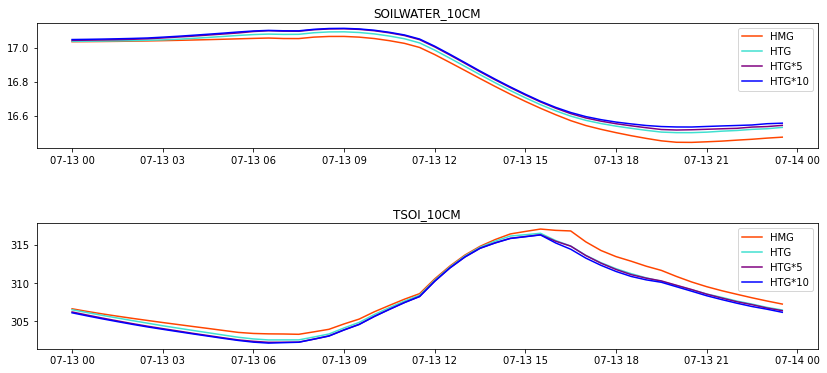

In [26]:
## Which variables to plot timeseries of? 

plotVars = ['SOILWATER_10CM','TSOI_10CM']
levSel   = [      0,          0]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day3clm_selDay.time.values, np.squeeze(day3clm_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='turquoise', label='HTG')
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='purple',    label='HTG*5')
            axs[iPlot].plot(day2clm_selDay.time.values, np.squeeze(day2clm_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
 
        
        
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


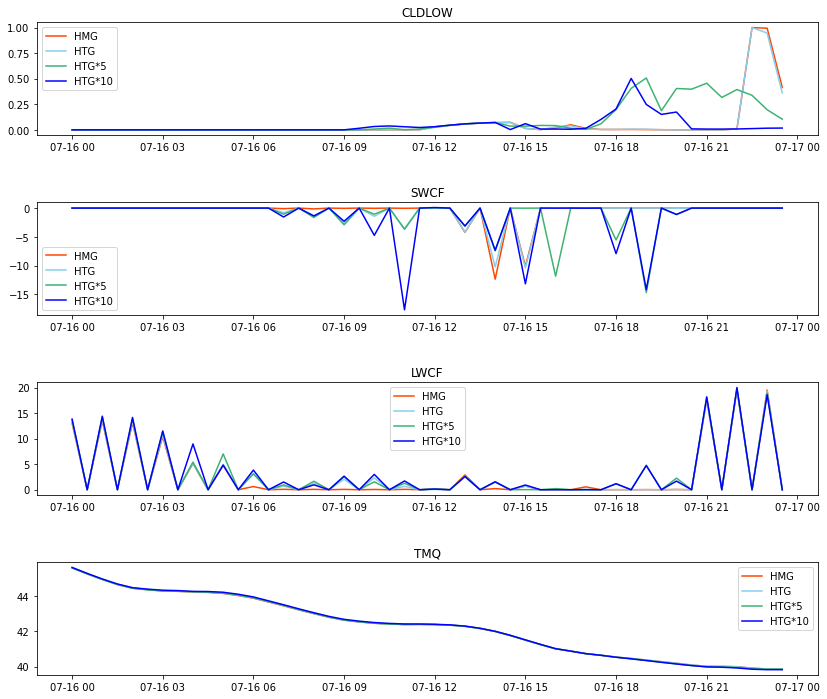

In [23]:
## Which variables to plot timeseries of? 

plotVars = ['CLDLOW','SWCF','LWCF','TMQ']
levSel   = [0,      0,        0,      0]

fig,axs = plt.subplots(len(plotVars),1, figsize=(14,3*len(plotVars)) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

for iPlot in range(len(plotVars)):
    if plotDay==3: 
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='skyblue', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='skyblue', label='HTG')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day3_selDay.time.values, np.squeeze(day3_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
    elif plotDay==2:
        if levSel[iPlot]==0: 
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').values), color='skyblue', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').values), color='blue',      label='HTG*10')
        else:
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HMG').isel(levInterp=levSel[iPlot]).values),    color='orangered', label='HMG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*01').isel(levInterp=levSel[iPlot]).values), color='skyblue', label='HTG')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*05').isel(levInterp=levSel[iPlot]).values), color='mediumseagreen',    label='HTG*5')
            axs[iPlot].plot(day2_selDay.time.values, np.squeeze(day2_selDay[plotVars[iPlot]].sel(case='HTG*10').isel(levInterp=levSel[iPlot]).values), color='blue',      label='HTG*10')
         
    axs[iPlot].legend()
    axs[iPlot].set_title(plotVars[iPlot])


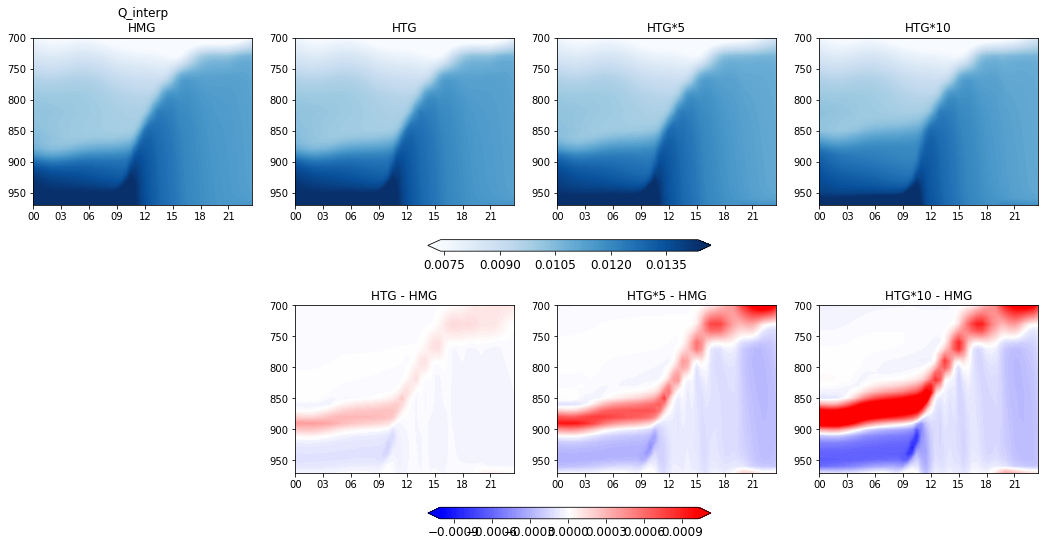

In [24]:
## Time-height plots

# plotVar = 'WP2_CLUBB_interp'
# cmapSelRaw = 'Oranges'

plotVar = 'Q_interp'
cmapSelRaw = 'Blues'


## Select data
plotYlim = 700      # Select max level to plot to

if plotDay==3:
    ilevs       = np.where(day3_selDay['levInterp'].values >= plotYlim)[0]
    day3_selDayZoom = day3_selDay.isel(levInterp=ilevs)
    
    HMG_selDay   = day3_selDayZoom[plotVar].sel(case='HMG')
    HTG_selDay   = day3_selDayZoom[plotVar].sel(case='HTG*01')
    HTG05_selDay = day3_selDayZoom[plotVar].sel(case='HTG*05')
    HTG10_selDay = day3_selDayZoom[plotVar].sel(case='HTG*10')
elif plotDay==2:
    ilevs       = np.where(day2_selDay['levInterp'].values >= plotYlim)[0]
    day2_selDayZoom = day2_selDay.isel(levInterp=ilevs)
    
    HMG_selDay   = day2_selDayZoom[plotVar].sel(case='HMG')
    HTG_selDay   = day2_selDayZoom[plotVar].sel(case='HTG*01')
    HTG05_selDay = day2_selDayZoom[plotVar].sel(case='HTG*05')
    HTG10_selDay = day2_selDayZoom[plotVar].sel(case='HTG*10')

# Get bounds to plot in (i.e., color range)
maxPlotRange = 95   
minPlotRange =  5

cMax  = np.nanmax([np.nanpercentile(HMG_selDay,   maxPlotRange), 
                   np.nanpercentile(HTG_selDay,   maxPlotRange), 
                   np.nanpercentile(HTG05_selDay, maxPlotRange),
                   np.nanpercentile(HTG10_selDay, maxPlotRange)])
cMin  = np.nanmin([np.nanpercentile(HMG_selDay,   minPlotRange), 
                   np.nanpercentile(HTG_selDay,   minPlotRange), 
                   np.nanpercentile(HTG05_selDay, minPlotRange),
                   np.nanpercentile(HTG10_selDay, minPlotRange)])
cStep = (cMax - cMin)/100.0


diffHTG   = HTG_selDay   - HMG_selDay
diffHTG05 = HTG05_selDay - HMG_selDay
diffHTG10 = HTG10_selDay - HMG_selDay

diffMax  = np.nanmax([np.nanpercentile(diffHTG,     maxPlotRange), 
                       np.nanpercentile(diffHTG05,  maxPlotRange), 
                       np.nanpercentile(diffHTG10,  maxPlotRange)])
diffMin  = np.nanmin([np.nanpercentile(diffHTG,     minPlotRange), 
                       np.nanpercentile(diffHTG05,  minPlotRange), 
                       np.nanpercentile(diffHTG10,  minPlotRange)])
# diffStep = (diffMax - diffMin)/100.0
boundsDiff = np.nanmax([np.abs(diffMax), np.abs(diffMin)])
diff_cStep = (2*boundsDiff)/100.0
levsDiff   = np.arange(-boundsDiff, boundsDiff+diff_cStep, diff_cStep)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Make the plots! 
fig,axs = plt.subplots(2,4, figsize=(18,8) )
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.6)

axs[0].contourf(HMG_selDay.time.values, HMG_selDay.levInterp.values, np.squeeze(HMG_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')
axs[1].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(HTG_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')
cplot = axs[2].contourf(HTG05_selDay.time.values, HTG05_selDay.levInterp.values, np.squeeze(HTG05_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')
axs[3].contourf(HTG10_selDay.time.values, HTG10_selDay.levInterp.values, np.squeeze(HTG10_selDay.values).transpose(),
                levels=np.arange(cMin, cMax+cStep, cStep), cmap=cmapSelRaw, extend='both')

# Add colorbar
ax_position  = axs[2].get_position()
cbar_ax      = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.08, ax_position.width+0.05, 0.02])
cbar         = plt.colorbar(cplot, orientation='horizontal',cax=cbar_ax)
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params(labelsize=12)

axs[0].set_title(plotVar+'\nHMG')
axs[1].set_title('HTG')
axs[2].set_title('HTG*5')
axs[3].set_title('HTG*10')


## Plot Differences 
axs[5].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(diffHTG.values).transpose(),
                levels=levsDiff, cmap='bwr', extend='both')
cplot=axs[6].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(diffHTG05.values).transpose(),
                levels=levsDiff, cmap='bwr', extend='both')
axs[7].contourf(HTG_selDay.time.values, HTG_selDay.levInterp.values, np.squeeze(diffHTG10.values).transpose(),
                levels=levsDiff, cmap='bwr', extend='both')

# Add colorbar
ax_position  = axs[6].get_position()
cbar_ax      = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.08, ax_position.width+0.05, 0.02])
cbar         = plt.colorbar(cplot, orientation='horizontal',cax=cbar_ax)
tick_locator = ticker.MaxNLocator(nbins=7)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params(labelsize=12)

axs[5].set_title('HTG - HMG')
axs[6].set_title('HTG*5 - HMG')
axs[7].set_title('HTG*10 - HMG')

myFmt = mdates.DateFormatter('%H')
axs[0].xaxis.set_major_formatter(myFmt)
axs[1].xaxis.set_major_formatter(myFmt)
axs[2].xaxis.set_major_formatter(myFmt)
axs[3].xaxis.set_major_formatter(myFmt)
axs[5].xaxis.set_major_formatter(myFmt)
axs[6].xaxis.set_major_formatter(myFmt)
axs[7].xaxis.set_major_formatter(myFmt)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()

axs[5].invert_yaxis()
axs[6].invert_yaxis()
axs[7].invert_yaxis()

fig.delaxes(axs[4])


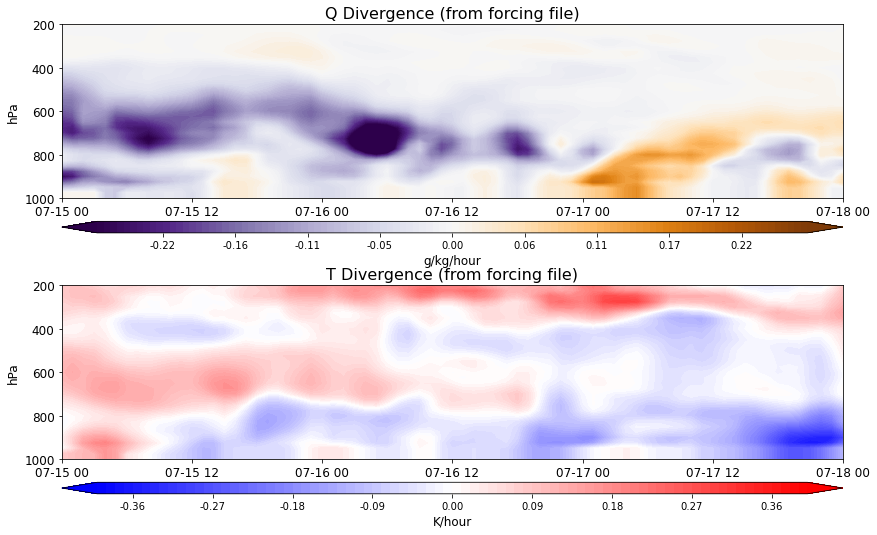

In [16]:
## Read in obs file to get a sense of large scale forcing

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

nateFile = '/glade/work/mdfowler/CLASP/clasp-htg.bdate.nc'
nateDS = xr.open_dataset(nateFile, decode_times=True)

## Convert to local time too 
nateDS_local       = nateDS.copy(deep=True)

# Confirmed that all the times are identical, so using the same local time arrays
localTimes = nateDS_local['time'].values - np.timedelta64(5,'h')

# Replace time dimension with local time
nateDS_local = nateDS_local.assign_coords({"time": localTimes})

# Also round to nearest hour, since some are a few minutes before/after minute 00: 
nateDS_HTG_roundHrs = nateDS_local['time'].dt.round("H")
nateDS_local        = nateDS_local.assign_coords({"time": nateDS_HTG_roundHrs})

# Add month_day index
month_day_idx                         = pd.MultiIndex.from_arrays([nateDS_local['time.year'].values,
                                                                nateDS_local['time.month'].values, 
                                                                nateDS_local['time.day'].values])
nateDS_local.coords['year_month_day'] = ('time', month_day_idx)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -     

## Plot the forcing for a certain day 
levsQ = np.arange(-0.27, 0.275, 0.005)
levsT = np.arange(-0.4, 0.41, 0.01)

# fig,axs = plt.subplots(2,3, figsize=(15,10))
fig,axs = plt.subplots(2,1, figsize=(14,8))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

levAtm  = nateDS_local['lev'].values

## Plot Q divergence
cp = axs[0].contourf(nateDS_local.time.values, levAtm, np.squeeze(np.transpose(nateDS_local['q_adv_h'].values)), 
                    levsQ, cmap='PuOr_r', extend='both')
# Add colorbar
ax_position = axs[0].get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.06, ax_position.width, 0.02])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax, format='%.2f')
cbar.set_label(nateDS_local['q_adv_h'].units,fontsize=12)

## Plot T divergence
cp = axs[1].contourf(nateDS_local.time.values, levAtm, np.squeeze(np.transpose(nateDS_local['T_adv_h'].values)), 
                    levsT, cmap='bwr', extend='both')
# Add colorbar
ax_position = axs[1].get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.06, ax_position.width, 0.02])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax, format='%.2f')
cbar.set_label(nateDS_local['T_adv_h'].units,fontsize=12)

# Invert axes and set up titles/labels
axs[0].invert_yaxis()
axs[1].invert_yaxis()


axs[0].set_ylim([1000,200])
axs[1].set_ylim([1000,200])

# Set labels
axs[0].set_title('Q Divergence (from forcing file)', fontsize=16)
axs[1].set_title('T Divergence (from forcing file)', fontsize=16)

axs[0].set_ylabel('hPa', fontsize=12)
axs[1].set_ylabel('hPa', fontsize=12)

## Limits on axes and tick labels 
axs[0].set_xlim([datetime.date(selYear,selMonth,selDay)+datetime.timedelta(days=-1), datetime.date(selYear,selMonth,selDay)+datetime.timedelta(days=2)])
axs[1].set_xlim([datetime.date(selYear,selMonth,selDay)+datetime.timedelta(days=-1), datetime.date(selYear,selMonth,selDay)+datetime.timedelta(days=2)])

axs[0].tick_params(axis='both', labelsize= 12)
axs[1].tick_params(axis='both', labelsize= 12)
